In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set(font_scale=1)
sns.set_style("white")
#sns.set_theme(context='paper', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

## Estimate the market share os screens >= 1280 & >= 720

In [2]:
resolution_stats = pd.read_csv("res_stats.csv")

In [3]:
resolution_stats.iloc[20,0] = "-1x-1"

In [4]:
resolution_stats.head(2)

,Screen Resolution,Market Share Perc. (Sept 2021 - Sept 2022)
0,1920x1080,22.55
1,1366x768,18.43


In [5]:
numpy_x_y = np.zeros((len(resolution_stats),2))

In [6]:
for i, row in resolution_stats.iterrows():
    x, y = row["Screen Resolution"].split("x")
    numpy_x_y[i,:] = (int(x),int(y))

In [7]:
resolution_stats["x"] = numpy_x_y[:,0]
resolution_stats["y"] = numpy_x_y[:,1]

In [8]:
resolution_stats[(resolution_stats.x >= 1280) & (resolution_stats.y >= 720)]["Market Share Perc. (Sept 2021 - Sept 2022)"].sum()

77.15000000000002

## Load all the Dataset Data

In [9]:
import os
import json

PRE_PROCESS_DATA_FOLDER = "pre_processed_data"

In [10]:
def infer_column_type(column:pd.Series):
    try:
        column = pd.to_numeric(column)
    except:
        print("Failed cast to a numeric type.")
    if column[0] == "False":
        
         False
    elif column[0] == "True":
        column = True
    column = column.astype(str)
    return column


In [11]:
data_list = []

for file in os.listdir(PRE_PROCESS_DATA_FOLDER):
    if ".json" not in file:
        continue
    with open(os.path.join(PRE_PROCESS_DATA_FOLDER, file), "r") as f:
        load_data = json.load(f)
    data_list.append(pd.Series(list(load_data.values()), index=load_data.keys()))

In [12]:
all_data = pd.DataFrame(data_list)

In [13]:
all_data.loc[2]

worker_id                              A10W3EILX06DFO
worker_age                                         35
worker_lang                                   English
worker_fluency                                      5
set_name                                 mturk_EN_v20
                                            ...      
question_9_answer                       virgin media 
question_9_correct_flag                           1.0
question_9_target_to_fixation_ratio          0.006579
set_language                                       EN
fixation_error                                  False
Name: 2, Length: 200, dtype: object

In [14]:
all_data[all_data.set_name == "mturk_DE_v01"].set_trials.apply(len)

95     10
149    10
180    10
200    10
225    10
291    10
323    10
328    10
337    10
Name: set_trials, dtype: int64

In [15]:
" ".join(all_data[all_data["set_name"] == "mturk_EN_v01"]["set_trials"][0])

'meco_para_3 a_ScottishParliament_2 a_Rhine_3 a_FresnoCalifornia_3 a_MartinLuther_2 a_Amazonrainforest_4 a_Chloroplast_2 a_NikolaTesla_1 a_UniversityofChicago_3 a_VictoriaAustralia_2'

In [16]:
all_data[all_data["set_name"] == "mturk_EN_v01"]["set_trials"].apply(" ".join) == " ".join(all_data[all_data["set_name"] == "mturk_EN_v01"]["set_trials"][0])

0      True
9      True
21     True
31     True
138    True
174    True
222    True
275    True
280    True
281    True
311    True
Name: set_trials, dtype: bool

In [17]:
all_sets_have_the_same_set_trials = True
for set_name in np.unique(all_data["set_name"]):
    first_row = " ".join(all_data[all_data["set_name"] == set_name]["set_trials"].iloc[0])
    set_trials_part = all_data[all_data["set_name"] == set_name]["set_trials"].apply(" ".join)
    check = (first_row == set_trials_part).all()
    all_sets_have_the_same_set_trials = check and all_sets_have_the_same_set_trials
print(all_sets_have_the_same_set_trials)

True


<AxesSubplot: >

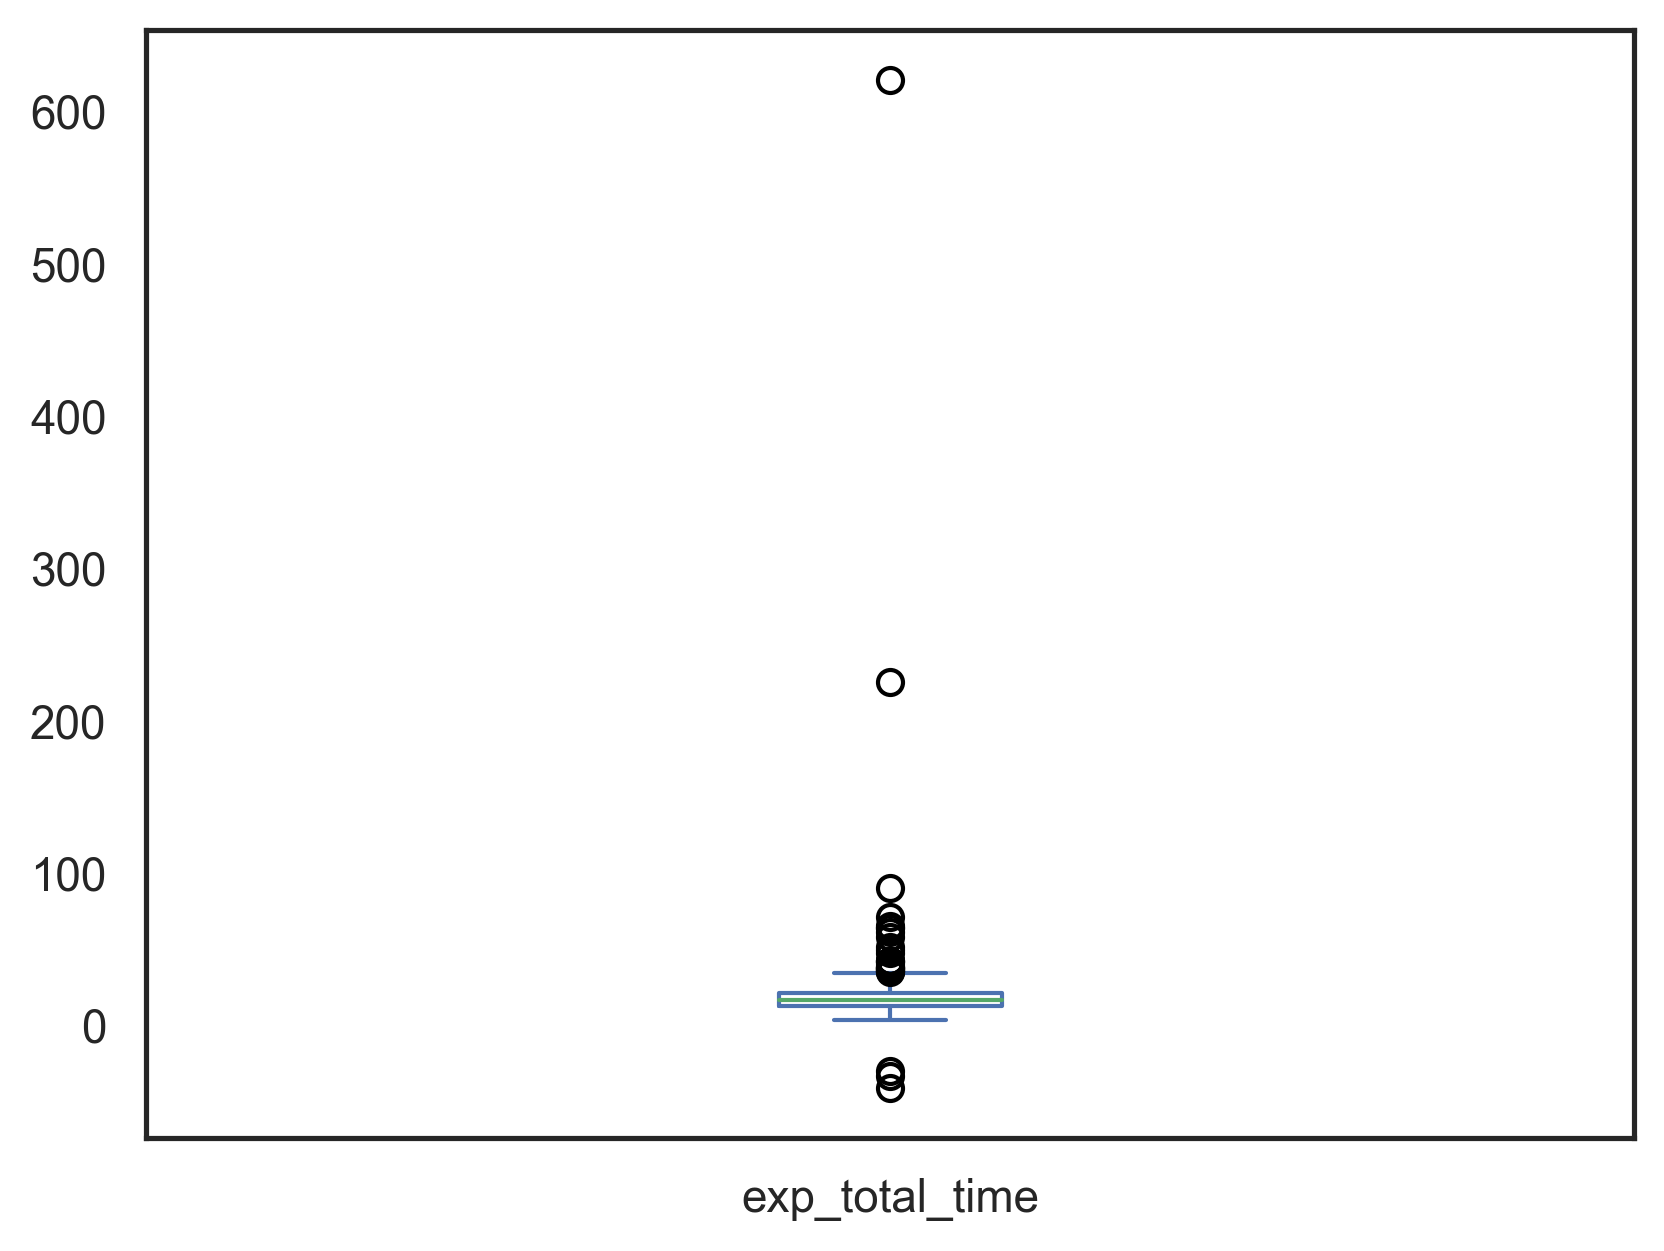

In [18]:
(all_data.exp_total_time * 1.66667e-5).plot.box()

In [19]:
all_data.fixation_error.value_counts()

False    573
True      32
Name: fixation_error, dtype: int64

In [20]:
all_data[all_data.fixation_error == False]

,worker_id,worker_age,worker_lang,worker_fluency,set_name,set_trials,participant_type,platform_type,vision,target_error,...,trial_9_total_fix_points_p_filtered,pre_question_9_name,pre_question_9_time,question_9_name,question_9_time,question_9_answer,question_9_correct_flag,question_9_target_to_fixation_ratio,set_language,fixation_error
0,A10BH9PYCYUKDJ,42,English,5,mturk_EN_v01,"[meco_para_3, a_ScottishParliament_2, a_Rhine_...",None,None,None,False,...,457,q_before_a_VictoriaAustralia_2_qa_0,6849.0,q_after_a_VictoriaAustralia_2_qa_0,4544.0,car,1.0,0.006565,EN,False
2,A10W3EILX06DFO,35,English,5,mturk_EN_v20,"[meco_para_11, a_Steamengine_0, a_Oxygen_1, a_...",None,None,None,False,...,152,q_before_a_SkyUnitedKingdom_4_qa_2,6584.0,q_after_a_SkyUnitedKingdom_4_qa_2,17068.0,virgin media,1.0,0.006579,EN,False
3,A11C5FSSHQEQ3E,38,English,5,mturk_EN_v13,"[meco_para_12, a_DoctorWho_4, a_VictoriaAustra...",None,None,None,False,...,53,q_before_a_FresnoCalifornia_0_qa_0,1376.0,q_after_a_FresnoCalifornia_0_qa_0,12718.0,southwest Fresno,1.0,0.000000,EN,False
4,A11EZAV2HRYKD5,27,English,4,mturk_DE_v04,"[meco_para_12, a_NikolaTesla_1, a_Universityof...",None,None,None,False,...,262,q_before_a_Steamengine_0_qa_1,11302.0,q_after_a_Steamengine_0_qa_1,6177.0,idk,0.0,0.015267,DE,False
5,A11EZAV2HRYKD5,24,English,5,mturk_EN_v11,"[meco_para_12, a_MartinLuther_4, a_GenghisKhan...",None,None,None,False,...,128,q_before_a_MartinLuther_0_qa_2,18618.0,q_after_a_MartinLuther_0_qa_2,4311.0,Psalms,0.0,0.015625,EN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,p6-volunteer-cognition,22,Croatian,4,mturk_EN_v18_cognition_volunteer,"[meco_para_11, a_SuperBowl50_3, a_FrenchandInd...",volunteer,cognition,None,False,...,2,q_before_a_SkyUnitedKingdom_1_qa_0,3097.0,q_after_a_SkyUnitedKingdom_1_qa_0,4073.0,1998,1.0,0.000000,EN,False
601,p7-lab-control,28,Spanish,4,mturk_EN_v02_lab_cognition,"[meco_para_3, a_Computationalcomplexitytheory_...",lab,cognition,normal,False,...,27,q_before_a_DoctorWho_3_qa_0,10387.0,q_after_a_DoctorWho_3_qa_0,4690.0,dudley simpson,1.0,0.148148,EN,False
602,p7-volunteer-cognition,22,Croatian,3,mturk_EN_v02_volunteer_cognition,"[meco_para_3, a_Computationalcomplexitytheory_...",volunteer,cognition,None,False,...,5,q_before_a_DoctorWho_3_qa_0,8174.0,q_after_a_DoctorWho_3_qa_0,8135.0,Dudley Simpson,1.0,0.400000,EN,False
603,p7-volunteer-cognition,23,Croatian,2,mturk_EN_v18_cognition_volunteer,"[meco_para_11, a_SuperBowl50_3, a_FrenchandInd...",volunteer,cognition,None,False,...,136,q_before_a_SkyUnitedKingdom_1_qa_0,3957.0,q_after_a_SkyUnitedKingdom_1_qa_0,4092.0,1998,1.0,0.022059,EN,False


In [21]:
all_data[(all_data.participant_type.isna()) & (all_data.worker_id.str.contains("link")) & (all_data.set_name == "mturk_DE_v05")]

,worker_id,worker_age,worker_lang,worker_fluency,set_name,set_trials,participant_type,platform_type,vision,target_error,...,trial_9_total_fix_points_p_filtered,pre_question_9_name,pre_question_9_time,question_9_name,question_9_time,question_9_answer,question_9_correct_flag,question_9_target_to_fixation_ratio,set_language,fixation_error
407,linkPDZxFvSspfr,51,Portuguese,3,mturk_DE_v05,"[meco_para_1, a_SkyUnitedKingdom_4, a_NikolaTe...",None,None,None,False,...,17,q_before_a_Normans_4_qa_0,2133.0,q_after_a_Normans_4_qa_0,37175.0,Europa,0.0,0.058824,DE,False
495,linkPPoWSeVIgwk,26,German,5,mturk_DE_v05,"[meco_para_1, a_SkyUnitedKingdom_4, a_NikolaTe...",None,None,None,False,...,51,q_before_a_Normans_4_qa_0,5840.0,q_after_a_Normans_4_qa_0,8904.0,Afrika,1.0,0.039216,DE,False
531,linkPUHovAtyfXw,27,German,5,mturk_DE_v05,"[meco_para_1, a_SkyUnitedKingdom_4, a_NikolaTe...",None,None,None,False,...,66,q_before_a_Normans_4_qa_0,7811.0,q_after_a_Normans_4_qa_0,18572.0,Vor der Atlantikküste Afrikas,1.0,0.000000,DE,False


In [22]:
# Filters to apply:
approved_only = (all_data.approved_flag > 0).to_numpy() 
no_fixation_error = (all_data.fixation_error == False).to_numpy()
no_target_error = (all_data.target_error == False).to_numpy()
sample_higher_10 = (all_data.webgazer_sample_rate > 10).to_numpy()
acc_higher = (all_data.avg_roi_last_val > 0).to_numpy()
filter_mturks = np.array([False if "link" in worker_id else True for worker_id in all_data["worker_id"]])
filter_sets = np.array([True if set_lang in ["EN", "DE", "ES", "TR"] else False for set_lang in all_data["set_language"]])
# Set a maximum time to 60 minutes
max_time_min = 60
filter_max_time = (all_data.exp_total_time < max_time_min/0.000016666).to_numpy()

screen_x_above_1280 = (all_data.screen_x > 1110).to_numpy() # Some tolerance
screen_y_above_720 = (all_data.screen_y > 615).to_numpy() # Some Tolerance
screen_above_1280_720 = screen_x_above_1280 & screen_y_above_720

In [23]:
dict_filter = {
    #"filter_mturks" : filter_mturks,
    "filter_sets" : filter_sets,
    "Approved":approved_only,
    "Fix_Error, Target_Error": no_fixation_error & no_target_error,
    "Sample Rate": sample_higher_10,
    "acc_thresh": acc_higher,
    "screen_above_1280_720": screen_above_1280_720,
    f"Maximum time ({max_time_min} min)":filter_max_time
}

In [24]:
n_total = len(all_data)
current_filter = np.ones(len(all_data),dtype=bool)
for condition, f in dict_filter.items():
    n_data_filtered = len(all_data.iloc[~f & current_filter])
    per_cent = n_data_filtered/n_total * 100
    print(f"For condition ({condition}), {per_cent:.2f}% has been filtered. ({n_data_filtered} out of {n_total})")
    current_filter = current_filter & f
    n_total = len(all_data.iloc[current_filter])
    

For condition (filter_sets), 0.83% has been filtered. (5 out of 605)
For condition (Approved), 29.50% has been filtered. (177 out of 600)
For condition (Fix_Error, Target_Error), 4.26% has been filtered. (18 out of 423)
For condition (Sample Rate), 10.86% has been filtered. (44 out of 405)
For condition (acc_thresh), 1.11% has been filtered. (4 out of 361)
For condition (screen_above_1280_720), 0.28% has been filtered. (1 out of 357)
For condition (Maximum time (60 min)), 0.84% has been filtered. (3 out of 356)


In [25]:
# Combine filters into a mask
mask = np.ones(all_data.shape[0], dtype=bool)
for filter_name, filter_mask in dict_filter.items():
    mask = mask & filter_mask

In [26]:
# Pick all of those which were approved and had no fixation/target errors.
# mask = filter_mturks & approved_only & no_fixation_error & no_target_error & sample_higher_10 & screen_above_1280_720 & acc_higher & filter_sets

In [27]:
mask_sets_totals = filter_sets

In [28]:
data_filtered = all_data[mask].copy()

data_filtered = data_filtered.rename(columns={"set_language": "Set Language"})

In [29]:
data_filtered.shape

(353, 200)

In [30]:
data_filtered.groupby("Set Language")["avg_roi_last_val"].describe()

,count,mean,std,min,25%,50%,75%,max
Set Language,,,,,,,,
DE,21.0,41.830498,21.086946,2.677966,36.426227,42.203030,63.050847,69.825784
EN,154.0,32.583967,23.365300,1.016949,14.721965,26.247395,48.691023,99.661017
ES,57.0,38.153973,22.854918,1.034483,20.000000,34.576271,52.293785,94.285714
TR,121.0,26.938344,19.522470,1.422306,13.693746,21.131582,32.677966,80.172311


In [31]:
data_filtered.groupby("Set Language")["avg_offset_x"].describe()

,count,mean,std,min,25%,50%,75%,max
Set Language,,,,,,,,
DE,21.0,80.865512,51.512999,32.656384,47.492597,67.301186,85.155665,226.117401
EN,154.0,117.600231,101.811041,19.964921,54.759123,89.259032,147.542164,763.885054
ES,57.0,100.812733,77.738103,25.602825,50.444711,77.870876,108.563067,376.531377
TR,121.0,123.678476,78.498355,19.848393,80.348114,108.085486,149.586565,582.405989


In [32]:
data_filtered.groupby("Set Language")["avg_offset_y"].describe()

,count,mean,std,min,25%,50%,75%,max
Set Language,,,,,,,,
DE,21.0,72.984064,43.007005,24.319040,42.594237,57.996610,103.720761,166.698588
EN,154.0,96.603525,60.657898,17.682424,53.798615,82.432203,128.220470,424.705952
ES,57.0,89.139928,54.018053,12.877571,51.682136,78.291525,106.742316,325.246396
TR,121.0,102.713030,50.261845,16.464407,62.253106,94.541913,131.125424,317.046441


In [33]:
data_filtered.groupby("Set Language")["avg_offset_r"].describe()

,count,mean,std,min,25%,50%,75%,max
Set Language,,,,,,,,
DE,21.0,82.863325,43.867819,30.967222,62.950123,70.765015,89.818483,229.783886
EN,154.0,103.689009,55.236373,0.014708,66.727657,91.536092,137.055090,320.953509
ES,57.0,83.369237,43.561172,0.030492,55.306553,77.800953,108.542302,207.752770
TR,121.0,123.267401,69.850500,0.036034,78.165512,112.079190,151.992400,593.230717


In [34]:
screen_counts = data_filtered[["screen_x","screen_y"]].value_counts().reset_index()
screen_counts = screen_counts.rename({0:"counts"},axis=1)
screen_counts.head(5)

,screen_x,screen_y,counts
0,1366.0,768.0,95
1,1536.0,864.0,86
2,1920.0,1080.0,40
3,1440.0,900.0,37
4,1280.0,720.0,24


In [40]:
avg_offset_r_table = []
for row_i, row in screen_counts.sort_values("counts",ascending=False).iterrows():
    if row["counts"] < 5:
        continue
    screen_x = row["screen_x"]
    screen_y = row["screen_y"]
    res_s = f"{int(screen_x)}x{int(screen_y)}"
    print(f"Resolution {res_s}")
    screen_offset_stats = data_filtered[(data_filtered["screen_x"] == screen_x) & (data_filtered["screen_y"] == screen_y)][["avg_offset_x", "avg_offset_y", "avg_offset_r"]].describe()
    print(screen_offset_stats)
    avg_offset_r_table.append((res_s, screen_offset_stats.loc["count", "avg_offset_r"], screen_offset_stats.loc["min", "avg_offset_r"],
                               screen_offset_stats.loc["max", "avg_offset_r"], screen_offset_stats.loc["mean", "avg_offset_r"], 
                               screen_offset_stats.loc["std", "avg_offset_r"], screen_offset_stats.loc[:,"avg_offset_r"].median()))
    print()

Resolution 1366x768
       avg_offset_x  avg_offset_y  avg_offset_r
count     95.000000     95.000000     95.000000
mean     113.484829    101.779012    112.961260
std       82.422432     58.137475     52.953035
min       30.319065     25.922941     30.967222
25%       54.338241     62.904407     75.047707
50%      101.167226     87.458455    105.295747
75%      137.312377    133.562608    137.199914
max      516.809341    424.705952    320.953509

Resolution 1536x864
       avg_offset_x  avg_offset_y  avg_offset_r
count     86.000000     86.000000     86.000000
mean     111.646015     94.956179    109.242842
std       82.109875     52.453761     75.180276
min       19.848393     20.722825     23.056736
25%       50.845668     57.829845     68.991368
50%       91.743590     82.772712     89.553856
75%      151.205502    117.729056    136.609421
max      582.405989    317.046441    593.230717

Resolution 1920x1080
       avg_offset_x  avg_offset_y  avg_offset_r
count     40.000000     4

In [43]:
pd_avg_offset_r_table = pd.DataFrame(avg_offset_r_table, columns=["Resolution", "No. of Participants", "Min", "Max", "Mean", "Std", "Median"])
pd_avg_offset_r_table

,Resolution,No. of Participants,Min,Max,Mean,Std,Median
0,1366x768,95.0,30.967222,320.953509,112.961260,52.953035,100.147874
1,1536x864,86.0,23.056736,593.230717,109.242842,75.180276,87.776928
2,1920x1080,40.0,29.592163,207.752770,101.447527,45.142009,75.711098
3,1440x900,37.0,0.030492,181.357809,81.416493,46.018410,66.379962
4,1280x720,24.0,0.014708,276.391221,82.817841,57.223244,65.215145
5,1600x900,18.0,26.572279,295.944152,137.835172,61.475369,116.816307
6,1280x800,9.0,0.286381,151.917642,76.574250,43.143779,67.270798
7,2560x1440,6.0,55.504818,217.855795,105.282216,61.725739,73.769855


In [44]:
print(pd_avg_offset_r_table.round(2).to_latex())

\begin{tabular}{llrrrrrr}
\toprule
{} & Resolution &  No. of Participants &    Min &     Max &    Mean &    Std &  Median \\
\midrule
0 &   1366x768 &                 95.0 &  30.97 &  320.95 &  112.96 &  52.95 &  100.15 \\
1 &   1536x864 &                 86.0 &  23.06 &  593.23 &  109.24 &  75.18 &   87.78 \\
2 &  1920x1080 &                 40.0 &  29.59 &  207.75 &  101.45 &  45.14 &   75.71 \\
3 &   1440x900 &                 37.0 &   0.03 &  181.36 &   81.42 &  46.02 &   66.38 \\
4 &   1280x720 &                 24.0 &   0.01 &  276.39 &   82.82 &  57.22 &   65.22 \\
5 &   1600x900 &                 18.0 &  26.57 &  295.94 &  137.84 &  61.48 &  116.82 \\
6 &   1280x800 &                  9.0 &   0.29 &  151.92 &   76.57 &  43.14 &   67.27 \\
7 &  2560x1440 &                  6.0 &  55.50 &  217.86 &  105.28 &  61.73 &   73.77 \\
\bottomrule
\end{tabular}



C:\Users\tyagu\AppData\Local\Temp\ipykernel_23932\469184180.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd_avg_offset_r_table.round(2).to_latex())


## Analysis of Ratio of Fixations Filtered

In [31]:
data_filtered[data_filtered.worker_id == "A24LB89P1BPKKF"]

,worker_id,worker_age,worker_lang,worker_fluency,set_name,set_trials,participant_type,platform_type,vision,target_error,...,trial_9_total_fix_points_p_filtered,pre_question_9_name,pre_question_9_time,question_9_name,question_9_time,question_9_answer,question_9_correct_flag,question_9_target_to_fixation_ratio,Set Language,fixation_error
104,A24LB89P1BPKKF,28,English,5,mturk_EN_v03,"[meco_para_11, a_1973oilcrisis_1, a_Kenya_1, a...",None,None,None,False,...,164,q_before_a_MartinLuther_3_qa_3,3338.0,q_after_a_MartinLuther_3_qa_3,5591.0,John C Messenger,1.0,0.04878,EN,False


In [32]:
total_fix_points = 0
total_fix_filter_d = 0
for row_i, row in data_filtered.iterrows():
    total_fix_points += row['total_fix_points_d']
    total_fix_filter_d += row['total_fix_points_d_filtered']
print(round(total_fix_filter_d/total_fix_points,2))

0.63


In [33]:
data_filtered.columns[:20]

Index(['worker_id', 'worker_age', 'worker_lang', 'worker_fluency', 'set_name',
       'set_trials', 'participant_type', 'platform_type', 'vision',
       'target_error', 'screen_x', 'screen_y', 'webgazer_raw_data',
       'webgazer_filtered_data', 'total_fix_points_d',
       'total_fix_points_d_filtered', 'total_fix_points_p',
       'total_fix_points_p_filtered', 'avg_roi_last_val',
       'webgazer_sample_rate'],
      dtype='object')

In [34]:
for row_i, row in data_filtered.iterrows():
    worker_id = row["worker_id"]
    set_name = row["set_name"]
    # Get the fixation on words data
    fixation_data = pd.read_csv(os.path.join("pre_processed_data", "fixation_data_per_part", f"{worker_id}_{set_name}_fix_dict.csv"), index_col=0)
    word_fix_sum = 0
    paragraph_fixation_sum = 0
    total_fix_after_duration_filter = 0
    total_fix_on_target = 0
    for i, trial in enumerate(row["set_trials"]):
        word_fix_sum += fixation_data[fixation_data["text_id"] == trial].FixCount.sum()
        paragraph_fixation_sum += row[f"trial_{i}_total_fix_points_p_filtered"]
        total_fix_after_duration_filter += row[f"trial_{i}_total_fix_points_p"]
        total_fix_on_target += row[f"trial_{i}_fixation_on_target"]
    data_filtered.loc[row_i, "ratio_fixation_in_word_target"] = word_fix_sum/total_fix_after_duration_filter
    data_filtered.loc[row_i, "ratio_fixation_in_paragraph"] = paragraph_fixation_sum/total_fix_after_duration_filter
    data_filtered.loc[row_i, "ratio_fixation_on_target"] = total_fix_on_target / total_fix_after_duration_filter

In [35]:
print(data_filtered[["ratio_fixation_in_word_target", "ratio_fixation_in_paragraph", "ratio_fixation_on_target"]].describe().T[["mean", "std"]].round(2).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  mean &   std \\
\midrule
ratio\_fixation\_in\_word\_target &  0.62 &  0.12 \\
ratio\_fixation\_in\_paragraph   &  0.83 &  0.13 \\
ratio\_fixation\_on\_target      &  0.05 &  0.03 \\
\bottomrule
\end{tabular}



C:\Users\tyagu\AppData\Local\Temp\ipykernel_11868\3892681426.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data_filtered[["ratio_fixation_in_word_target", "ratio_fixation_in_paragraph", "ratio_fixation_on_target"]].describe().T[["mean", "std"]].round(2).to_latex())


In [36]:
pd.read_csv("filtered_points_66px_thresh.csv", index_col=0).describe()

,total_fix_points_d,total_fix_points_d_filtered,total_fix_points_p,total_fix_points_p_filtered
count,353.000000,353.000000,353.000000,353.000000
mean,10386.790368,7626.759207,2760.031161,1763.356941
std,6904.056536,6209.828793,1971.183022,1322.734082
min,52.000000,0.000000,52.000000,52.000000
25%,6023.000000,3398.000000,1624.000000,972.000000
50%,8600.000000,6071.000000,2270.000000,1501.000000
75%,13168.000000,10577.000000,3308.000000,2167.000000
max,53254.000000,42421.000000,16702.000000,13278.000000


In [37]:
pd.read_csv("filtered_points_50px_thresh.csv", index_col=0).describe()

,total_fix_points_d,total_fix_points_d_filtered,total_fix_points_p,total_fix_points_p_filtered
count,353.000000,353.000000,353.000000,353.000000
mean,10386.790368,6519.458924,3867.331445,2394.396601
std,6904.056536,5823.975370,2800.913001,1801.564496
min,52.000000,0.000000,52.000000,52.000000
25%,6023.000000,2234.000000,2184.000000,1326.000000
50%,8600.000000,5145.000000,3199.000000,2052.000000
75%,13168.000000,9092.000000,4754.000000,2978.000000
max,53254.000000,40049.000000,25556.000000,20343.000000


In [38]:
data_filtered[["total_fix_points_d", # Total Gaze Points across all trials
            "total_fix_points_d_filtered", # Total Gaze Points after filtering
            "total_fix_points_p", # Total Gaze Points across all trials
            "total_fix_points_p_filtered", # Points filtered due to duration and paragraph filter"
            ]].to_csv("filtered_points_50px_thresh.csv")

In [39]:
all_data.groupby("set_language").count().sum()

worker_id                              605
worker_age                             605
worker_lang                            605
worker_fluency                         605
set_name                               605
                                      ... 
question_9_time                        605
question_9_answer                      605
question_9_correct_flag                605
question_9_target_to_fixation_ratio    605
fixation_error                         605
Length: 196, dtype: int64

In [40]:
all_data[all_data["set_name"] == "mturk_EN_v04"][["worker_id", "approved_flag", "target_error", "fixation_error"]]

,worker_id,approved_flag,target_error,fixation_error
14,A13WTEQ06V3B6D,3.0,False,False
64,A1OM5NWYYYJKQW,2.0,False,False
120,A2APG8MSLJ6G2K,3.0,False,False
177,A2Y87M8V0N1M6P,3.0,False,False
185,A2ZDEERVRN5AMC,3.0,False,False
227,A3CZZJYU9JI93H,0.0,False,False
259,A3RVHUY67SVXQV,2.0,False,False
279,A7GT7BIC7ERWE,2.0,False,False
290,AE681FG4LT6DV,0.0,False,False


In [41]:
data_filtered.groupby("Set Language").count()

,worker_id,worker_age,worker_lang,worker_fluency,set_name,set_trials,participant_type,platform_type,vision,target_error,...,pre_question_9_time,question_9_name,question_9_time,question_9_answer,question_9_correct_flag,question_9_target_to_fixation_ratio,fixation_error,ratio_fixation_in_word_target,ratio_fixation_in_paragraph,ratio_fixation_on_target
Set Language,,,,,,,,,,,,,,,,,,,,,
DE,21,21,21,21,21,21,0,0,0,21,...,21,21,21,21,21,21,21,21,21,21
EN,154,154,154,154,154,154,44,44,11,154,...,154,154,154,154,154,154,154,154,154,154
ES,57,57,57,57,57,57,0,0,0,57,...,57,57,57,57,57,57,57,57,57,57
TR,121,121,121,121,121,121,0,0,0,121,...,121,121,121,121,121,121,121,121,121,121


In [42]:
data_filtered[data_filtered["set_name"] == "mturk_EN_v04"]

,worker_id,worker_age,worker_lang,worker_fluency,set_name,set_trials,participant_type,platform_type,vision,target_error,...,question_9_name,question_9_time,question_9_answer,question_9_correct_flag,question_9_target_to_fixation_ratio,Set Language,fixation_error,ratio_fixation_in_word_target,ratio_fixation_in_paragraph,ratio_fixation_on_target
14,A13WTEQ06V3B6D,30,English,5,mturk_EN_v04,"[meco_para_7, a_Force_3, a_Geology_4, a_Teache...",None,None,None,False,...,q_after_a_Kenya_0_qa_1,7009.0,corruption in public sector,1.0,0.172414,EN,False,0.574932,0.795640,0.082652
64,A1OM5NWYYYJKQW,58,English,5,mturk_EN_v04,"[meco_para_7, a_Force_3, a_Geology_4, a_Teache...",None,None,None,False,...,q_after_a_Kenya_0_qa_1,7325.0,corruption,0.0,0.465909,EN,False,0.786573,0.989980,0.132265
120,A2APG8MSLJ6G2K,69,English,5,mturk_EN_v04,"[meco_para_7, a_Force_3, a_Geology_4, a_Teache...",None,None,None,False,...,q_after_a_Kenya_0_qa_1,7446.0,public sector corruption,1.0,0.333333,EN,False,0.641877,0.848375,0.105415
177,A2Y87M8V0N1M6P,31,English,4,mturk_EN_v04,"[meco_para_7, a_Force_3, a_Geology_4, a_Teache...",None,None,None,False,...,q_after_a_Kenya_0_qa_1,8180.0,Public sector corruption.,1.0,0.564972,EN,False,0.765654,0.989461,0.121513
185,A2ZDEERVRN5AMC,30,English,5,mturk_EN_v04,"[meco_para_7, a_Force_3, a_Geology_4, a_Teache...",None,None,None,False,...,q_after_a_Kenya_0_qa_1,7818.0,public sector corruption,1.0,0.550000,EN,False,0.660345,0.908621,0.083621
259,A3RVHUY67SVXQV,34,English,5,mturk_EN_v04,"[meco_para_7, a_Force_3, a_Geology_4, a_Teache...",None,None,None,False,...,q_after_a_Kenya_0_qa_1,9529.0,corruption in the public sector,1.0,0.090909,EN,False,0.593718,0.806484,0.092199
279,A7GT7BIC7ERWE,36,English,5,mturk_EN_v04,"[meco_para_7, a_Force_3, a_Geology_4, a_Teache...",None,None,None,False,...,q_after_a_Kenya_0_qa_1,7481.0,corruption perception index,0.0,0.307692,EN,False,0.538527,0.767993,0.058425


In [43]:
for set_name in np.unique(data_filtered["set_name"]):
    first_row = data_filtered[data_filtered["set_name"] == set_name].iloc[0]["set_trials"]
    compare_rows = True
    for set_trial in data_filtered[data_filtered["set_name"] == set_name].set_trials:
        compare_rows = compare_rows and (set_trial ==  first_row)
    print(set_name, " All sets are the same: ", compare_rows)
    all_trials_unique = (pd.DataFrame(first_row).value_counts() > 1).any()
    print(set_name, " Trial is more than once: ", all_trials_unique)
    assert compare_rows, "One worker had missing trials."
    assert not all_trials_unique, "One trial was repeated."

mturk_DE_v01  All sets are the same:  True
mturk_DE_v01  Trial is more than once:  False
mturk_DE_v02  All sets are the same:  True
mturk_DE_v02  Trial is more than once:  False
mturk_DE_v03  All sets are the same:  True
mturk_DE_v03  Trial is more than once:  False
mturk_DE_v04  All sets are the same:  True
mturk_DE_v04  Trial is more than once:  False
mturk_DE_v05  All sets are the same:  True
mturk_DE_v05  Trial is more than once:  False
mturk_EN_v01  All sets are the same:  True
mturk_EN_v01  Trial is more than once:  False
mturk_EN_v02  All sets are the same:  True
mturk_EN_v02  Trial is more than once:  False
mturk_EN_v02_lab_cognition  All sets are the same:  True
mturk_EN_v02_lab_cognition  Trial is more than once:  False
mturk_EN_v02_volunteer_cognition  All sets are the same:  True
mturk_EN_v02_volunteer_cognition  Trial is more than once:  False
mturk_EN_v03  All sets are the same:  True
mturk_EN_v03  Trial is more than once:  False
mturk_EN_v04  All sets are the same:  True

In [44]:
per_cent = (1 - (len(data_filtered)/n_total)) * 100
print(f"With all conditions a total of, {per_cent:.2f} has been filtered. ({n_total-len(data_filtered)} out of {n_total})")

With all conditions a total of, 0.00 has been filtered. (0 out of 353)


In [45]:
data_filtered["Set Language"].value_counts()

EN    154
TR    121
ES     57
DE     21
Name: Set Language, dtype: int64

In [47]:
data_filtered[["worker_age","webgazer_sample_rate","avg_roi_last_val", "exp_total_time"]].describe().round(2)

,worker_age,webgazer_sample_rate,avg_roi_last_val,exp_total_time
count,353.00,353.00,353.00,353.00
mean,29.47,25.39,32.10,1078191.44
std,11.74,5.67,22.28,442194.21
min,-24.00,10.04,1.02,354684.00
25%,20.00,21.50,15.00,761698.00
50%,27.00,29.10,25.42,983829.00
75%,35.00,29.40,46.47,1267992.00
max,71.00,29.48,99.66,3494714.00


In [88]:
data_filtered[['trial_9_fixation_text_TRT',
'trial_9_fixation_target_TRT']]

,trial_9_fixation_text_TRT,trial_9_fixation_target_TRT
0,48105.0,382.0
2,8406.0,54.0
5,7582.0,121.0
9,15750.0,0.0
10,1270.0,0.0
...,...,...
600,3877.0,0.0
601,1804.0,290.0
602,304.0,132.0
603,13997.0,210.0


In [89]:
count_dict = {}
for i, row in data_filtered.iterrows():
    set_name = row['set_name']
    if "ES" in set_name:
        count_dict[set_name] = count_dict.get(set_name,0) + 1
    

In [90]:
count_dict

{'mturk_ES_v07': 3,
 'mturk_ES_v05': 9,
 'mturk_ES_v03': 7,
 'mturk_ES_v01': 8,
 'mturk_ES_v02': 9,
 'mturk_ES_v08': 4,
 'mturk_ES_v06': 5,
 'mturk_ES_v04': 6,
 'mturk_ES_v09': 6}

In [91]:
data_filtered.set_trials = data_filtered.set_trials.astype("object")

In [92]:
data_filtered.set_trials[0]

['meco_para_3',
 'a_ScottishParliament_2',
 'a_Rhine_3',
 'a_FresnoCalifornia_3',
 'a_MartinLuther_2',
 'a_Amazonrainforest_4',
 'a_Chloroplast_2',
 'a_NikolaTesla_1',
 'a_UniversityofChicago_3',
 'a_VictoriaAustralia_2']

In [93]:
data_filtered.worker_age = np.abs(data_filtered.worker_age)

In [94]:
data_filtered.worker_age.mean().round(2), data_filtered.worker_age.std().round(2)

(29.61, 11.39)

In [95]:
data_filtered[data_filtered["Set Language"] == "DE"].worker_lang.value_counts()

German        15
English        4
Croatian       1
Portuguese     1
Name: worker_lang, dtype: int64

In [96]:
age_categories = np.zeros(len(data_filtered),dtype="<U20")
order_to_plot = []
for i in range(10,80,10):
    mask = (data_filtered.worker_age >= i) & (data_filtered.worker_age < i+10)
    if i == 10:
        age_categories[mask] = "<20"
        order_to_plot.append("<20")
    else:
        age_categories[mask] = f"{i}-{i+10}"
        order_to_plot.append(f"{i}-{i+10}")
    

In [97]:
all_data_only_mturk = all_data[mask_sets_totals].copy()

In [98]:
age_categories_no_filter = np.zeros(len(all_data_only_mturk),dtype="<U20")
for i in range(10,80,10):
    mask = (all_data_only_mturk.worker_age >= i) & (all_data_only_mturk.worker_age < i+10)
    if i == 10:
        age_categories_no_filter[mask] = "<20"
    else:
        age_categories_no_filter[mask] = f"{i}-{i+10}"
    

In [99]:
age_categories_no_filter

array(['40-50', '50-60', '30-40', '30-40', '20-30', '20-30', '50-60',
       '30-40', '30-40', '30-40', '70-80', '70-80', '20-30', '30-40',
       '30-40', '30-40', '20-30', '30-40', '30-40', '30-40', '20-30',
       '20-30', '30-40', '20-30', '30-40', '50-60', '20-30', '30-40',
       '30-40', '40-50', '30-40', '30-40', '30-40', '20-30', '20-30',
       '20-30', '30-40', '70-80', '40-50', '20-30', '20-30', '50-60',
       '20-30', '20-30', '20-30', '20-30', '20-30', '30-40', '30-40',
       '40-50', '20-30', '50-60', '40-50', '40-50', '30-40', '30-40',
       '20-30', '20-30', '20-30', '20-30', '20-30', '30-40', '20-30',
       '20-30', '50-60', '20-30', '50-60', '60-70', '<20', '20-30',
       '30-40', '20-30', '40-50', '50-60', '30-40', '20-30', '20-30',
       '30-40', '30-40', '30-40', '20-30', '50-60', '40-50', '20-30',
       '20-30', '30-40', '30-40', '20-30', '20-30', '30-40', '40-50',
       '40-50', '30-40', '30-40', '30-40', '40-50', '30-40', '30-40',
       '30-40', '30-40

In [100]:
age_categories

array(['40-50', '30-40', '20-30', '30-40', '70-80', '70-80', '20-30',
       '30-40', '20-30', '30-40', '30-40', '20-30', '20-30', '50-60',
       '20-30', '30-40', '30-40', '30-40', '20-30', '20-30', '20-30',
       '20-30', '20-30', '50-60', '20-30', '20-30', '20-30', '20-30',
       '30-40', '40-50', '50-60', '30-40', '20-30', '20-30', '20-30',
       '20-30', '20-30', '30-40', '20-30', '50-60', '20-30', '50-60',
       '60-70', '20-30', '20-30', '30-40', '30-40', '20-30', '50-60',
       '40-50', '30-40', '20-30', '40-50', '40-50', '30-40', '30-40',
       '40-50', '30-40', '30-40', '30-40', '20-30', '20-30', '20-30',
       '40-50', '20-30', '30-40', '30-40', '20-30', '30-40', '20-30',
       '20-30', '30-40', '60-70', '30-40', '30-40', '30-40', '70-80',
       '40-50', '30-40', '20-30', '30-40', '30-40', '50-60', '30-40',
       '30-40', '30-40', '30-40', '40-50', '40-50', '30-40', '50-60',
       '40-50', '30-40', '40-50', '30-40', '60-70', '30-40', '40-50',
       '50-60', '30-

In [101]:
data_filtered["age_categories"] = age_categories
all_data_only_mturk["age_categories"] = age_categories_no_filter

In [102]:
order_to_plot

['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

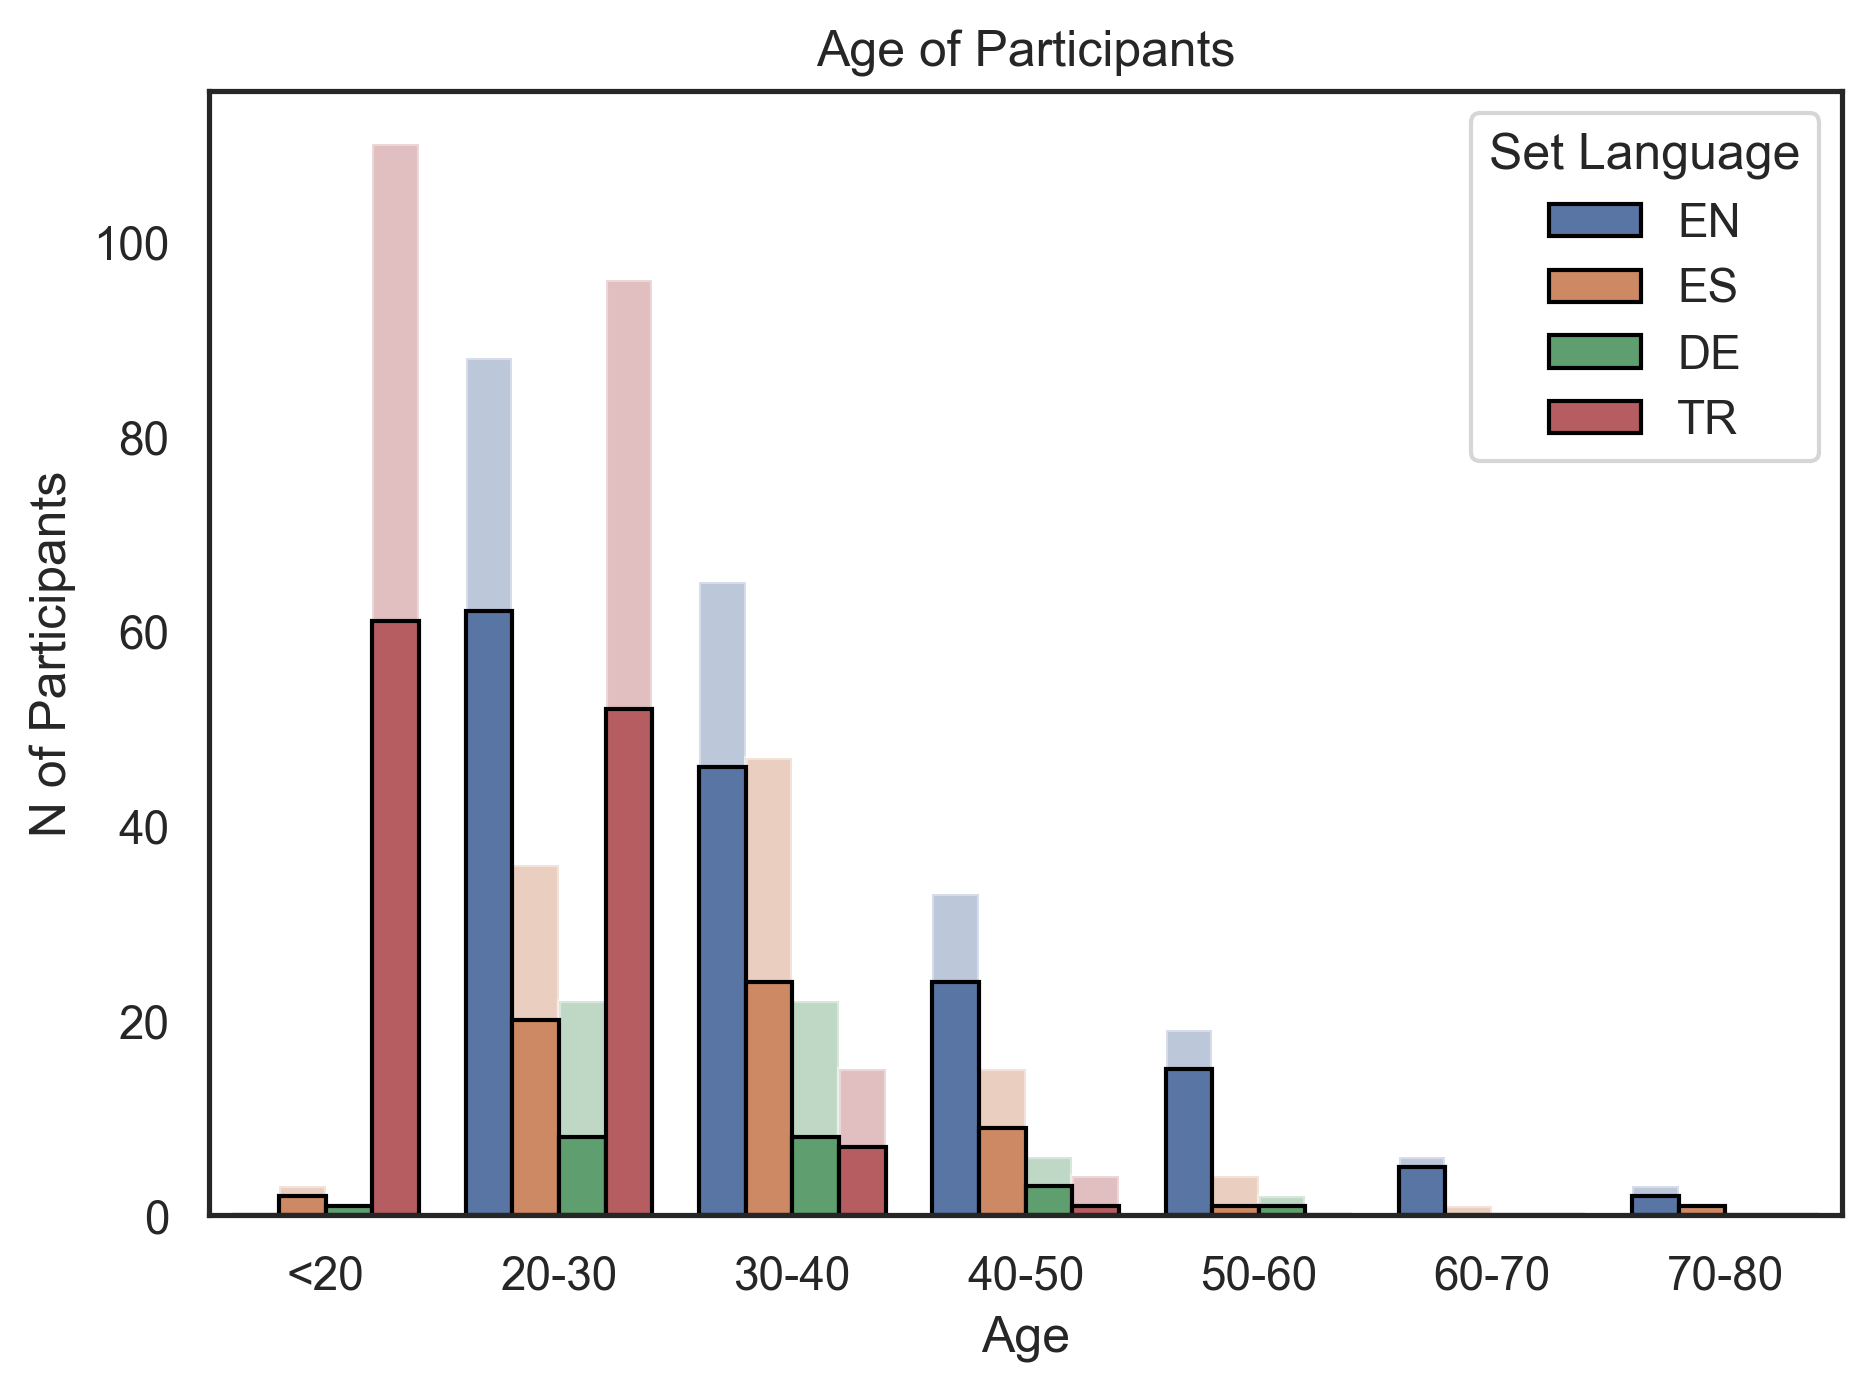

In [103]:
all_data_plot = sns.countplot(data=all_data_only_mturk, x="age_categories",
              hue="set_language", order=order_to_plot,alpha=0.4)
ax = sns.countplot(data=data_filtered, x="age_categories",
              hue="Set Language", order=order_to_plot, edgecolor="black", linewidth=1)

h,l = ax.get_legend_handles_labels()
plt.legend(h[4:8],l[4:8], title="Set Language")
sns.move_legend(ax, "upper right")
plt.title("Age of Participants")
plt.xlabel("Age")
plt.ylabel("N of Participants")
plt.tight_layout()

In [104]:
# Correctness plot
correctnessPlotData = all_data.copy()

In [105]:
correctnessPlotData.loc[(correctnessPlotData["participant_type"].isna() & ~correctnessPlotData["worker_id"].str.contains("link")), "participant_type"] = "mturk"
correctnessPlotData.loc[(correctnessPlotData["participant_type"].isna() & correctnessPlotData["worker_id"].str.contains("link")), "participant_type"] = "volunteer_link"

In [106]:
len(data_filtered[["screen_x","screen_y"]].value_counts())

35

In [107]:
correctnessPlotData["set_language"].unique()

array(['EN', 'ES', 'DE', 'TR', 'RU', 'GR'], dtype=object)

In [108]:
data_subset = data_filtered[(data_filtered["set_name"].str.contains("EN_v18")) 
              #| (data_filtered["set_name"].str.contains("EN_v17")) 
              | (data_filtered["set_name"].str.contains("EN_v14"))]

In [109]:
data_subset.loc[data_subset["participant_type"].isna(),"participant_type"] = "mturk"

In [110]:
data_subset.loc[:, "trial_0_time"] = data_subset.loc[:,"trial_0_time"] * 0.001

C:\Users\tyagu\AppData\Local\Temp\ipykernel_29876\3630910128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.loc[:, "trial_0_time"] = data_subset.loc[:,"trial_0_time"] * 0.001


In [111]:
data_subset[["set_name", "trial_0_time", "question_0_correct_flag"]]

,set_name,trial_0_time,question_0_correct_flag
17,mturk_EN_v14,31.475,1
32,mturk_EN_v14,109.784,1
44,mturk_EN_v18,21.617,0
51,mturk_EN_v18,8.002,0
146,mturk_EN_v14,6.560,1
161,mturk_EN_v14,45.698,1
163,mturk_EN_v14,30.630,1
167,mturk_EN_v14,129.663,1
221,mturk_EN_v18,5.637,0
230,mturk_EN_v18,7.507,0


In [112]:
data_subset.participant_type.value_counts()

mturk        15
volunteer    10
lab           5
Name: participant_type, dtype: int64

Text(0.5, 0, 'Participant Type')

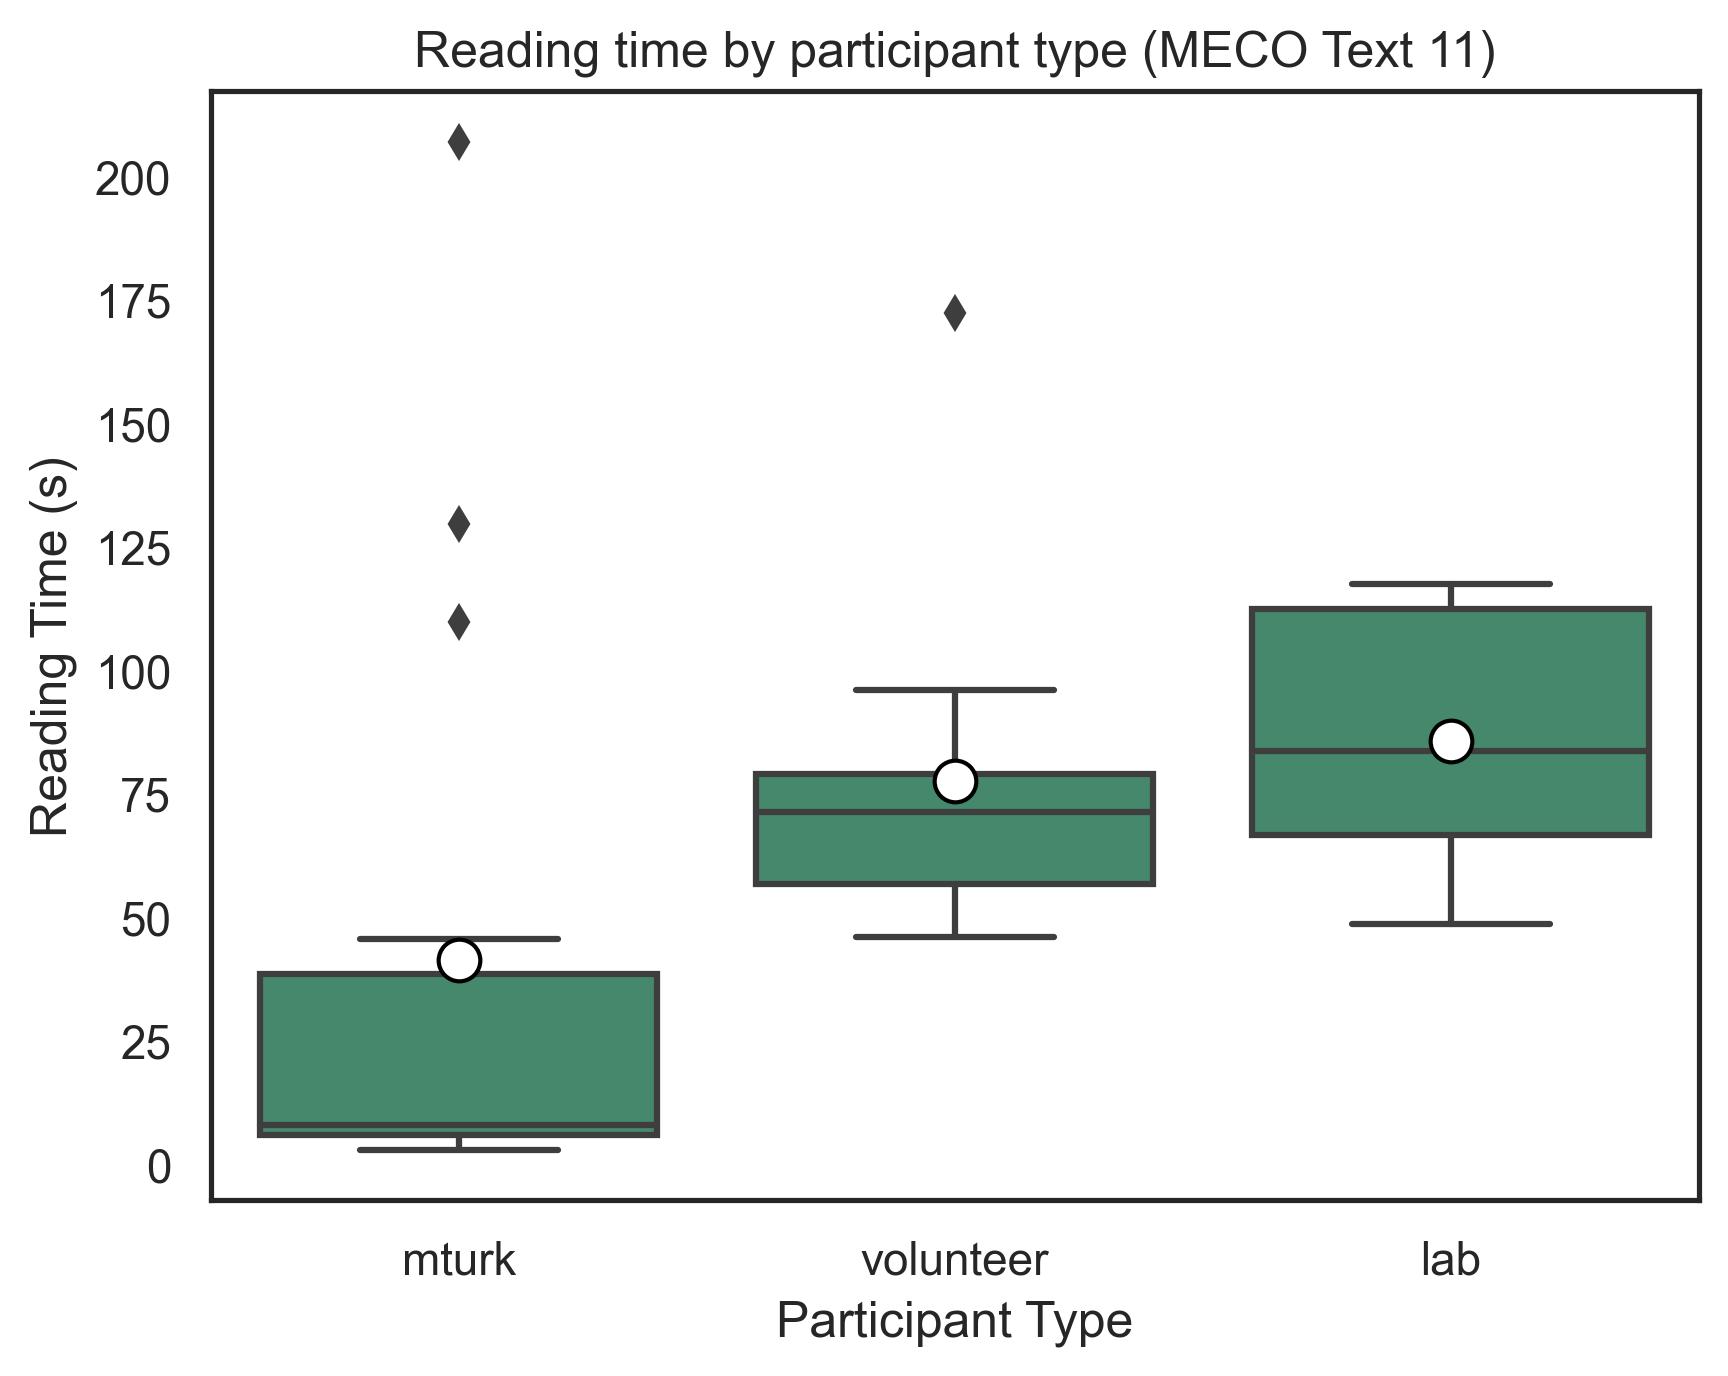

In [113]:
mypalette = sns.diverging_palette(150, 275, s=80, l=55, n=2)
sns.boxplot(data=data_subset, x="participant_type", y="trial_0_time",
            showmeans=True,
            color=mypalette[0], 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("Reading time by participant type (MECO Text 11)")
plt.ylabel("Reading Time (s)")
plt.xlabel("Participant Type")

Text(0.5, 0, 'Participant Type')

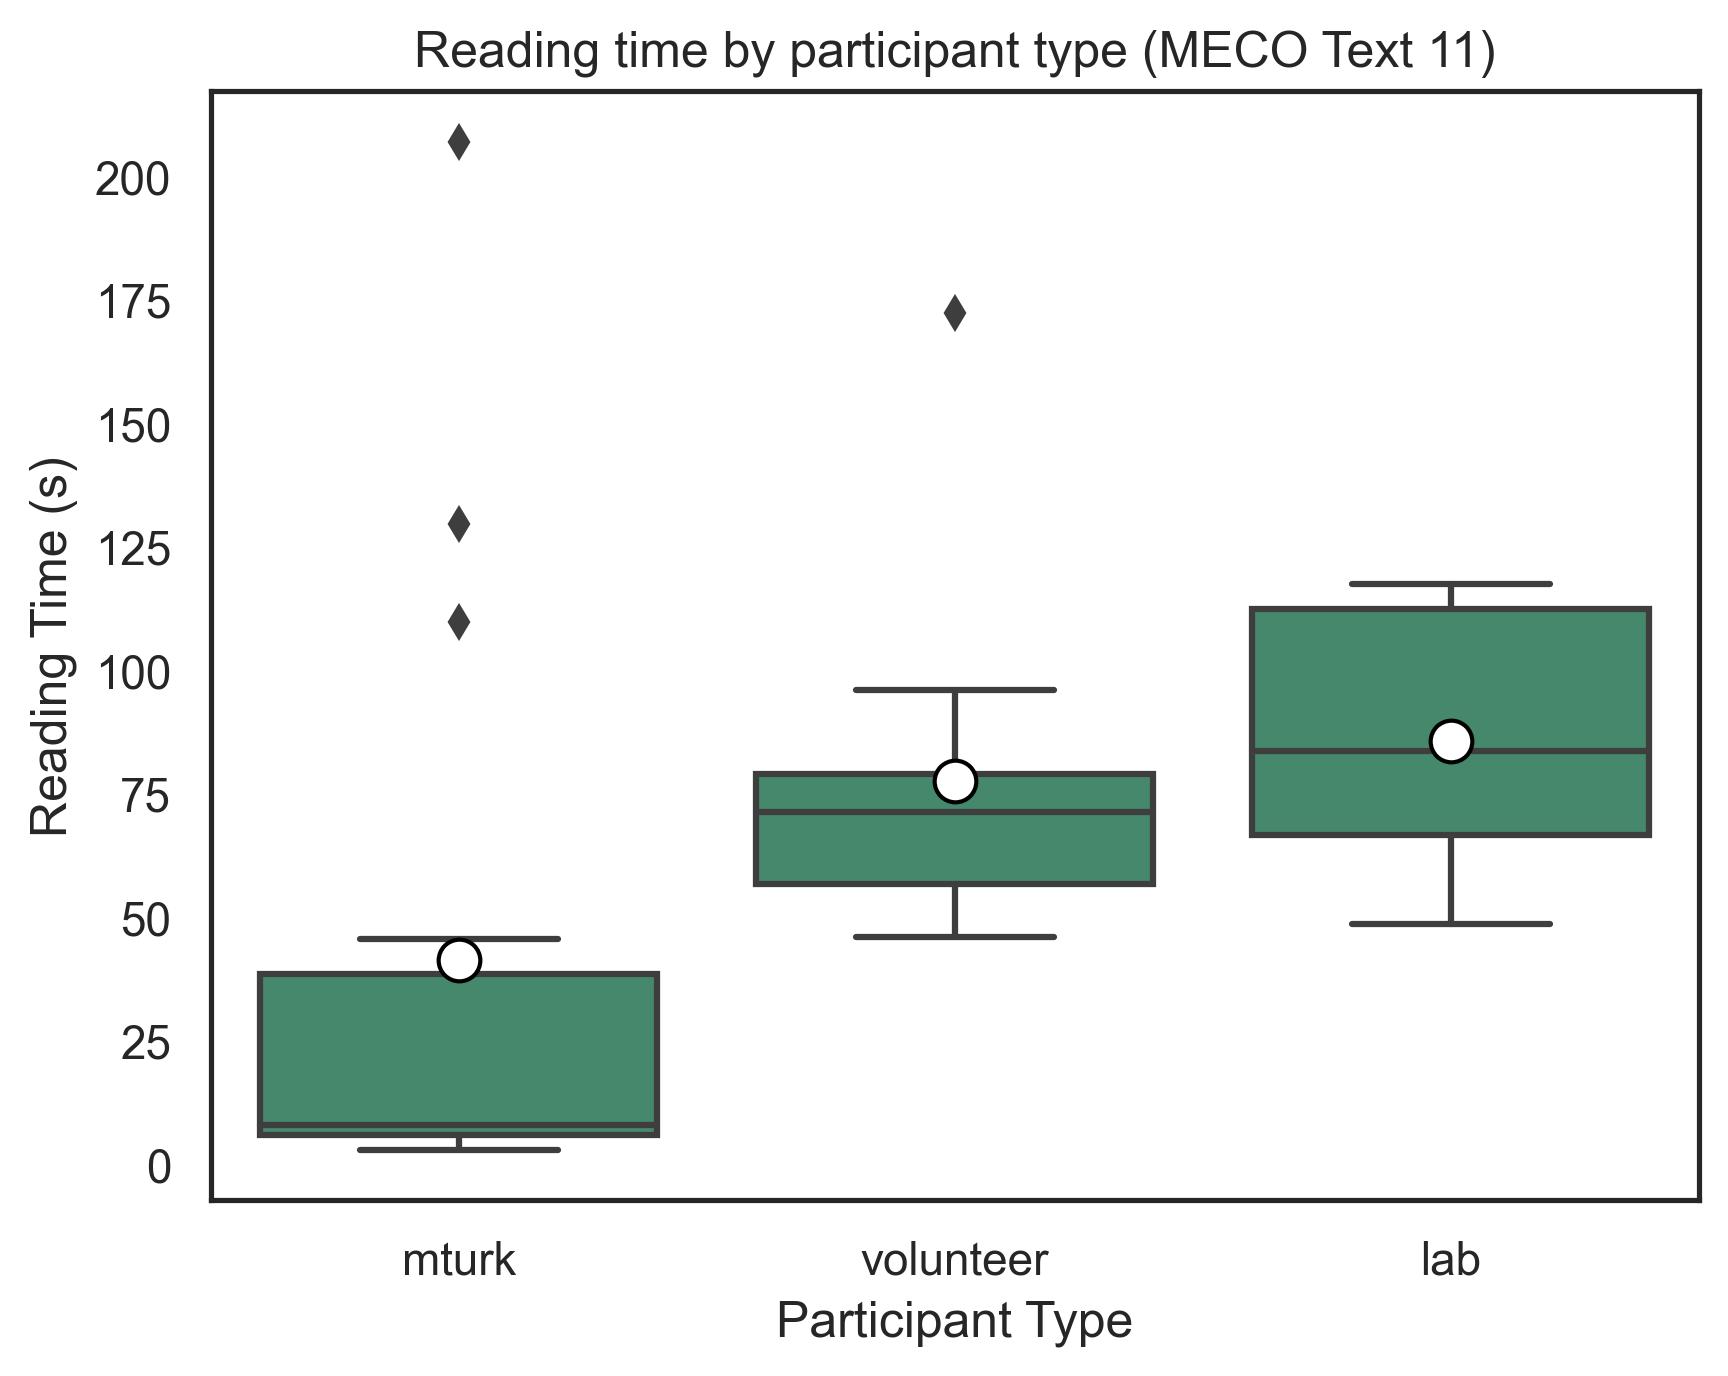

In [114]:
mypalette = sns.diverging_palette(150, 275, s=80, l=55, n=2)
sns.boxplot(data=data_subset, x="participant_type", y="trial_0_time",
            showmeans=True,
            color=mypalette[0], 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("Reading time by participant type (MECO Text 11)")
plt.ylabel("Reading Time (s)")
plt.xlabel("Participant Type")

In [115]:
correctnessPlotData.loc[:, "trial_0_time"] = correctnessPlotData.loc[:,"trial_0_time"] * 0.001

In [116]:
(correctnessPlotData.loc[(correctnessPlotData["set_name"].str.contains("_ES_")),"trial_0_time"] > 300).values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [117]:
((correctnessPlotData["set_name"].str.contains("_ES_")) & (correctnessPlotData["trial_0_time"] > 300)).sum()

1

In [118]:
correctnessPlotData.loc[((correctnessPlotData["set_name"].str.contains("_ES_")) & (correctnessPlotData["trial_0_time"] > 300)), "trial_0_time"] = np.NaN

In [119]:
correctnessPlotData[(correctnessPlotData["set_name"].str.contains("_ES_"))].participant_type.value_counts()

mturk             99
volunteer_link     8
Name: participant_type, dtype: int64

Text(0.5, 0, 'Participant Type')

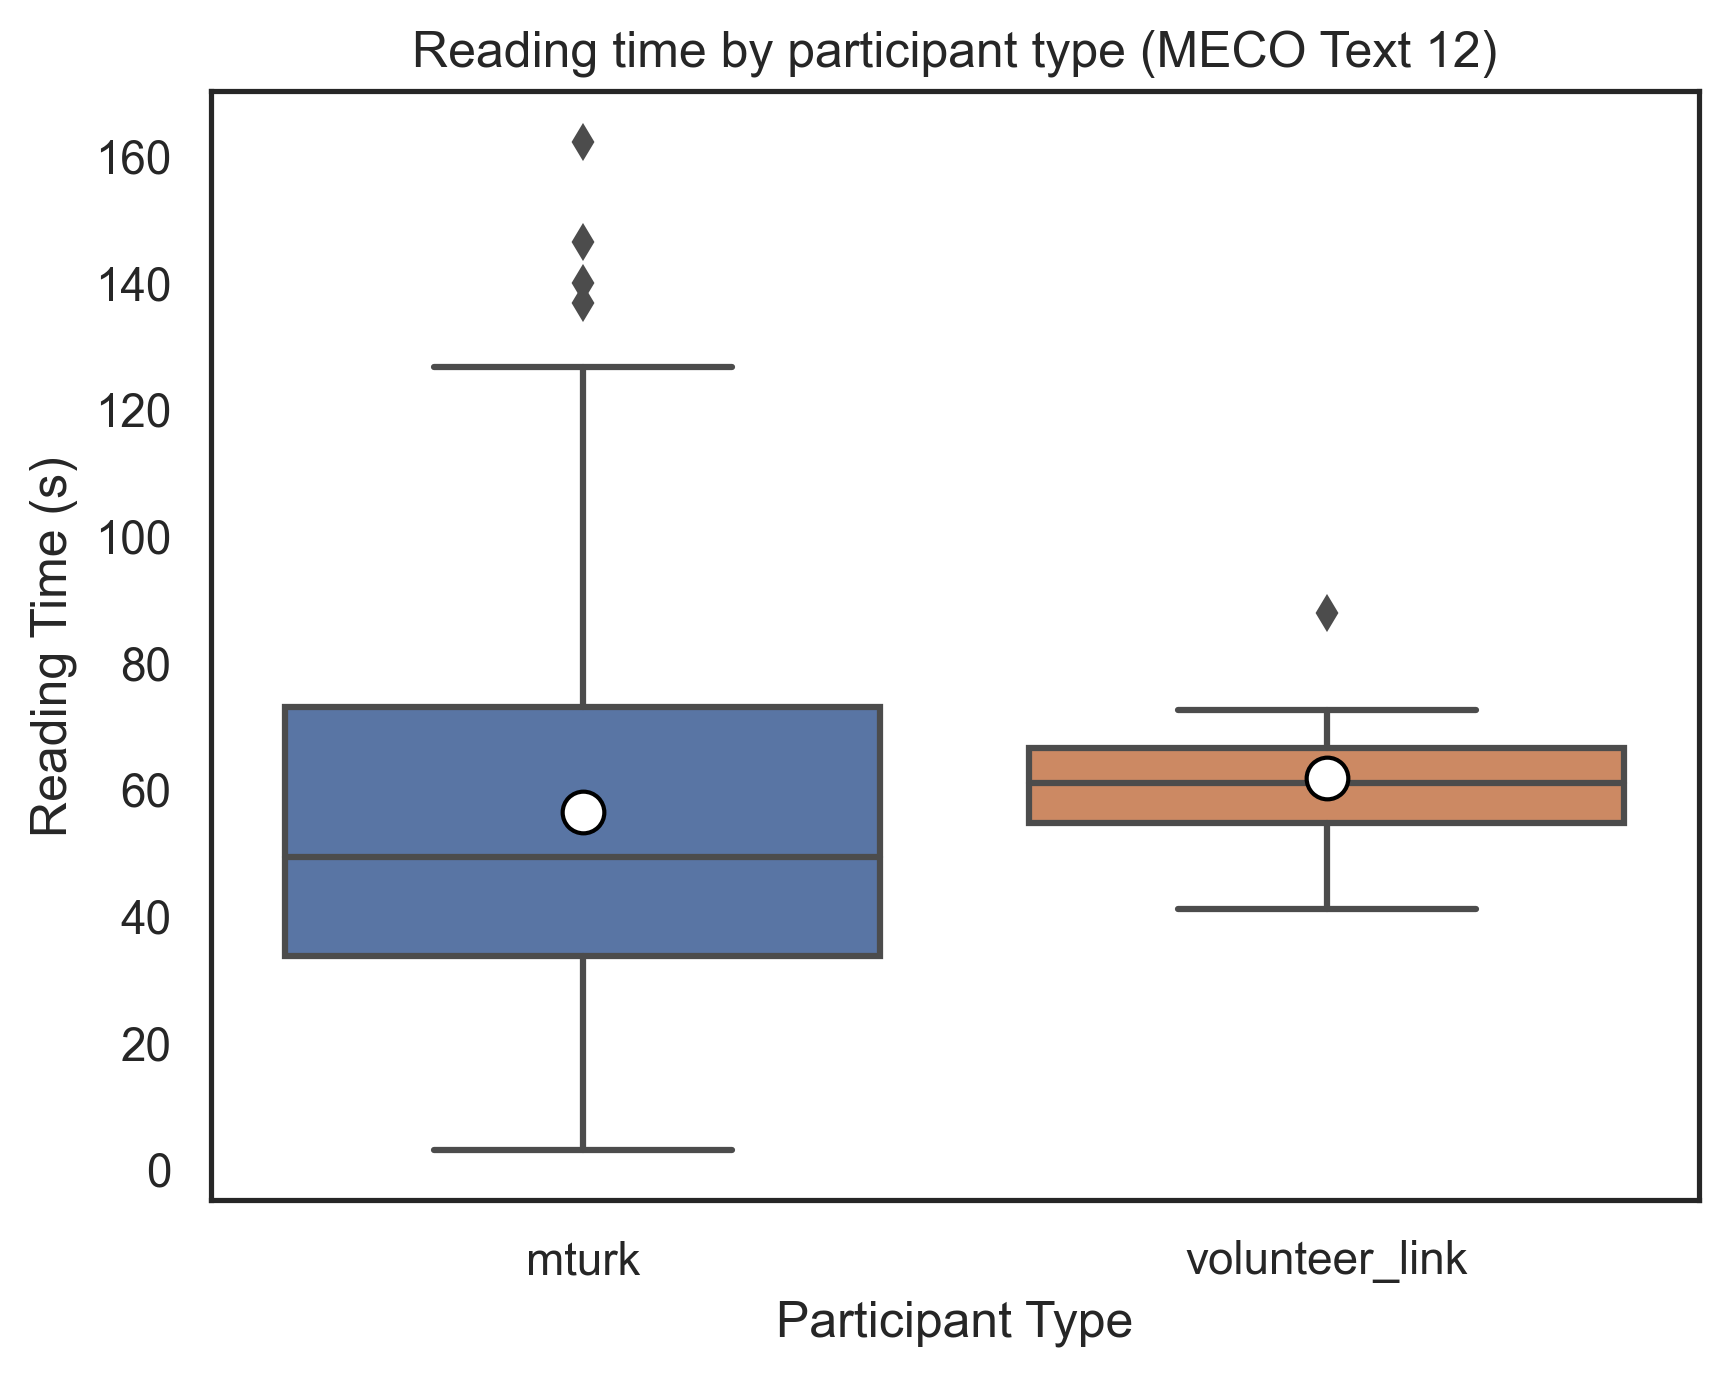

In [120]:
sns.boxplot(data=correctnessPlotData[(correctnessPlotData["set_name"].str.contains("_ES_"))], x="participant_type", y="trial_0_time",
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("Reading time by participant type (MECO Text 12)")
plt.ylabel("Reading Time (s)")
plt.xlabel("Participant Type")

In [121]:
correctnessPlotData.participant_type.value_counts(dropna=False).sum()

605

In [122]:
correctnessPlotData[correctnessPlotData["set_language"].isin(['EN', 'ES', 'DE', 'TR'])].participant_type.value_counts(dropna=True).sum()

600

In [123]:
correctnessPlotData.loc[correctnessPlotData.participant_type == "volunteer_link", "participant_type"] = "volunteer"
correctnessPlotData.loc[correctnessPlotData.participant_type == "volunteer", "participant_type"] = "volunteer"
correctnessPlotData.loc[correctnessPlotData.participant_type == "mturk", "participant_type"] = "mturk"
correctnessPlotData.loc[correctnessPlotData.participant_type == "lab", "participant_type"] = "lab"

In [129]:
correctnessPlotData.columns

Index(['worker_id', 'worker_age', 'worker_lang', 'worker_fluency', 'set_name',
       'set_trials', 'participant_type', 'platform_type', 'vision',
       'target_error',
       ...
       'pre_question_9_name', 'pre_question_9_time', 'question_9_name',
       'question_9_time', 'question_9_answer', 'question_9_correct_flag',
       'question_9_target_to_fixation_ratio', 'set_language', 'fixation_error',
       'answer_accuracy'],
      dtype='object', length=198)

In [131]:
correctnessPlotData.groupby("participant_type").worker_age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
participant_type,,,,,,,,
lab,10.0,29.60,4.17,26.0,27.00,28.5,29.75,40.0
mturk,350.0,34.53,10.82,-24.0,27.25,32.0,39.00,73.0
volunteer,245.0,21.32,5.52,18.0,19.00,20.0,21.00,51.0


In [124]:
correctnessPlotData["answer_accuracy"] = correctnessPlotData["total_correct_answers"]/10 * 100

In [125]:
correctnessPlotData["answer_accuracy"] 

0       60.0
1        0.0
2       80.0
3       80.0
4       20.0
       ...  
600     70.0
601    100.0
602    100.0
603     60.0
604     70.0
Name: answer_accuracy, Length: 605, dtype: float64

Text(0, 0.5, 'Answer Accuracy (%)')

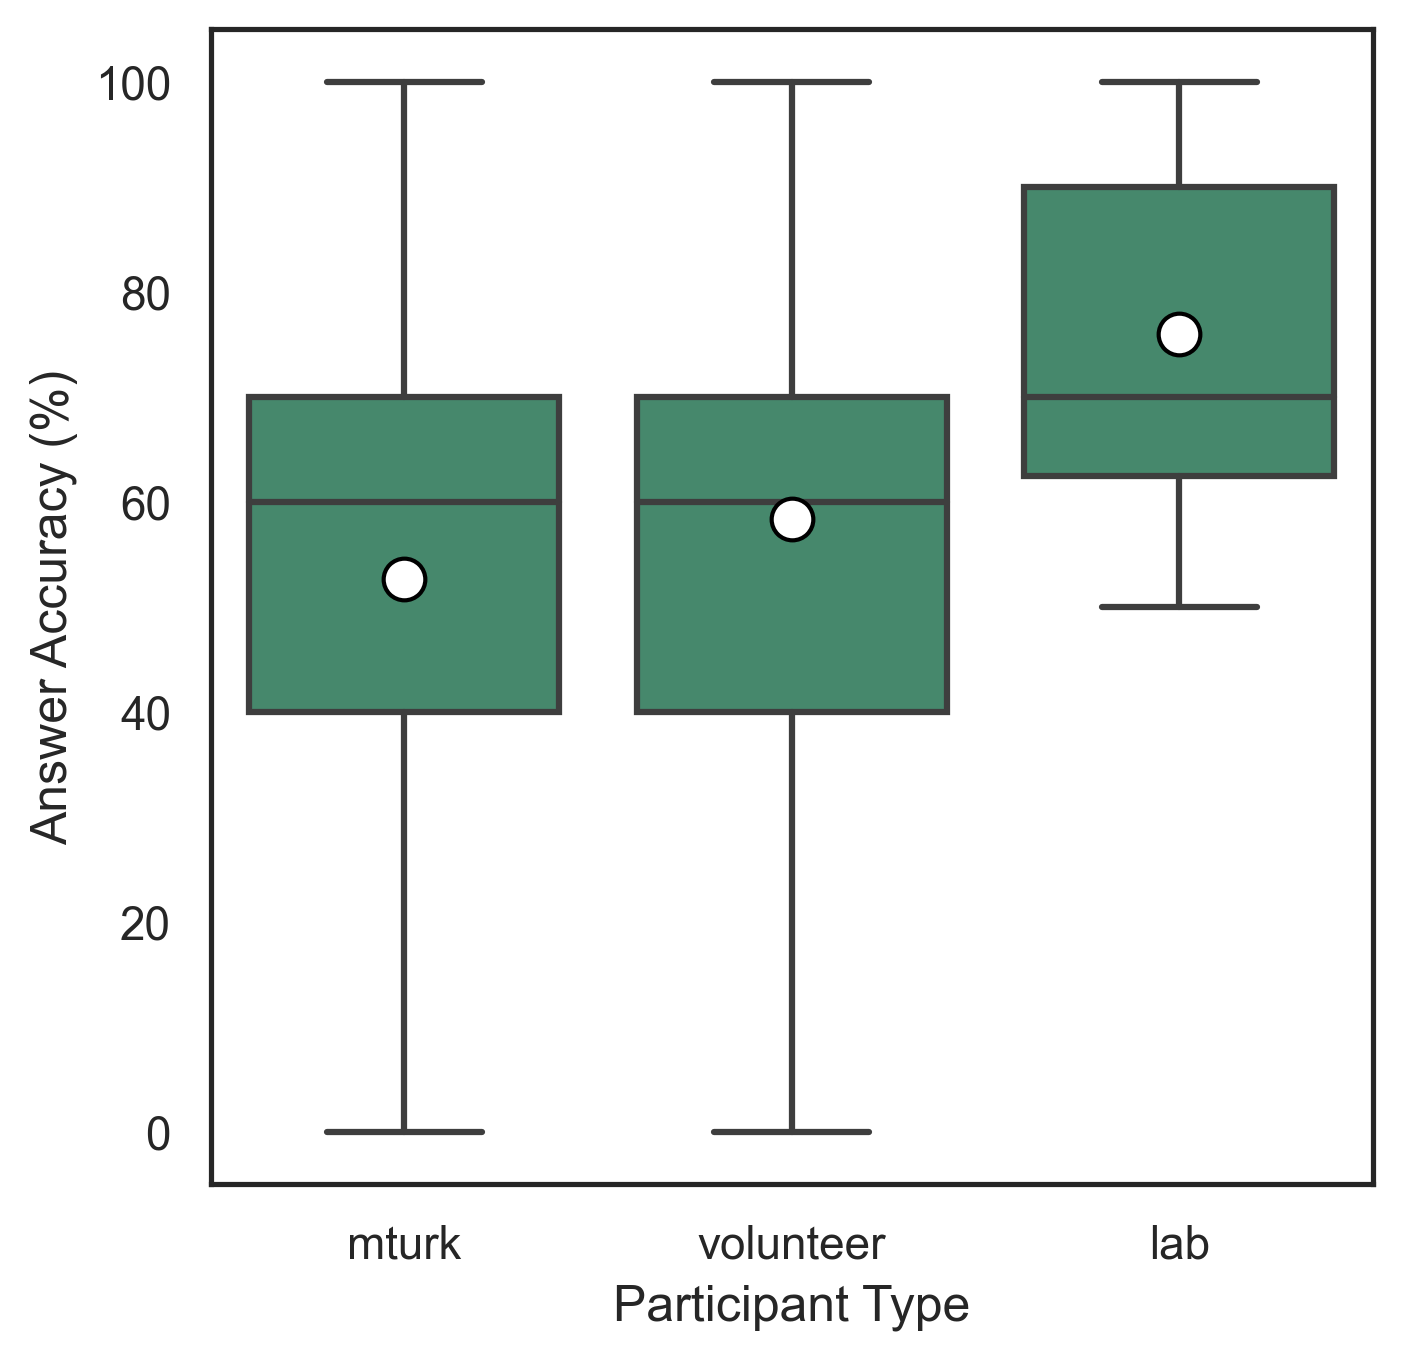

In [467]:
plt.figure(figsize=(5, 5))
mypalette = sns.diverging_palette(150, 275, s=80, l=55, n=2)
sns.boxplot(data=correctnessPlotData[correctnessPlotData["set_language"].isin(['EN', 'ES', 'DE', 'TR'])], 
            x="participant_type", 
            y="answer_accuracy", 
            color=mypalette[0],
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Participant Type")
plt.ylabel("Answer Accuracy (%)")
#plt.xticks([0,1,2,3], ["mturk","volunteer_link", "control","volunteer"])

In [472]:
correctnessPlotData[correctnessPlotData["set_language"].isin(['EN', 'ES', 'DE', 'TR'])].participant_type.value_counts()

mturk        350
volunteer    240
lab           10
Name: participant_type, dtype: int64

Text(0, 0.5, 'Webgazer Calibration Accuracy (%)')

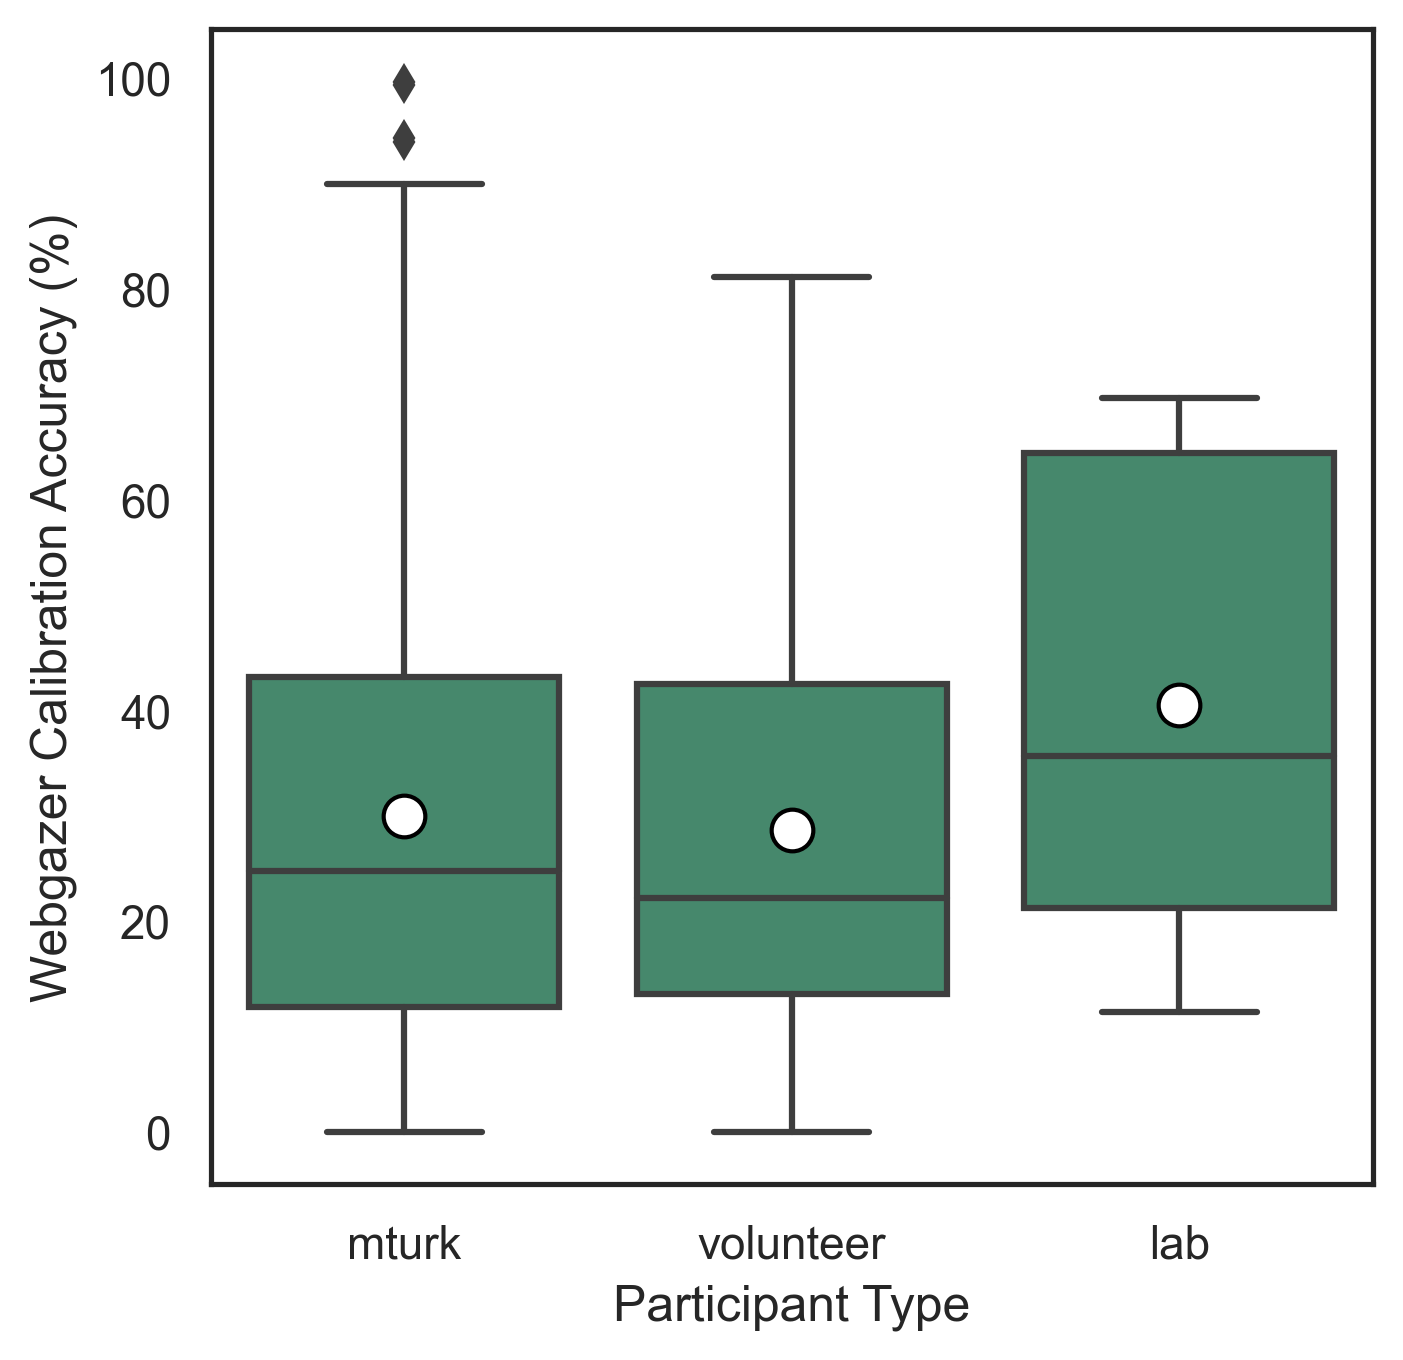

In [471]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=correctnessPlotData[correctnessPlotData["set_language"].isin(['EN', 'ES', 'DE', 'TR'])], 
            x="participant_type", 
            y="avg_roi_last_val", 
            color=mypalette[0],
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Participant Type")
plt.ylabel("Webgazer Calibration Accuracy (%)")

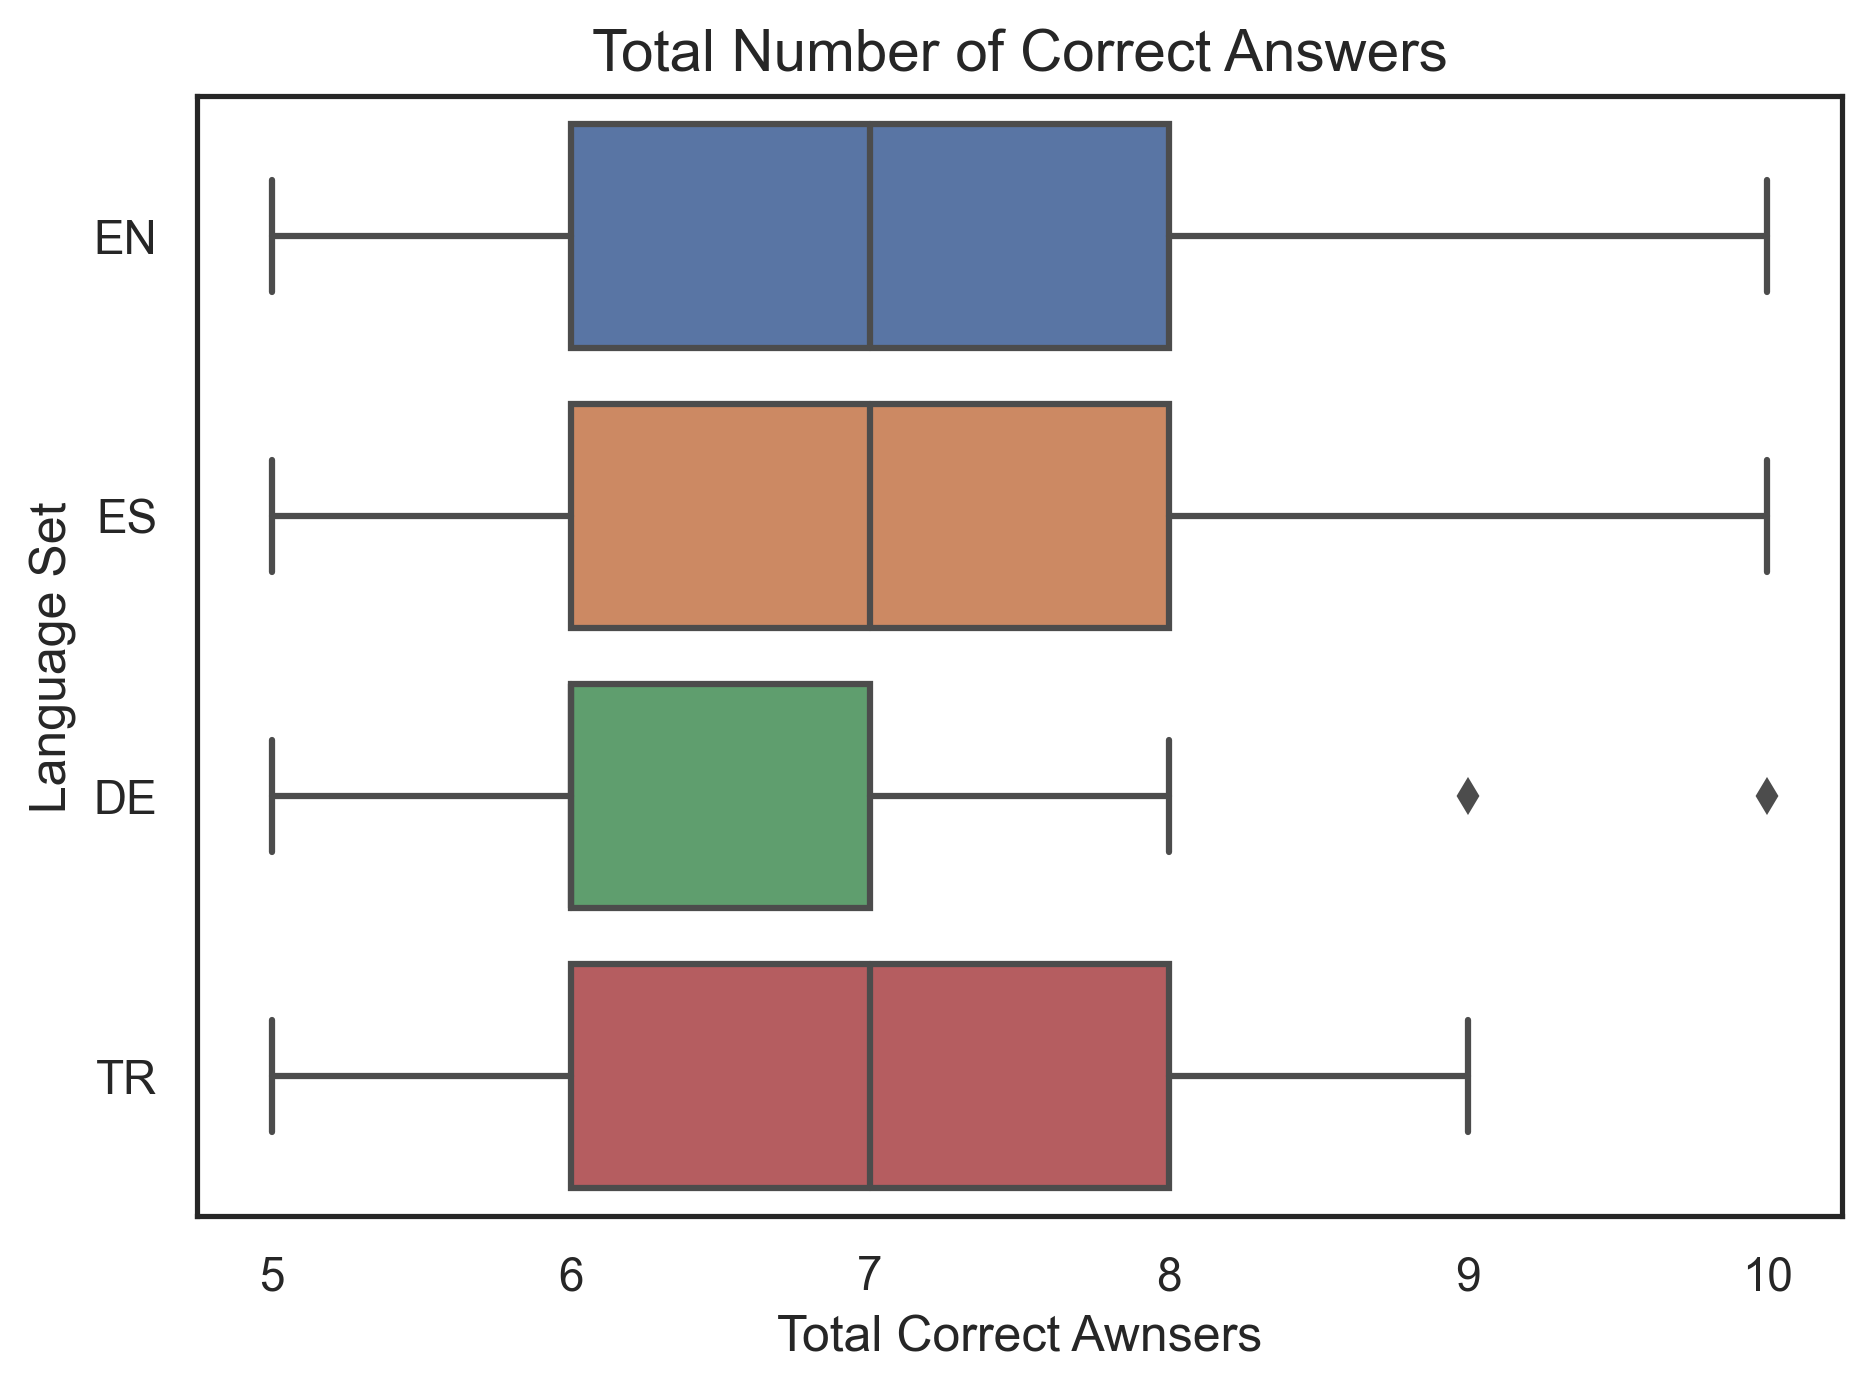

In [111]:
sns.boxplot(data=data_filtered, x="total_correct_answers", y="Set Language")
plt.title("Total Number of Correct Answers", size=14)
plt.xlabel("Total Correct Awnsers")
plt.ylabel("Language Set")
plt.tight_layout()

c:\Anaconda3\envs\jsPsychDev\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


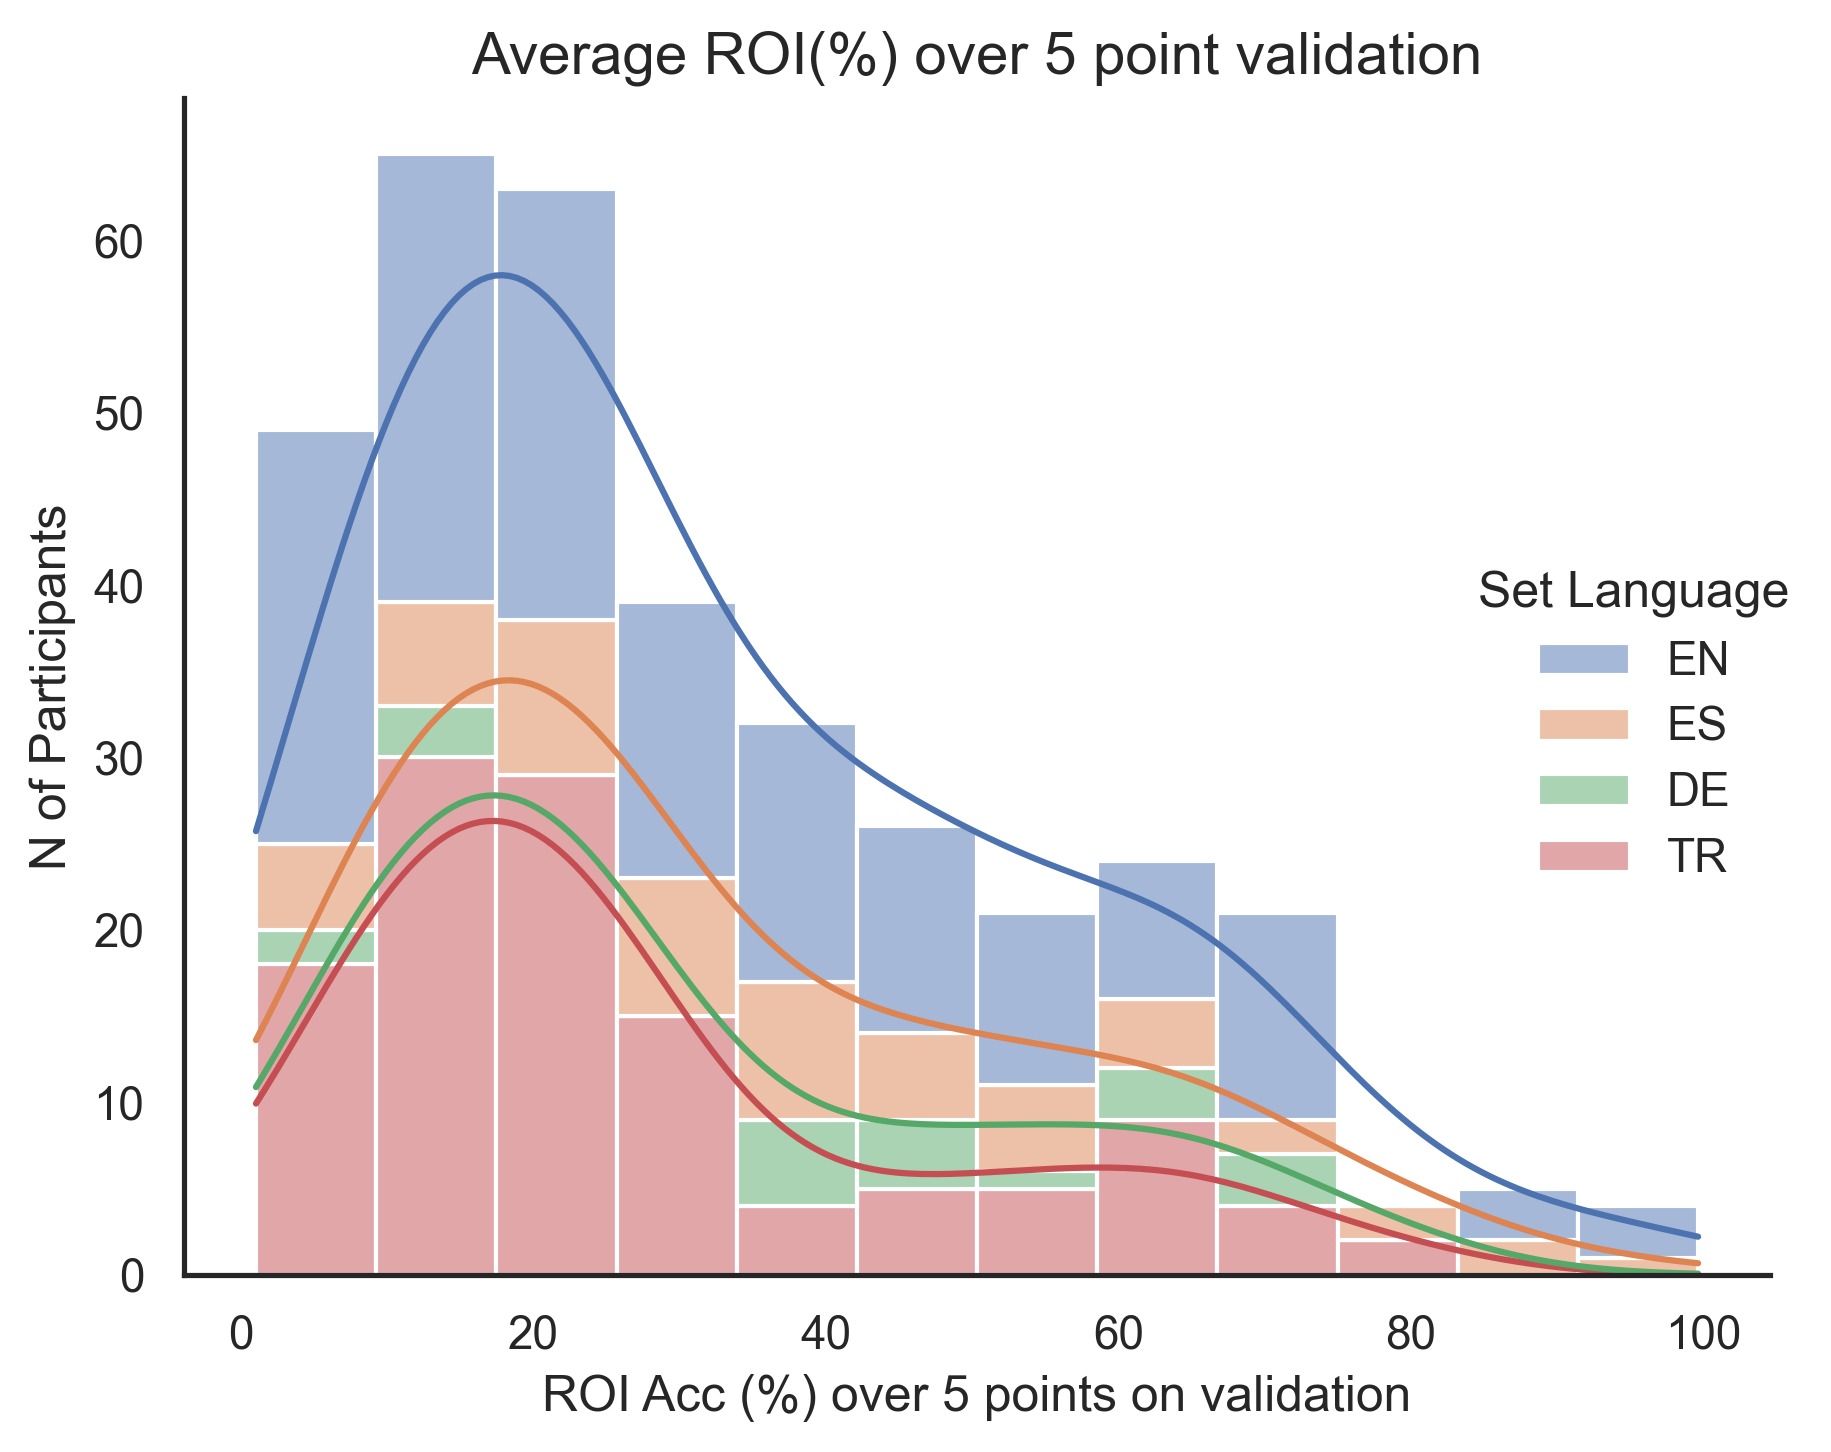

In [112]:
sns.displot(data=data_filtered, x="avg_roi_last_val", multiple="stack", hue="Set Language", kde=True)
plt.xlabel("ROI Acc (%) over 5 points on validation")
plt.title("Average ROI(%) over 5 point validation", size=14)
plt.ylabel("N of Participants")
plt.tight_layout()

In [113]:
data_filtered["avg_roi_last_val"].describe()

count    353.000000
mean      32.098265
std       22.280846
min        1.016949
25%       14.996060
50%       25.423729
75%       46.468927
max       99.661017
Name: avg_roi_last_val, dtype: float64

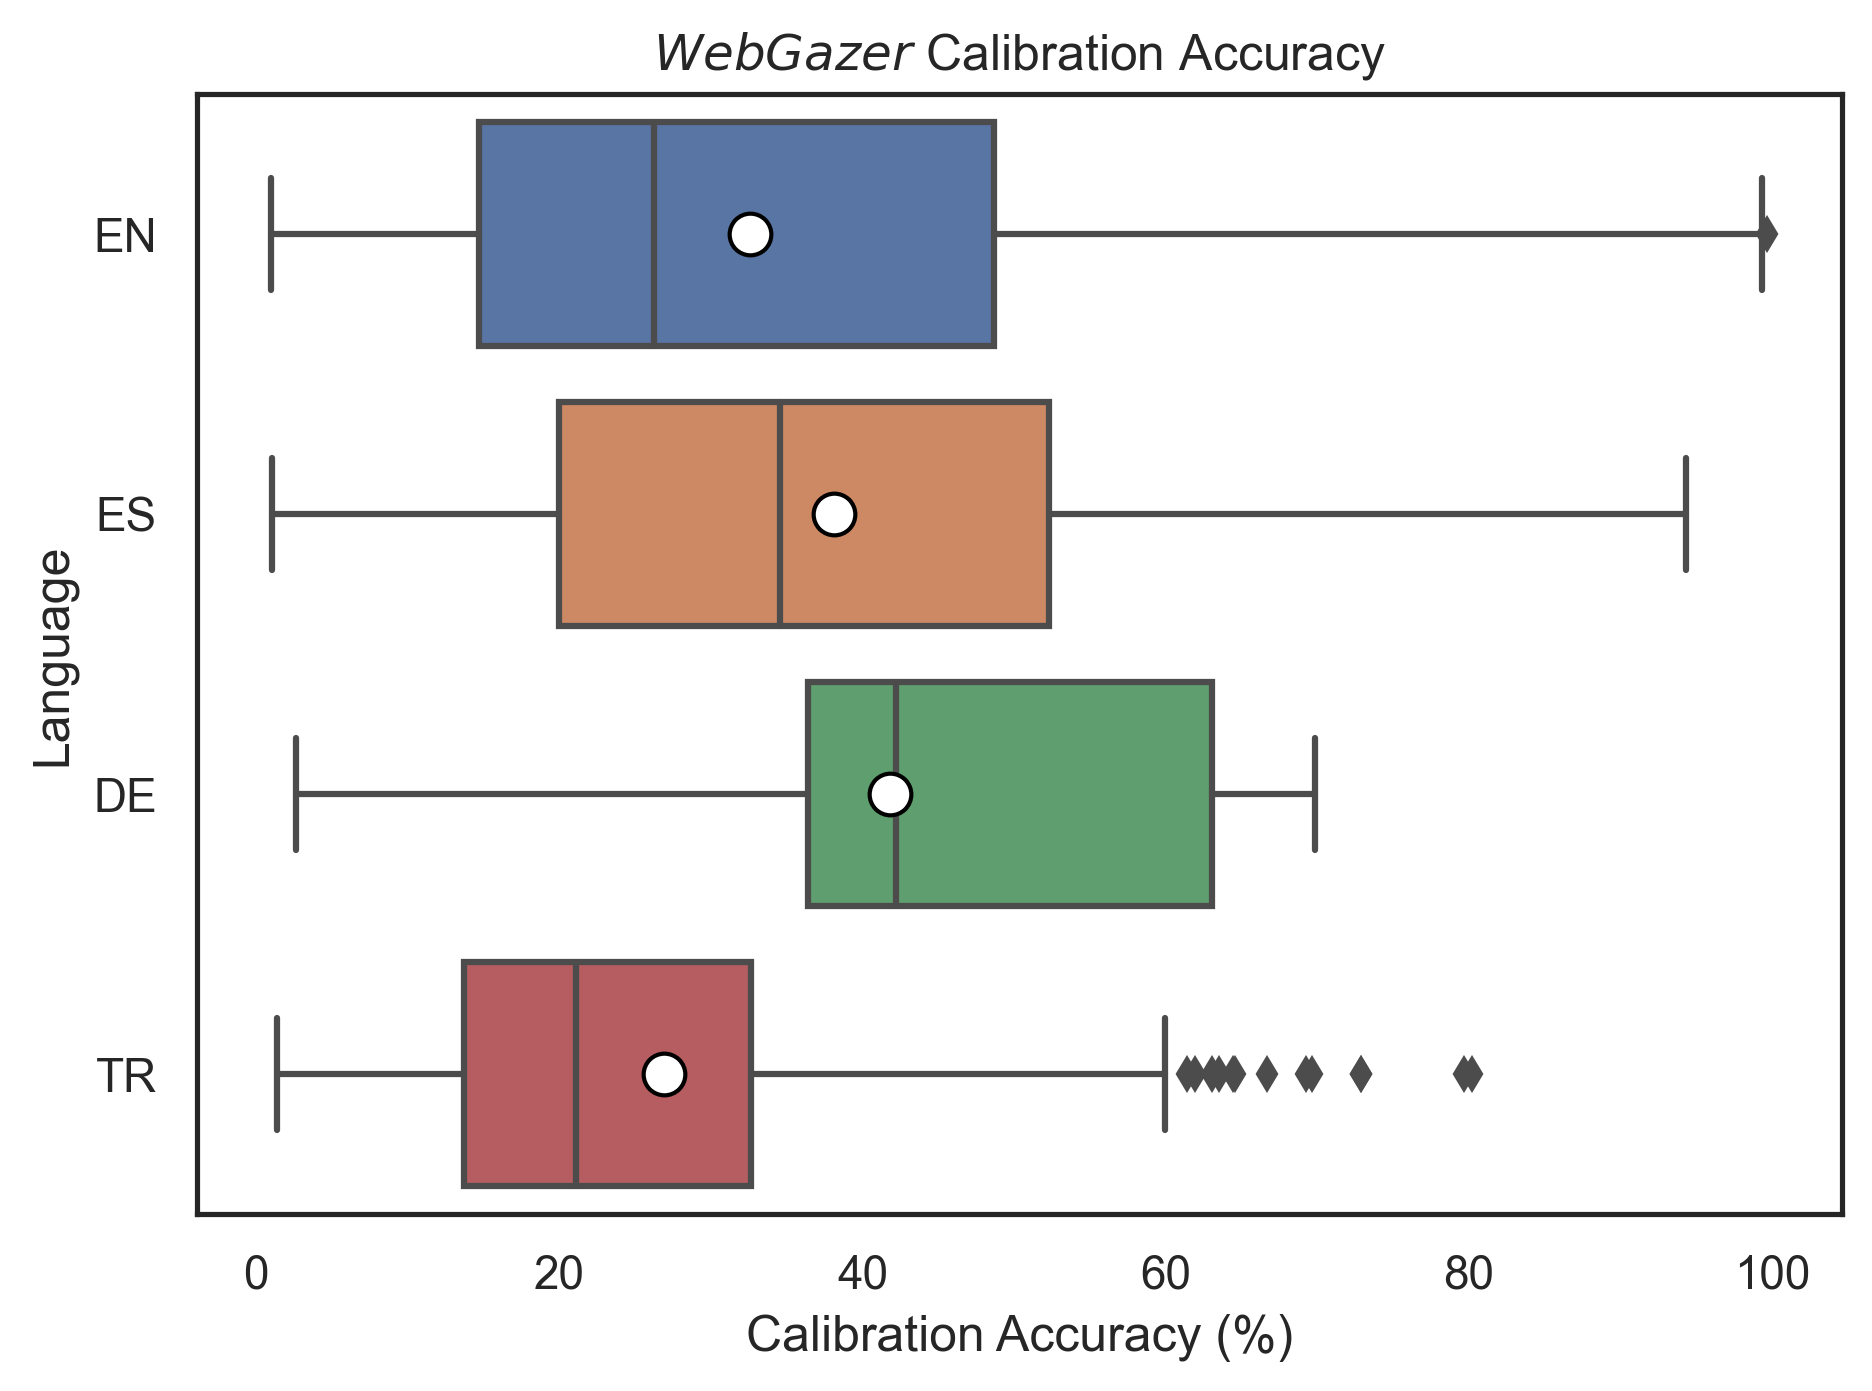

In [127]:
sns.boxplot(data=data_filtered, x="avg_roi_last_val", y="Set Language",             
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("$WebGazer$ Calibration Accuracy")
plt.xlabel("Calibration Accuracy (%)")
plt.ylabel("Language")
plt.tight_layout()

In [115]:
data_filtered["time_taken_min"] = data_filtered.exp_total_time*0.000016666
all_data["time_taken_min"] = np.abs(all_data.exp_total_time)*0.000016666

c:\Anaconda3\envs\jsPsychDev\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


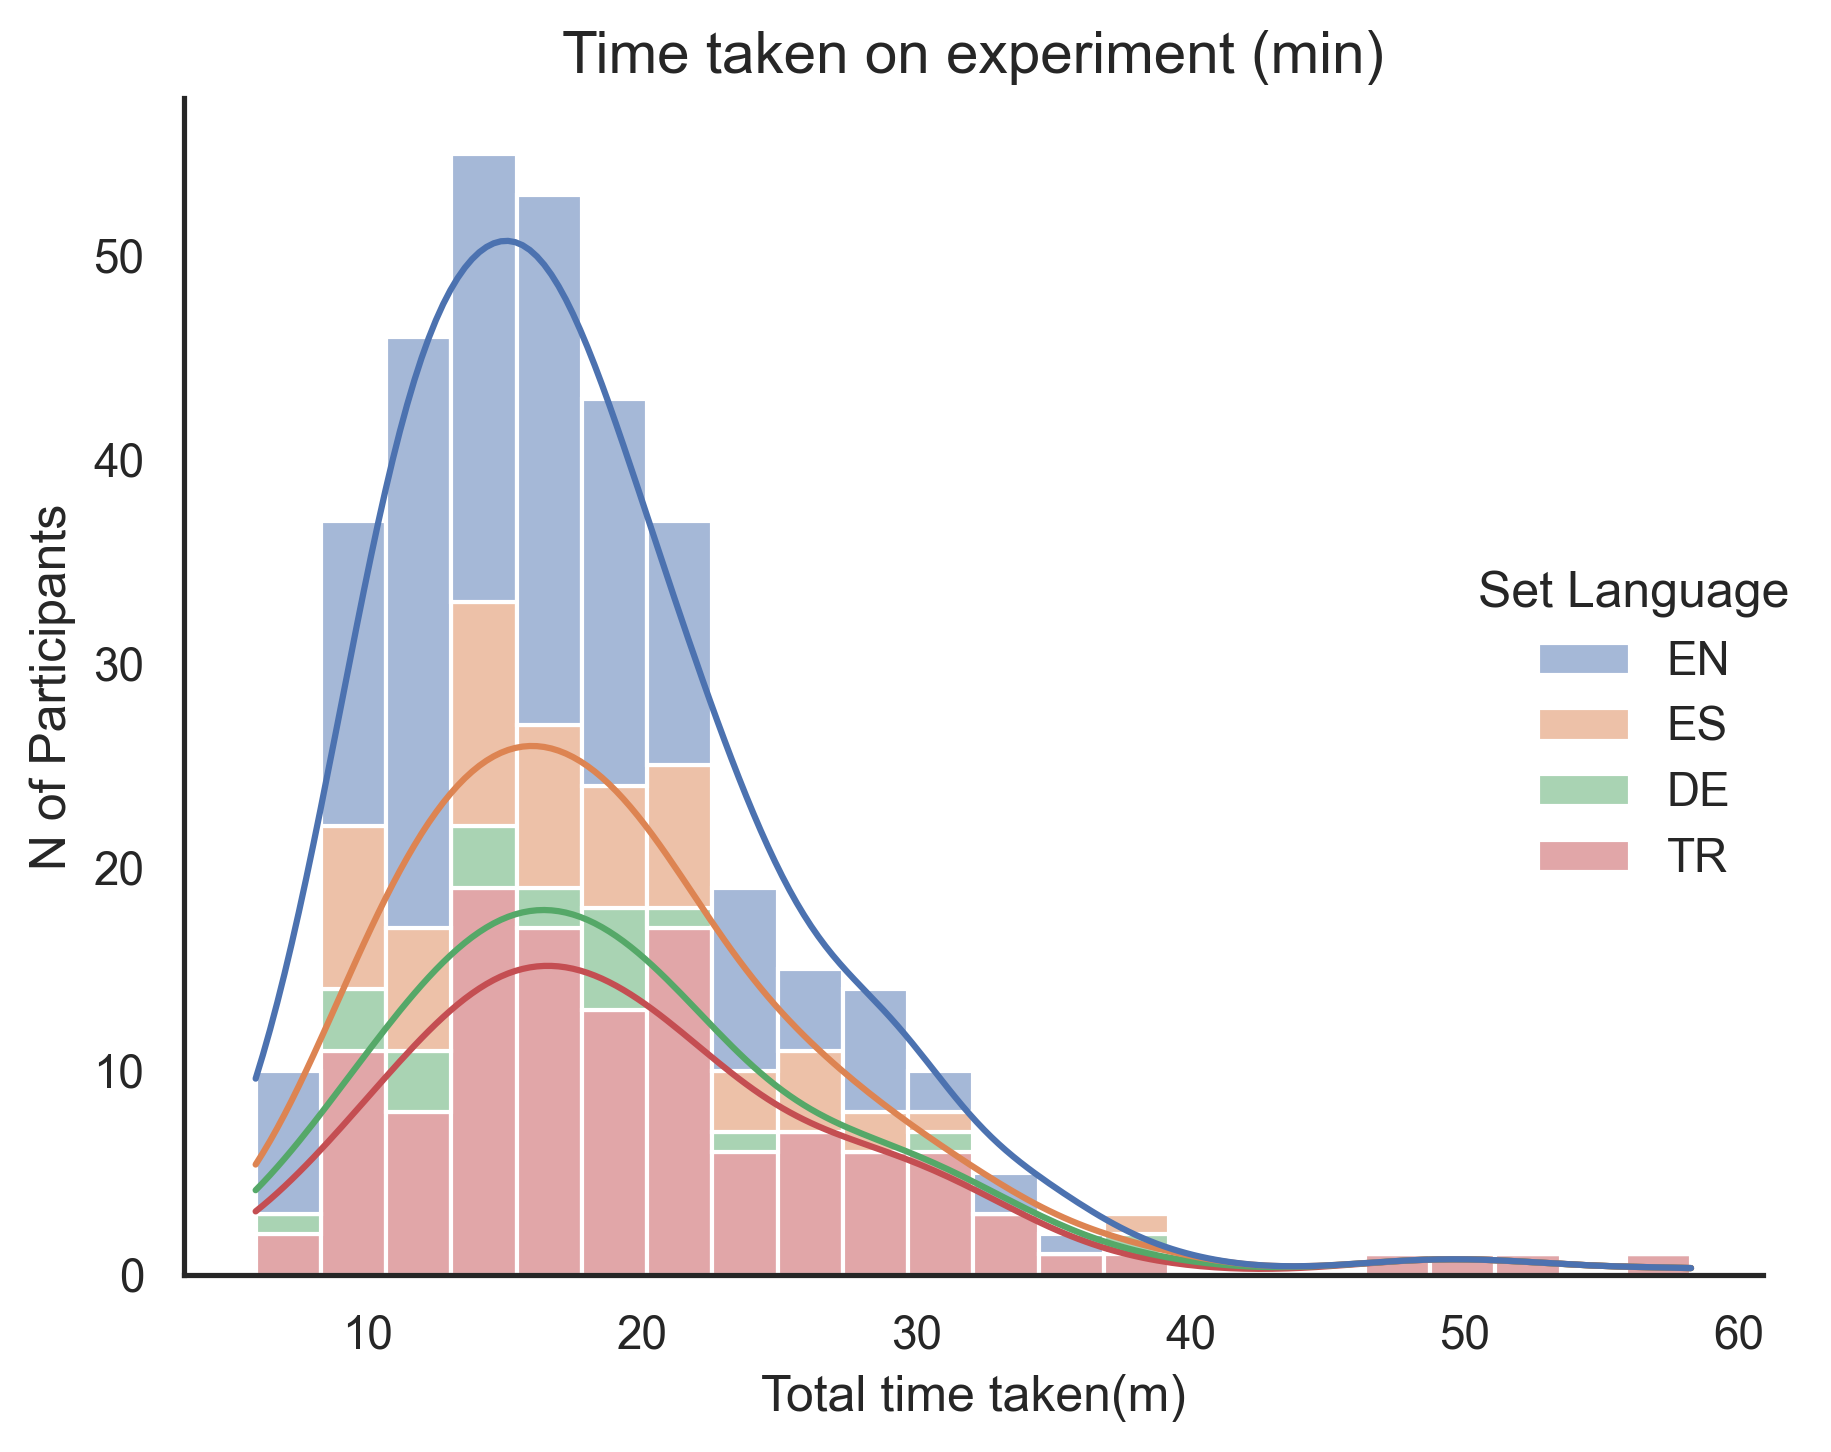

In [116]:
sns.displot(data=data_filtered, x="time_taken_min", multiple="stack", hue="Set Language", kde=True)
plt.title("Time taken on experiment (min)", size=14)
plt.xlabel("Total time taken(m)")
plt.ylabel("N of Participants")
plt.tight_layout()

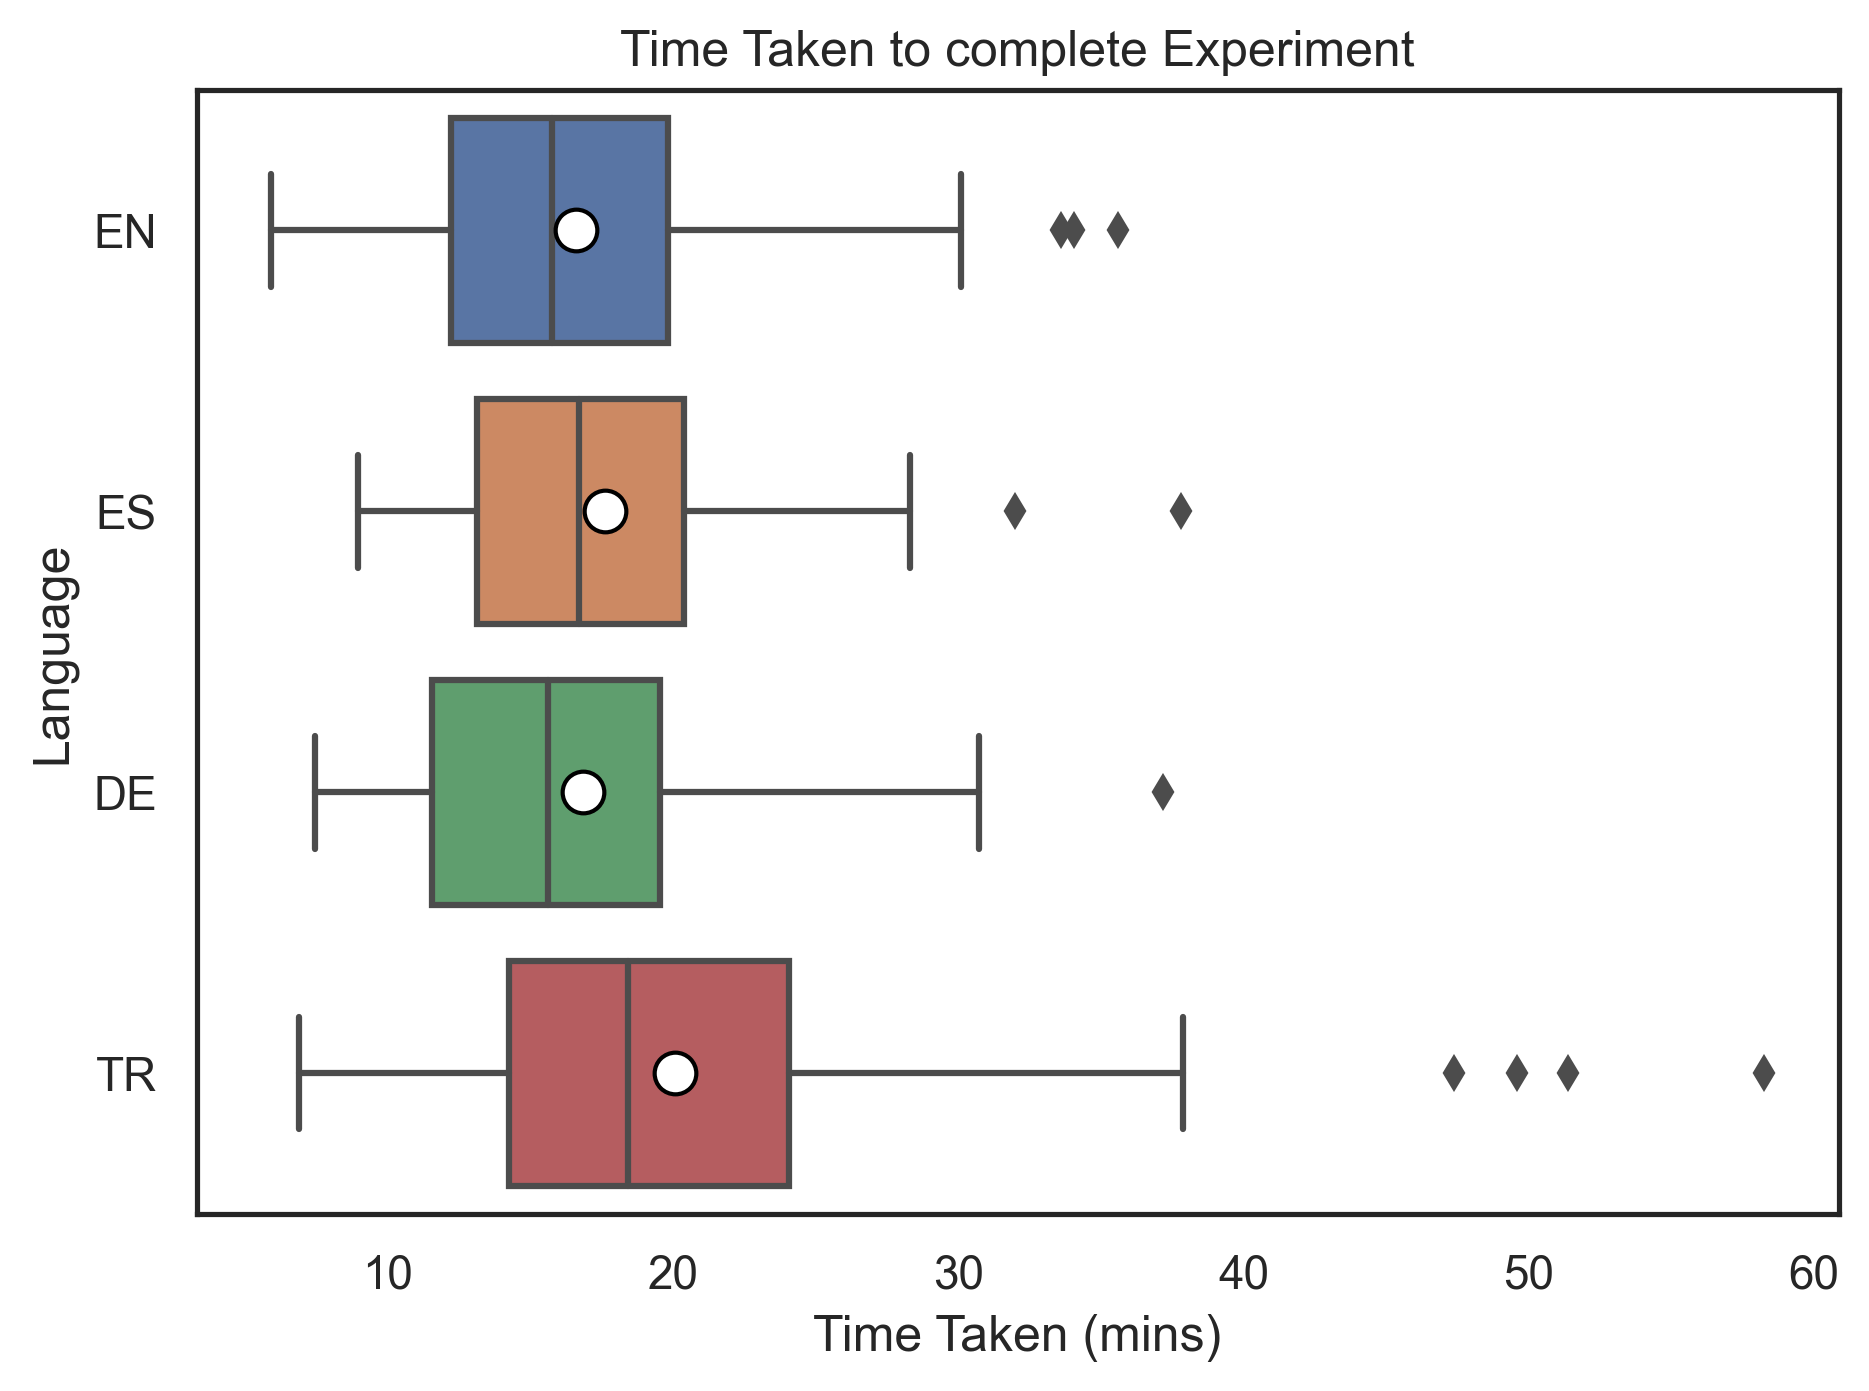

In [117]:
sns.boxplot(data=data_filtered, 
            x="time_taken_min", 
            y="Set Language",
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("Time Taken to complete Experiment")
plt.xlabel("Time Taken (mins)")
plt.ylabel("Language")
plt.tight_layout()

In [118]:
sample_rate_bins = np.zeros(len(data_filtered),dtype="<U20")
order_to_plot = []
for i in range(0,30,5):
    mask = (data_filtered.webgazer_sample_rate >= i) & (data_filtered.webgazer_sample_rate < i+5)
    sample_rate_bins[mask] = f"{i}-{i+5}"
    order_to_plot.append(f"{i}-{i+5}")

In [119]:
data_filtered.webgazer_sample_rate.mean().round(2), data_filtered.webgazer_sample_rate.std().round(2)

(25.39, 5.67)

In [120]:
sample_rate_bins_all_data = np.zeros(len(all_data_only_mturk),dtype="<U20")
for i in range(0,30,5):
    mask = (all_data_only_mturk.webgazer_sample_rate >= i) & (all_data_only_mturk.webgazer_sample_rate < i+5)
    sample_rate_bins_all_data[mask] = f"{i}-{i+5}"

In [121]:
sample_rate_bins

array(['15-20', '15-20', '25-30', '10-15', '25-30', '25-30', '25-30',
       '25-30', '15-20', '15-20', '25-30', '25-30', '25-30', '20-25',
       '25-30', '20-25', '25-30', '10-15', '25-30', '25-30', '15-20',
       '25-30', '25-30', '20-25', '25-30', '20-25', '25-30', '15-20',
       '25-30', '25-30', '25-30', '15-20', '25-30', '25-30', '25-30',
       '25-30', '25-30', '25-30', '25-30', '25-30', '25-30', '25-30',
       '25-30', '20-25', '25-30', '10-15', '25-30', '25-30', '15-20',
       '25-30', '25-30', '20-25', '15-20', '25-30', '25-30', '25-30',
       '10-15', '20-25', '20-25', '25-30', '15-20', '25-30', '25-30',
       '25-30', '15-20', '10-15', '25-30', '25-30', '25-30', '25-30',
       '20-25', '25-30', '25-30', '25-30', '15-20', '20-25', '25-30',
       '25-30', '25-30', '25-30', '25-30', '20-25', '25-30', '25-30',
       '25-30', '25-30', '15-20', '15-20', '25-30', '25-30', '25-30',
       '20-25', '25-30', '25-30', '25-30', '10-15', '25-30', '10-15',
       '15-20', '25-

In [122]:
data_filtered["sample_rate_bins"] = sample_rate_bins
all_data_only_mturk["sample_rate_bins"] = sample_rate_bins_all_data

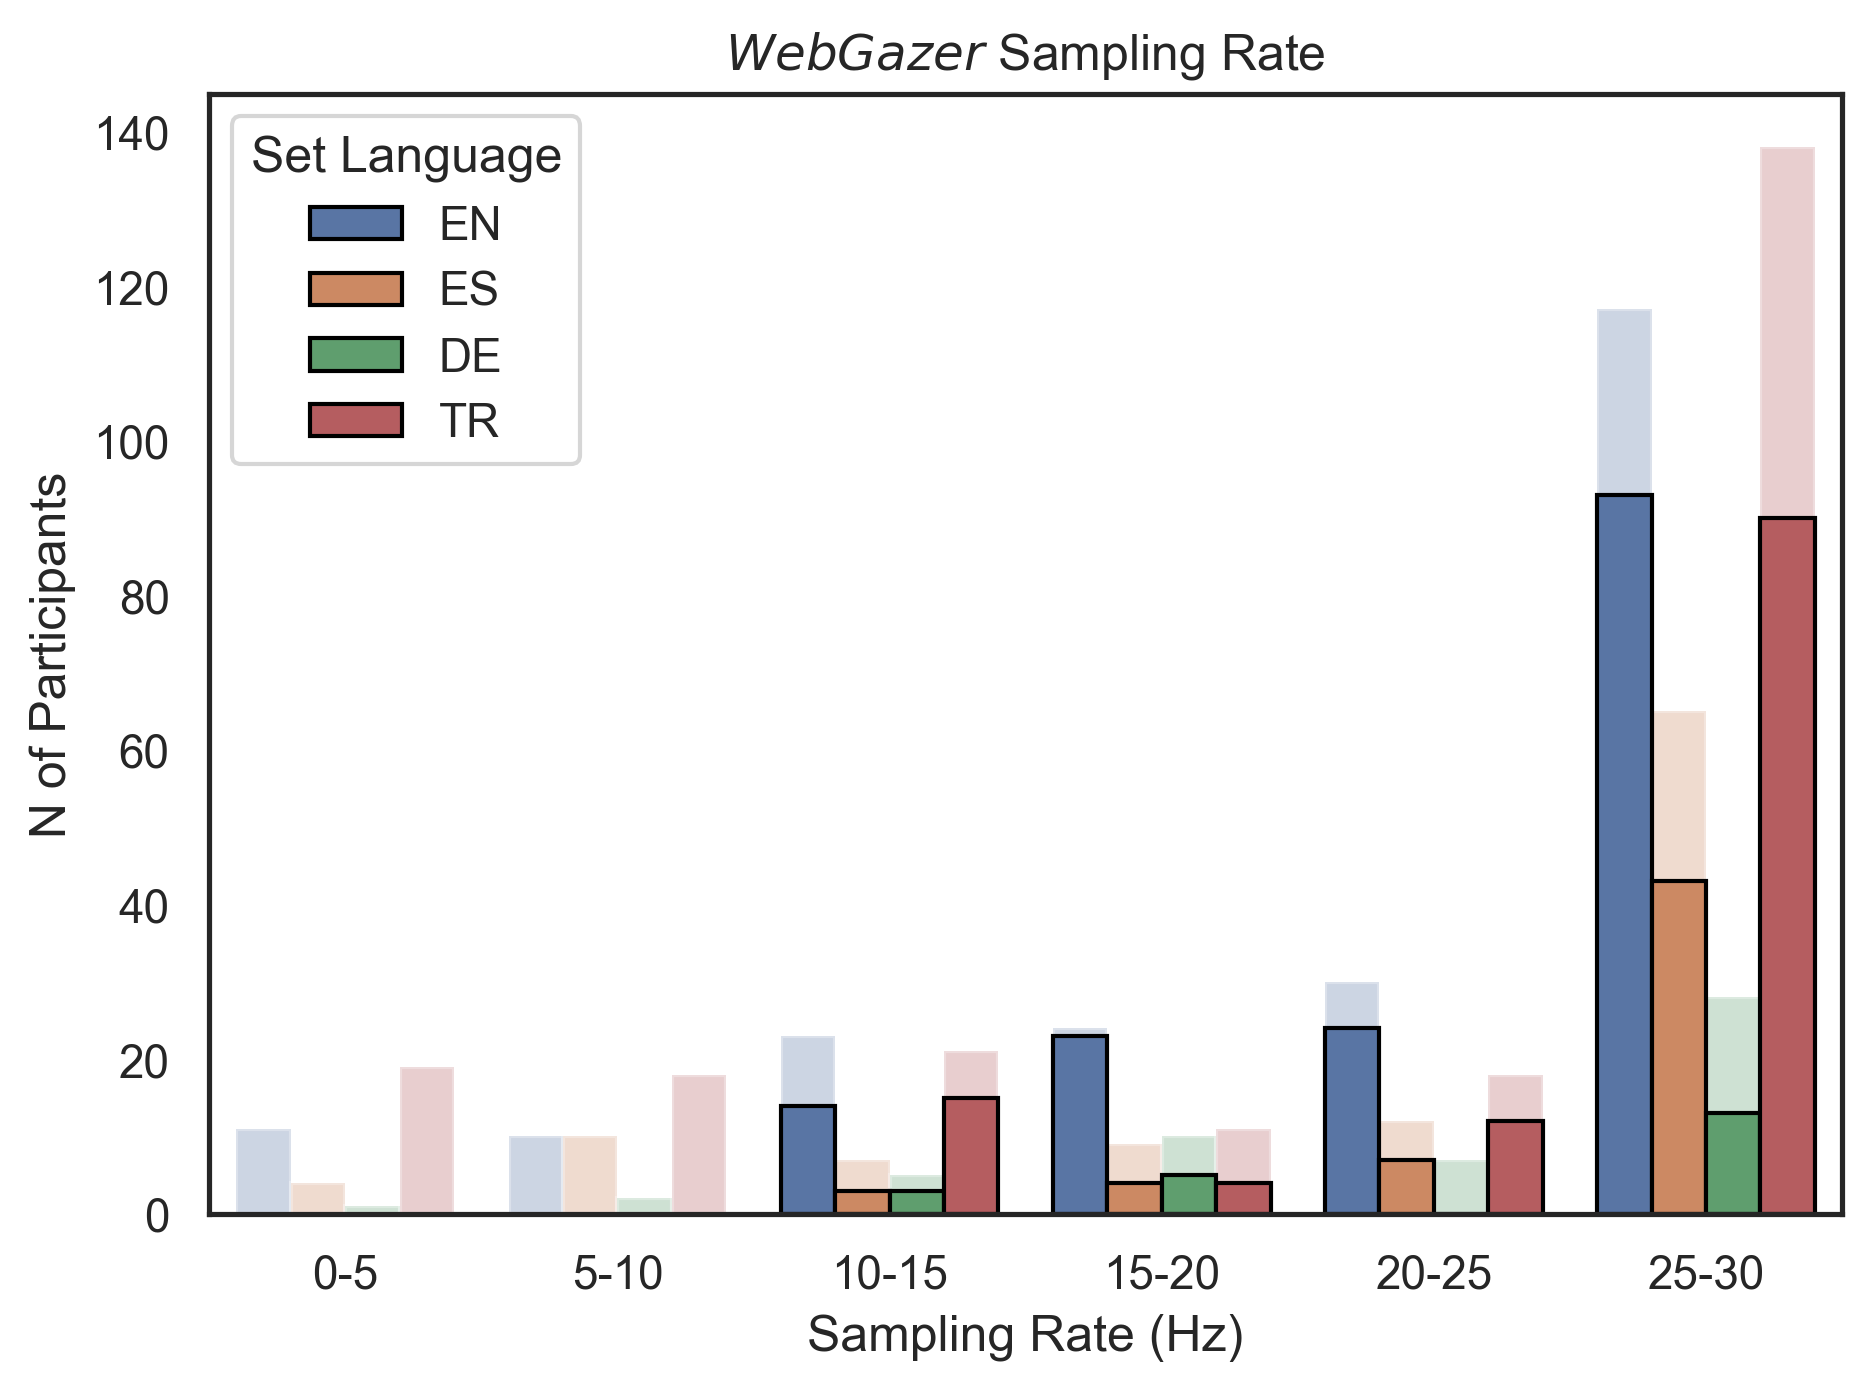

In [123]:
ax_all = sns.countplot(data=all_data_only_mturk, x="sample_rate_bins",
              hue="set_language", order=order_to_plot,alpha=0.3)
ax_all.get_legend().remove()
ax = sns.countplot(data=data_filtered, x="sample_rate_bins",
              hue="Set Language", order=order_to_plot,  edgecolor="black", linewidth=1)

h,l = ax.get_legend_handles_labels()
plt.legend(h[4:8],l[4:8], title="Set Language")
sns.move_legend(ax, "upper left")
plt.title("$WebGazer$ Sampling Rate")
plt.xlabel("Sampling Rate (Hz)")
plt.ylabel("N of Participants")
plt.tight_layout()
plt.show()

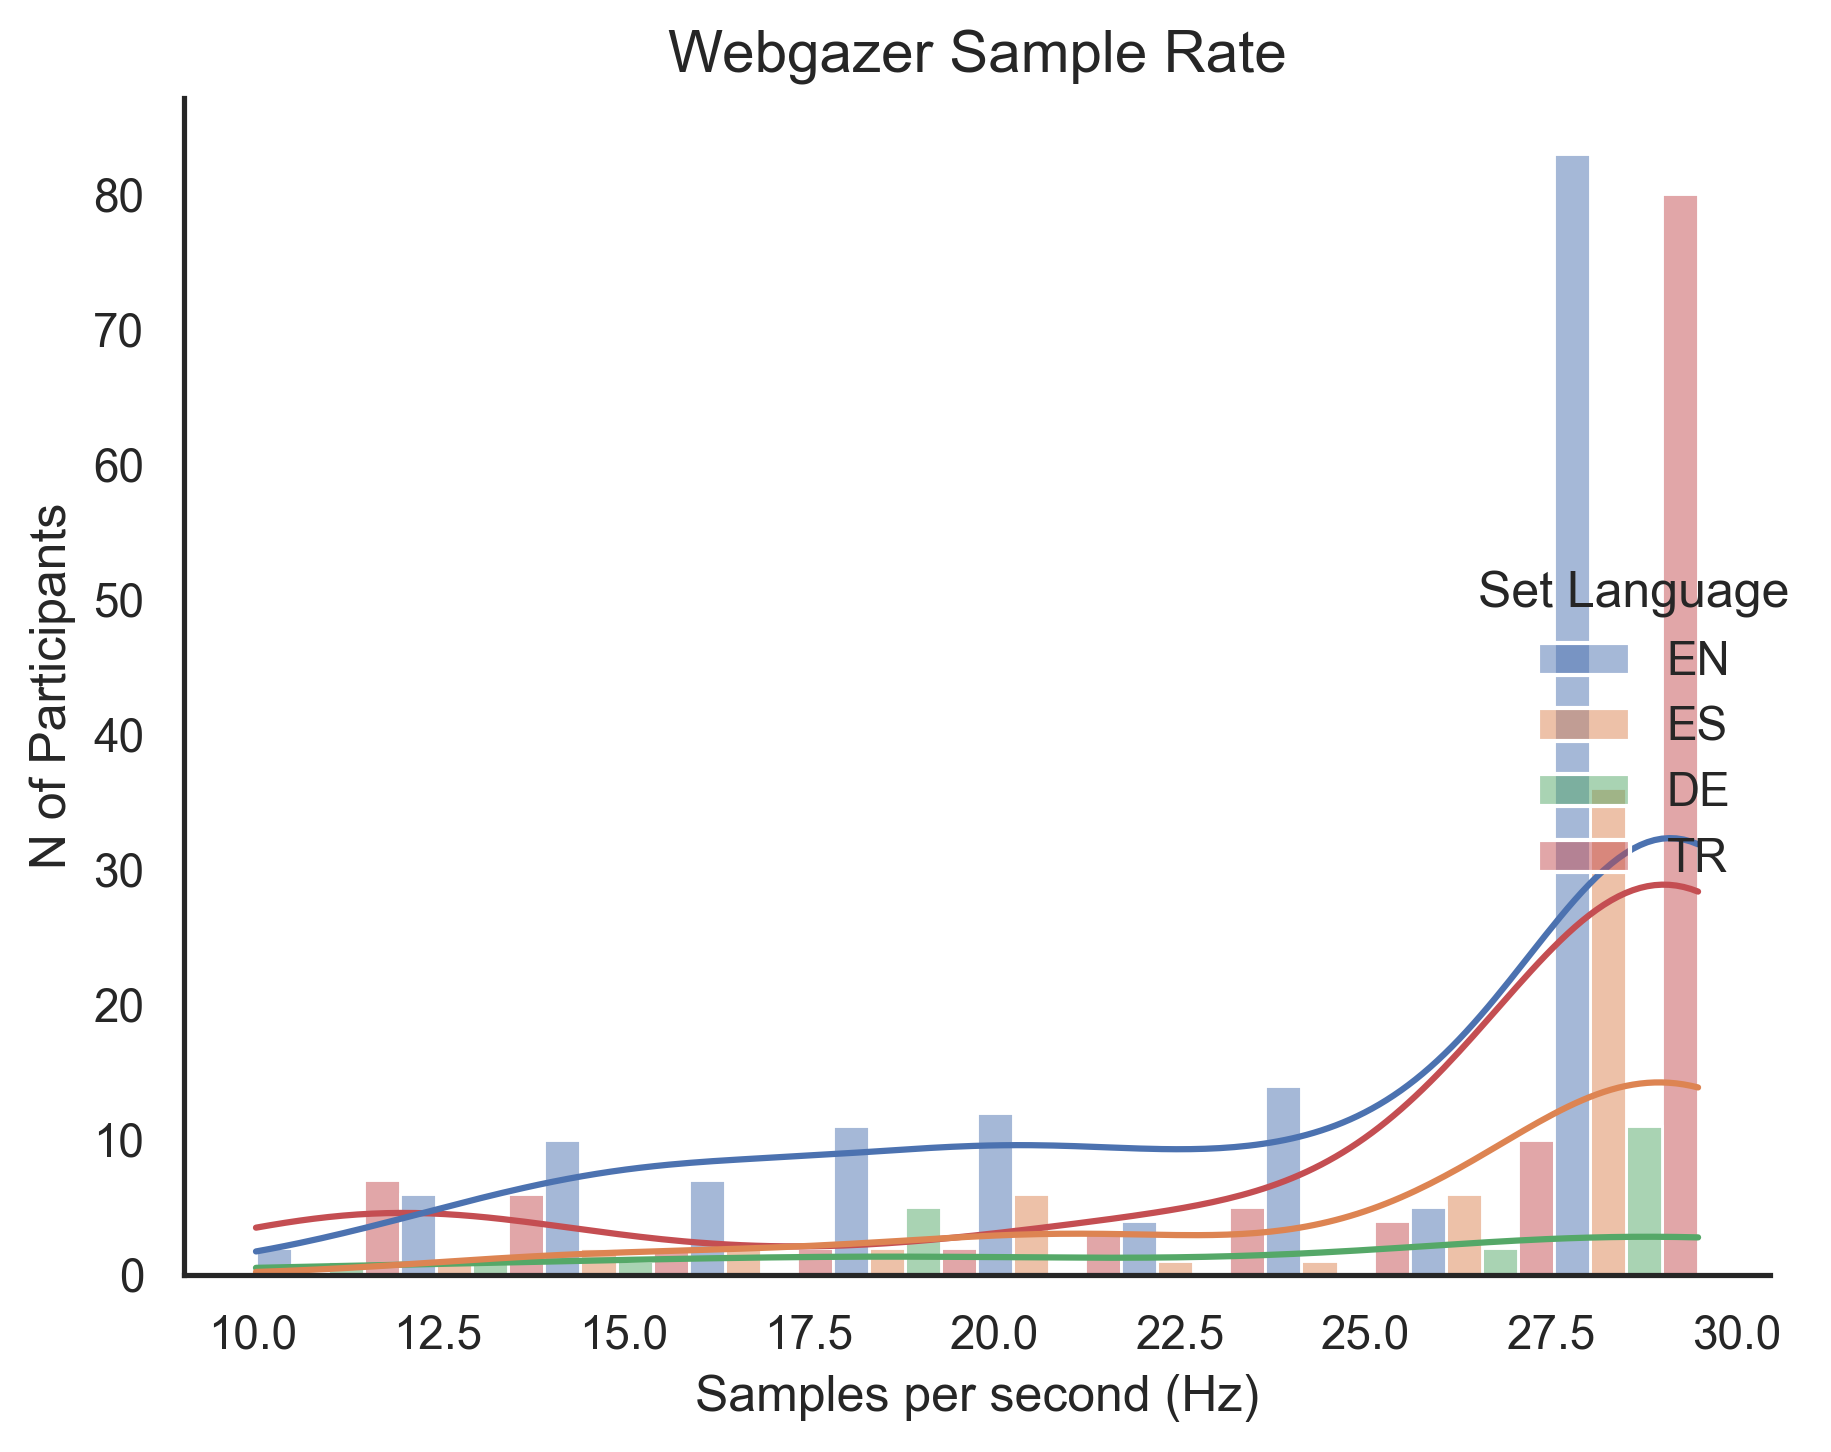

In [124]:
sns.displot(data=data_filtered, x="webgazer_sample_rate", multiple="dodge", hue="Set Language", kde=True)
plt.title("Webgazer Sample Rate", size=14)
plt.xlabel("Samples per second (Hz)")
plt.ylabel("N of Participants")
plt.tight_layout()

## Perform T-Tests:

In [125]:
from scipy.stats import ttest_ind, ttest_rel

In [126]:
# Filters to apply:
approved_only = (all_data.approved_flag > 0).to_numpy() 
no_fixation_error = (all_data.fixation_error == False).to_numpy()
no_target_error = (all_data.target_error == False).to_numpy()
sample_higher_10 = (all_data.webgazer_sample_rate > 10).to_numpy()
acc_higher = (all_data.avg_roi_last_val > 20).to_numpy()
filter_mturks = np.array([False if "link" in worker_id else True for worker_id in all_data["worker_id"]])
filter_sets = np.array([True if set_lang in ["TR"] else False for set_lang in all_data["set_language"]])
# Set a maximum time to 60 minutes
# "EN", "DE", "ES", "TR"
max_time_min = 60
filter_max_time = (all_data.exp_total_time < max_time_min/0.000016666).to_numpy()

screen_x_above_1280 = (all_data.screen_x > 1110).to_numpy() # Some tolerance
screen_y_above_720 = (all_data.screen_y > 615).to_numpy() # Some Tolerance
screen_above_1280_720 = screen_x_above_1280 & screen_y_above_720

In [ ]:
dict_filter = {
    #"filter_mturks" : filter_mturks,
    "filter_sets" : filter_sets,
    "Approved":approved_only,
    "Fix_Error, Target_Error": no_fixation_error & no_target_error,
    "Sample Rate": sample_higher_10,
    "acc_thresh": acc_higher,
    "screen_above_1280_720": screen_above_1280_720,
    f"Maximum time ({max_time_min} min)":filter_max_time
}

In [ ]:
n_total = len(all_data)
current_filter = np.ones(len(all_data),dtype=bool)
for condition, f in dict_filter.items():
    n_data_filtered = len(all_data.iloc[~f & current_filter])
    per_cent = n_data_filtered/n_total * 100
    print(f"For condition ({condition}), {per_cent:.2f}% has been filtered. ({n_data_filtered} out of {n_total})")
    current_filter = current_filter & f
    n_total = len(all_data.iloc[current_filter])

For condition (filter_sets), 62.81% has been filtered. (380 out of 605)
For condition (Approved), 32.00% has been filtered. (72 out of 225)
For condition (Fix_Error, Target_Error), 4.58% has been filtered. (7 out of 153)
For condition (Sample Rate), 14.38% has been filtered. (21 out of 146)
For condition (acc_thresh), 49.60% has been filtered. (62 out of 125)
For condition (screen_above_1280_720), 0.00% has been filtered. (0 out of 63)
For condition (Maximum time (60 min)), 1.59% has been filtered. (1 out of 63)


In [ ]:
all_data.shape

(605, 198)

In [ ]:
# Combine filters into a mask
mask = np.ones(all_data.shape[0], dtype=bool)
for filter_name, filter_mask in dict_filter.items():
    mask = mask & filter_mask

In [ ]:
# Pick all of those which were approved and had no fixation/target errors.
# mask = filter_mturks & approved_only & no_fixation_error & no_target_error & sample_higher_10 & screen_above_1280_720 & acc_higher & filter_sets
mask_sets_totals = filter_sets
data_filtered = all_data[mask].copy()

data_filtered = data_filtered.rename(columns={"set_language": "Set Language"})

In [ ]:
#for col in data_filtered.columns:
#    print(col)

In [ ]:
def perform_t_test_ind(data, column="fixation_on_target"):
    # Columns used: 
    # - target_to_fixation_ratio
    # - fixation_on_target
    # - fixation_total
    # - ratio_TRT
    # - fixation_target_TRT
    # - fixation_text_TRT
    # - time
    # question_{i}_target_to_fixation_ratio
    
    normal_reading_group1 = []
    normal_reading_group2 = []
    if_seeking_group1 = []
    if_seeking_group2 = []
    if column == "ratio_TRT":
        for i in range(10):
            group1 = data[(data[f"question_{i}_correct_flag"]==0) & (data[f"trial_{i}_fixation_text_TRT"]) > 0]
            group2 = data[(data[f"question_{i}_correct_flag"]==1) & (data[f"trial_{i}_fixation_text_TRT"]) > 0]
            if i < 5:
                normal_reading_group1.extend(group1[f"trial_{i}_fixation_target_TRT"]/group1[f"trial_{i}_fixation_text_TRT"])
                normal_reading_group2.extend(group2[f"trial_{i}_fixation_target_TRT"]/group2[f"trial_{i}_fixation_text_TRT"])
            else:
                if_seeking_group1.extend(group1[f"trial_{i}_fixation_target_TRT"]/group1[f"trial_{i}_fixation_text_TRT"])
                if_seeking_group2.extend(group2[f"trial_{i}_fixation_target_TRT"]/group2[f"trial_{i}_fixation_text_TRT"])
    else:
        for i in range(10):
            group1 = data[data[f"question_{i}_correct_flag"]==0]
            group2 = data[data[f"question_{i}_correct_flag"]==1]
            if i < 5:
                if column == "target_to_fixation_ratio":
                    normal_reading_group1.extend(group1[f"question_{i}_{column}"])
                    normal_reading_group2.extend(group2[f"question_{i}_{column}"])
                else:
                    normal_reading_group1.extend(group1[f"trial_{i}_{column}"])
                    normal_reading_group2.extend(group2[f"trial_{i}_{column}"])
            else:
                if column == "target_to_fixation_ratio":
                    if_seeking_group1.extend(group1[f"question_{i}_{column}"])
                    if_seeking_group2.extend(group2[f"question_{i}_{column}"])
                else:
                    if_seeking_group1.extend(group1[f"trial_{i}_{column}"])
                    if_seeking_group2.extend(group2[f"trial_{i}_{column}"])
    
    print("Results for: ", column)
    print("## NR: Wrong N: ", len(normal_reading_group1), "Correct N: ", len(normal_reading_group2), "Total: ", len(normal_reading_group2)+len(normal_reading_group1))
    print("## NR Average Wrong Group:", np.array(normal_reading_group1).mean()," | Average Correct Group: ", np.array(normal_reading_group2).mean())
    print("## IS: Wrong N: ", len(if_seeking_group1), "Correct N: ", len(if_seeking_group2), "Total: ", len(if_seeking_group2)+len(if_seeking_group1))
    print("## IS Average Wrong Group:", np.array(if_seeking_group1).mean()," | Average Correct Group: ", np.array(if_seeking_group2).mean())
    print()
    nr_t_stat, nr_t_p = ttest_ind(normal_reading_group1, normal_reading_group2)
    is_t_stat, is_t_p = ttest_ind(if_seeking_group1, if_seeking_group2)
    print(f"{column} T-Test, Normal Reading :: T-Stat:{nr_t_stat:.2f}, p-value:{nr_t_p:.2f} ({nr_t_p})")
    print(f"{column}, Information Seeking Reading :: T-Stat:{is_t_stat:.2f}, p-value:{is_t_p:.2f} ({is_t_p})")
    print("------")
    return nr_t_p, is_t_p

In [ ]:
def perform_t_test_paired(data, column="fixation_on_target"):
    # Columns used: 
    # - target_to_fixation_ratio
    # - fixation_on_target
    # - fixation_total
    # - ratio_TRT
    # - fixation_target_TRT
    # - fixation_text_TRT
    # - time
    # question_{i}_target_to_fixation_ratio
    
    normal_reading_group1 = []
    if_seeking_group2 = []
    if column == "ratio_TRT":
        #print("This test can't be performed due to some texts missing text_TRT")
        #return
        workers_with_no_text_TRT = set()
        for row_i, row in data.iterrows():
            for i in range(10):
                if row[f"trial_{i}_fixation_text_TRT"] == 0:
                    workers_with_no_text_TRT.add(row["worker_id"])
                    break
        filter = [False if worker_id in workers_with_no_text_TRT else True for worker_id in data.worker_id]
        data_with_text_trt = data[filter]
        for i in range(10):
            if i < 5:
                normal_reading_group1.extend(data_with_text_trt[f"trial_{i}_fixation_target_TRT"]/data_with_text_trt[f"trial_{i}_fixation_text_TRT"])
            else:
                if_seeking_group2.extend(data_with_text_trt[f"trial_{i}_fixation_target_TRT"]/data_with_text_trt[f"trial_{i}_fixation_text_TRT"])
    else:
        for i in range(10):
            if i < 5:
                if column == "target_to_fixation_ratio":
                    normal_reading_group1.extend(data[f"question_{i}_{column}"])
                else:
                    normal_reading_group1.extend(data[f"trial_{i}_{column}"])
            else:
                if column == "target_to_fixation_ratio":
                    if_seeking_group2.extend(data[f"question_{i}_{column}"])
                else:
                    if_seeking_group2.extend(data[f"trial_{i}_{column}"])
    
    print("Results for: ", column)
    t_stat, t_p  = ttest_rel(normal_reading_group1, if_seeking_group2)
    print("## NR N: ", len(normal_reading_group1), "IS N: ", len(if_seeking_group2), "Total: ", len(if_seeking_group2)+len(normal_reading_group1))
    print(f"{column} Paired T-Test Different Tasks: ", ttest_rel(normal_reading_group1, if_seeking_group2))
    print()
    return t_p

In [ ]:
tests_to_perform = ["fixation_on_target", "fixation_total", "target_to_fixation_ratio", "fixation_text_TRT","fixation_target_TRT","ratio_TRT","time"]

In [ ]:
for test in tests_to_perform:
    perform_t_test_paired(data_filtered, test)

Results for:  fixation_on_target
## NR N:  310 IS N:  310 Total:  620
fixation_on_target Paired T-Test Different Tasks:  Ttest_relResult(statistic=7.069130031574292, pvalue=1.0426612074643391e-11)

Results for:  fixation_total
## NR N:  310 IS N:  310 Total:  620
fixation_total Paired T-Test Different Tasks:  Ttest_relResult(statistic=9.390424969075617, pvalue=1.360431956756684e-18)

Results for:  target_to_fixation_ratio
## NR N:  310 IS N:  310 Total:  620
target_to_fixation_ratio Paired T-Test Different Tasks:  Ttest_relResult(statistic=4.310460826438923, pvalue=2.1930192724036394e-05)

Results for:  fixation_text_TRT
## NR N:  310 IS N:  310 Total:  620
fixation_text_TRT Paired T-Test Different Tasks:  Ttest_relResult(statistic=10.264285898067058, pvalue=1.838199746742449e-21)

Results for:  fixation_target_TRT
## NR N:  310 IS N:  310 Total:  620
fixation_target_TRT Paired T-Test Different Tasks:  Ttest_relResult(statistic=7.278371000752563, pvalue=2.811387555547656e-12)

Results 

In [ ]:
pd_t_tests_results = pd.DataFrame()
for test in tests_to_perform:
    results_series = pd.Series(dtype=float)
    nr_p_value, is_p_value = perform_t_test_ind(data_filtered, test)
    results_series["NR"] = nr_p_value
    results_series["IS"] = is_p_value
    pd_t_tests_results[test] = results_series

Results for:  fixation_on_target
## NR: Wrong N:  135 Correct N:  175 Total:  310
## NR Average Wrong Group: 21.88888888888889  | Average Correct Group:  14.697142857142858
## IS: Wrong N:  74 Correct N:  236 Total:  310
## IS Average Wrong Group: 7.27027027027027  | Average Correct Group:  4.22457627118644

fixation_on_target T-Test, Normal Reading :: T-Stat:1.99, p-value:0.05 (0.04732051420945499)
fixation_on_target, Information Seeking Reading :: T-Stat:2.24, p-value:0.03 (0.02612918202942223)
------
Results for:  fixation_total
## NR: Wrong N:  135 Correct N:  175 Total:  310
## NR Average Wrong Group: 287.2814814814815  | Average Correct Group:  305.88
## IS: Wrong N:  74 Correct N:  236 Total:  310
## IS Average Wrong Group: 207.64864864864865  | Average Correct Group:  116.04661016949153

fixation_total T-Test, Normal Reading :: T-Stat:-0.49, p-value:0.62 (0.6224730571987119)
fixation_total, Information Seeking Reading :: T-Stat:4.94, p-value:0.00 (1.2650994159230784e-06)
------

In [ ]:
for val in pd_t_tests_results.T.round(6)["NR"].values:
    print(f"{val:.3f}")

0.047
0.622
0.000
0.705
0.094
0.001
0.542


In [ ]:
for val in pd_t_tests_results.T.round(6)["IS"].values:
    print(f"{val:.3f}")

0.026
0.000
0.203
0.000
0.023
0.208
0.000


## Calculating Text statistics

Average Words per text, sent length. Using scipy.

**To do:** Implement the features for RU, GR, TR

In [ ]:
import os
os.listdir(os.path.join("experiment_data","set_texts"))

['text_settings_mturk_DE_v01.csv',
 'text_settings_mturk_DE_v02.csv',
 'text_settings_mturk_DE_v03.csv',
 'text_settings_mturk_DE_v04.csv',
 'text_settings_mturk_DE_v05.csv',
 'text_settings_mturk_EN_v01.csv',
 'text_settings_mturk_EN_v02.csv',
 'text_settings_mturk_EN_v03.csv',
 'text_settings_mturk_EN_v04.csv',
 'text_settings_mturk_EN_v05.csv',
 'text_settings_mturk_EN_v06.csv',
 'text_settings_mturk_EN_v07.csv',
 'text_settings_mturk_EN_v08.csv',
 'text_settings_mturk_EN_v09.csv',
 'text_settings_mturk_EN_v10.csv',
 'text_settings_mturk_EN_v11.csv',
 'text_settings_mturk_EN_v12.csv',
 'text_settings_mturk_EN_v13.csv',
 'text_settings_mturk_EN_v14.csv',
 'text_settings_mturk_EN_v15.csv',
 'text_settings_mturk_EN_v16.csv',
 'text_settings_mturk_EN_v17.csv',
 'text_settings_mturk_EN_v18.csv',
 'text_settings_mturk_EN_v19.csv',
 'text_settings_mturk_EN_v20.csv',
 'text_settings_mturk_ES_v01.csv',
 'text_settings_mturk_ES_v02.csv',
 'text_settings_mturk_ES_v03.csv',
 'text_settings_mtur

In [ ]:
text_settings_all = None

In [ ]:
for filename in os.listdir(os.path.join("experiment_data","set_texts")):
    set_pd = pd.read_csv(os.path.join("experiment_data","set_texts",filename))
    set_pd["set_name"] = filename.replace("text_settings_","").replace(".csv","")
    if text_settings_all is None:
        text_settings_all = set_pd
    else:
        text_settings_all = pd.concat([text_settings_all,set_pd])

In [ ]:
# Combine all the Texts:
text_settings_all_combined = text_settings_all.copy().reset_index(drop=True)

In [ ]:
text_settings_all_combined = text_settings_all_combined.drop("Unnamed: 0", axis=1)
text_settings_all_combined["stimulus"] = text_settings_all_combined["stimulus"].str.strip()
text_settings_all_combined.to_csv("combined_text_features.csv")

In [ ]:
# Create a copy to create the statistics:
text_settings_individual_texts = text_settings_all_combined.copy().drop_duplicates(subset=['trial_name','lang'])
text_settings_individual_texts = text_settings_individual_texts.reset_index(drop=True)

In [ ]:
from trtokenizer.tr_tokenizer import SentenceTokenizer, WordTokenizer

In [ ]:
SentTokenizerTR = SentenceTokenizer()
WordTokenizerTR = WordTokenizer()

In [ ]:
from spacy.lang.en import English
from spacy.lang.de import German
from spacy.lang.es import Spanish
from spacy.lang.ru import Russian
from spacy.lang.el import Greek


nlp_en = English()
nlp_de = German()
nlp_es = Spanish()
nlp_ru = Russian()
nlp_el = Greek()

nlp_en.add_pipe("sentencizer")
nlp_de.add_pipe("sentencizer")
nlp_es.add_pipe("sentencizer")
nlp_ru.add_pipe("sentencizer")
nlp_el.add_pipe("sentencizer")
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokenizer_en = nlp_en.tokenizer
tokenizer_de = nlp_de.tokenizer
tokenizer_es = nlp_es.tokenizer
tokenizer_ru = nlp_ru.tokenizer
tokenizer_el = nlp_el.tokenizer

In [ ]:
spacy_pipe_dictionary = {
    "EN": (nlp_en),
    "DE": (nlp_de),
    "ES": (nlp_es),
    "RU": (nlp_ru),
    "GR": (nlp_el),
    "TR": (SentTokenizerTR, WordTokenizerTR)
}

In [ ]:
all_data["set_language"].value_counts()

TR    225
EN    215
ES    107
DE     53
RU      4
GR      1
Name: set_language, dtype: int64

In [ ]:
def test_word_lenth_sum(stimulus, tokenizer):
    # Assumes that word counts have been calculated.
    avg_word_length_column = []
    words = tokenizer(stimulus)
    print(words)
    return sum([len(word) for word in words])

In [ ]:
test_word_lenth_sum("testing word sum. In this example.", tokenizer_en)

testing word sum. In this example.


29

In [ ]:
len(list(nlp_en("testing word sum. In this example.").sents))

2

In [ ]:
[len(word) for word in tokenizer_en("I am a worker.")]

[1, 2, 1, 6, 1]

In [ ]:
def calculate_word_counts(dataframe, language, tokenizer):
    return dataframe[dataframe['lang']==language].stimulus.apply(tokenizer).apply(len)

def calculate_word_lenth_sum(dataframe, language, tokenizer):
    # Assumes that word counts have been calculated.
    sum_word_length = []
    for row_i, row in dataframe[dataframe['lang']==language].iterrows():
        words = tokenizer(row["stimulus"])
        sum_word_length.append(sum([len(word) for word in words]))
    return pd.Series(sum_word_length)


In [ ]:
text_settings_individual_texts[text_settings_individual_texts["lang"] == "TR"].stimulus.iloc[0]

'Dünya Doğa ve Doğal Kaynakları Koruma Birliği doğanın korunması ve doğal kaynakların sürdürülebilir kullanımı alanında çalışan uluslararası bir kuruluştur. Veri toplama ve analiz, araştırma, saha projeleri, savunma ve eğitim alanlarında faaliyet göstermektedir. Misyonu dünyadaki toplumları doğayı korumak için etkilemek, teşvik etmek ve yardımcı olmak ve doğal kaynak kullanımının adil ve ekolojik olarak sürdürülebilir olmasını sağlamak tır. Geçtiğimiz on yıllar boyunca, organizasyon koruma ekolojisinin ötesinde odağını genişletti ve şimdi projelerinde sürdürülebilir kalkınma ile ilgili konuları içeriyor. Pek çok uluslararası çevre kuruluşlarının aksine, bu organizasyon halkı doğanın korunmasına destek olarak seferber etmeyi amaçlamamaktadır. Bunun yerine, organizasyon bilgi, tavsiye sağlayarak ve ortaklıklar kurarak hükümetlerin, iş dünyasının ve diğer paydaşların faaliyetlerini etkilemeye çalışır. Organizasyon geniş kitlelerce dünyadaki türlerin korunma durumunu  değerlendiren “Tehdit

In [ ]:
text_settings_individual_texts["char_count"] = text_settings_individual_texts.stimulus.str.len()
text_settings_individual_texts["token_count"] = 0

text_settings_individual_texts["stimulus"] = text_settings_individual_texts["stimulus"].str.strip()
for lang, pipeline in spacy_pipe_dictionary.items():
    if lang == "TR":
        text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_count"] = calculate_word_counts(text_settings_individual_texts, lang, pipeline[1].tokenize)
        text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_avg_length"] = calculate_word_lenth_sum(text_settings_individual_texts, lang, pipeline[1].tokenize).to_numpy()/text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_count"].values
    else:
        text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_count"] = calculate_word_counts(text_settings_individual_texts, lang, pipeline.tokenizer)
        text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_avg_length"] = calculate_word_lenth_sum(text_settings_individual_texts, lang, pipeline.tokenizer).to_numpy()/text_settings_individual_texts.loc[text_settings_individual_texts['lang']==lang,"token_count"].values

text_settings_individual_texts['sentence_count'] = -1
text_settings_individual_texts['original_dataset'] = ""

for i, row in text_settings_individual_texts.iterrows():
    text = row['stimulus']
    lang = row['lang']
    trial_name = row['trial_name']
    if lang == "TR":
        doc = spacy_pipe_dictionary[lang][0].tokenize(text)
        text_settings_individual_texts.loc[i,'sentence_count'] = len(doc)
    else:
        doc = spacy_pipe_dictionary[lang](text)
        text_settings_individual_texts.loc[i,'sentence_count'] = len(list(doc.sents))

    if "meco" in trial_name:
        text_settings_individual_texts.loc[i,'original_dataset'] = "MECO"
    else:
        text_settings_individual_texts.loc[i,'original_dataset'] = "XQuAD"
    
text_settings_individual_texts.loc[:,"average_token_per_sentence"] = text_settings_individual_texts["token_count"]/text_settings_individual_texts["sentence_count"]
text_settings_individual_texts.loc[:,"is_question"]  = text_settings_individual_texts.trial_name.str.contains("_qa_")

In [ ]:
text_settings_individual_texts.loc[text_settings_individual_texts.original_dataset=="MECO"][text_settings_individual_texts.lang=="EN"].trial_name.unique()

C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\43871827.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  text_settings_individual_texts.loc[text_settings_individual_texts.original_dataset=="MECO"][text_settings_individual_texts.lang=="EN"].trial_name.unique()


array(['meco_para_3', 'meco_para_3_qa_0', 'meco_para_11',
       'meco_para_11_qa_0', 'meco_para_7', 'meco_para_7_qa_1',
       'meco_para_7_qa_2', 'meco_para_11_qa_1', 'meco_para_12',
       'meco_para_12_qa_1', 'meco_para_3_qa_3', 'meco_para_11_qa_3',
       'meco_para_12_qa_0', 'meco_para_12_qa_2', 'meco_para_3_qa_1',
       'meco_para_11_qa_2'], dtype=object)

In [ ]:
text_settings_individual_texts.columns

Index(['stimulus', 'trial_name', 'task_type', 'correct_answer', 'lang',
       'set_name', 'char_count', 'token_count', 'token_avg_length',
       'sentence_count', 'original_dataset', 'average_token_per_sentence',
       'is_question'],
      dtype='object')

In [ ]:
text_settings_individual_texts.iloc[0].stimulus

'Ein Fahrzeugkennzeichen ist ein Metall- oder Kunststoffschild, das zur amtlichen Identifizierung an einem Fahrzeug angebracht ist. In allen Ländern sind solche Kennzeichen für Straßenfahrzeuge wie Autos, Lastwagen und Motorräder erforderlich. Ob sie für andere Fahrzeuge wie Fahrräder, Boote oder Traktoren erforderlich sind, kann je nach Rechtssprechung variieren. Die Registrierungskennung besteht aus einer Reihe von Buchstaben und Ziffern, die den Fahrzeughalter eindeutig im Fahrzeugregister der ausstellenden Behörde identifiziert. In einigen Ländern ist die Kennung innerhalb des gesamten Landes einzigartig, während sie dies in anderen Ländern nur innerhalb eines Staates oder einer Provinz ist. Frankreich war das erste Land, das Ende des 19. Jahrhunderts das Kennzeichen einführte. Die Kennzeichen des frühen zwanzigsten Jahrhunderts variierten in Größe und Form je nach regionaler Rechtssprechung, so dass bei einem Umzug zusätzliche Löcher in das Auto gebohrt werden mussten, um das neue

In [ ]:
text_settings_individual_texts.iloc[0]

stimulus                      Ein Fahrzeugkennzeichen ist ein Metall- oder K...
trial_name                                                         meco_para_12
task_type                                                                    NR
correct_answer                                                              NaN
lang                                                                         DE
set_name                                                           mturk_DE_v01
char_count                                                                 1199
token_count                                                                 178
token_avg_length                                                       5.842697
sentence_count                                                                8
original_dataset                                                           MECO
average_token_per_sentence                                                22.25
is_question                             

In [ ]:
text_settings_individual_texts.iloc[39].stimulus

'In der alten römischen Religion und Mythologie ist Janus der Gott des Anfangs und der Tore. Er hat eine doppelte Natur und wird gewöhnlich mit zwei Gesichtern dargestellt, da er in die Zukunft und in die Vergangenheit blickt. Janus überwachte den Beginn und das Ende von Konflikten und damit auch Krieg und Frieden. Die Türen seines Tempels waren in Kriegszeiten geöffnet und geschlossen in Zeiten des Friedens. Als Gott der Tore wurde er außerdem mit dem Betreten und Verlassen von Haustüren in Verbindung gebracht. Janus symbolisierte häufig Veränderungen und Übergänge, wie den Wechsel von einer Bedingung zur anderen, von einer Perspektive zur anderen und das Heranwachsen junger Menschen zum Erwachsenenalter. Deswegen wurde Janus zu Beginn der Saat-und Erntezeit verehrt, genauso wie zu Hochzeiten, Todesfällen und anderen Übergänge. Für Janus war kein spezieller Priester zuständig, sondern der höchste Priester leitete die Zeremonien selbst. Janus stellte den Mittelweg zwischen Barbarei und

In [ ]:
text_settings_individual_texts.iloc[39]

stimulus                      In der alten römischen Religion und Mythologie...
trial_name                                                          meco_para_1
task_type                                                                    NR
correct_answer                                                              NaN
lang                                                                         DE
set_name                                                           mturk_DE_v03
char_count                                                                 1171
token_count                                                                 192
token_avg_length                                                       5.203125
sentence_count                                                               10
original_dataset                                                           MECO
average_token_per_sentence                                                 19.2
is_question                             

In [ ]:
text_settings_individual_texts[((text_settings_individual_texts["set_name"] == "mturk_DE_v01") | 
                               (text_settings_individual_texts["set_name"] == "mturk_DE_v02") |
                               (text_settings_individual_texts["set_name"] == "mturk_DE_v03")) &
                               (~text_settings_individual_texts.is_question)].groupby("original_dataset")["average_token_per_sentence"].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
original_dataset,,,,,,,,
MECO,2.0,20.7,2.2,19.2,20.0,20.7,21.5,22.2
XQuAD,27.0,26.5,10.7,15.5,20.8,25.0,30.3,65.0


In [ ]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"]).mean().round(2)

C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\3281275948.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"]).mean().round(2)


char_count  token_count  token_avg_length  \
lang original_dataset                                              
DE   MECO                 1185.00       185.00              5.52   
     XQuAD                 508.87        82.04              5.37   
EN   MECO                 1191.25       203.50              4.98   
     XQuAD                 528.29        97.18              4.60   
ES   MECO                 1092.00       195.00              4.70   
     XQuAD                 541.58        98.66              4.60   
GR   MECO                 1253.00       206.00              5.21   
     XQuAD                 595.44        99.33              5.13   
RU   MECO                 1228.00       180.00              5.96   
     XQuAD                 534.11        85.89              5.47   
TR   MECO                 1206.00       155.00              6.84   
     XQuAD                 545.36        77.19              6.15   

                       sentence_count  average_token_per_sentence  is_question  
lang original_dataset                                                           
DE   MECO                        9.00                       20.72          0.0  
     XQuAD                       3.22                       29.10          0.0  
EN   MECO                        8.25                       24.70          0.0  
     XQuAD                       3.43                       32.61          0.0  
ES   MECO                        8.00                       24.38          0.0  
     XQuAD                       3.19                       34.47          0.0  
GR   MECO                        8.00                       25.75          0.0  
     XQuAD                       3.22                       33.75          0.0  
RU   MECO                        8.00                       22.50          0.0  
     XQuAD                       3.44                       27.14          0.0  
TR   MECO                        8.00                       19.38          0.0  
     XQuAD                       3.86                       21.69          0.0

In [ ]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"]).mean().round(2)

C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\3281275948.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"]).mean().round(2)


char_count  token_count  token_avg_length  \
lang original_dataset                                              
DE   MECO                 1185.00       185.00              5.52   
     XQuAD                 508.87        82.04              5.37   
EN   MECO                 1191.25       203.50              4.98   
     XQuAD                 528.29        97.18              4.60   
ES   MECO                 1092.00       195.00              4.70   
     XQuAD                 541.58        98.66              4.60   
GR   MECO                 1253.00       206.00              5.21   
     XQuAD                 595.44        99.33              5.13   
RU   MECO                 1228.00       180.00              5.96   
     XQuAD                 534.11        85.89              5.47   
TR   MECO                 1206.00       155.00              6.84   
     XQuAD                 545.36        77.19              6.15   

                       sentence_count  average_token_per_sentence  is_question  
lang original_dataset                                                           
DE   MECO                        9.00                       20.72          0.0  
     XQuAD                       3.22                       29.10          0.0  
EN   MECO                        8.25                       24.70          0.0  
     XQuAD                       3.43                       32.61          0.0  
ES   MECO                        8.00                       24.38          0.0  
     XQuAD                       3.19                       34.47          0.0  
GR   MECO                        8.00                       25.75          0.0  
     XQuAD                       3.22                       33.75          0.0  
RU   MECO                        8.00                       22.50          0.0  
     XQuAD                       3.44                       27.14          0.0  
TR   MECO                        8.00                       19.38          0.0  
     XQuAD                       3.86                       21.69          0.0

In [ ]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"])[["token_count"]].describe().round(1)

token_count                                           \
                            count   mean   std    min    25%    50%    75%   
lang original_dataset                                                        
DE   MECO                     2.0  185.0   9.9  178.0  181.5  185.0  188.5   
     XQuAD                   45.0   82.0  22.8   26.0   75.0   88.0   96.0   
EN   MECO                     4.0  203.5  15.3  184.0  195.2  206.0  214.2   
     XQuAD                   97.0   97.2  20.8   31.0   90.0  103.0  109.0   
ES   MECO                     1.0  195.0   NaN  195.0  195.0  195.0  195.0   
     XQuAD                   64.0   98.7  22.3   35.0   92.8  104.0  112.2   
GR   MECO                     1.0  206.0   NaN  206.0  206.0  206.0  206.0   
     XQuAD                    9.0   99.3   7.7   84.0   96.0  101.0  104.0   
RU   MECO                     1.0  180.0   NaN  180.0  180.0  180.0  180.0   
     XQuAD                    9.0   85.9  21.2   36.0   83.0   87.0   98.0   
TR   MECO                     2.0  155.0   5.7  151.0  153.0  155.0  157.0   
     XQuAD                   36.0   77.2  11.5   49.0   69.8   76.5   84.0   

                              
                         max  
lang original_dataset         
DE   MECO              192.0  
     XQuAD             115.0  
EN   MECO              218.0  
     XQuAD             130.0  
ES   MECO              195.0  
     XQuAD             131.0  
GR   MECO              206.0  
     XQuAD             109.0  
RU   MECO              180.0  
     XQuAD             108.0  
TR   MECO              159.0  
     XQuAD             105.0

In [ ]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby("lang")[["token_avg_length"]].describe()

token_avg_length                                                    \
                count      mean       std       min       25%       50%   
lang                                                                      
DE               47.0  5.379870  0.535549  4.078261  5.156131  5.322917   
EN              101.0  4.614354  0.453399  3.625000  4.333333  4.600000   
ES               65.0  4.602825  0.440748  3.702703  4.252427  4.581395   
GR               10.0  5.138161  0.373537  4.637255  4.805355  5.116697   
RU               10.0  5.520780  0.471258  4.833333  5.071492  5.683333   
TR               38.0  6.186442  0.589714  5.000000  5.841053  6.174725   

                          
           75%       max  
lang                      
DE    5.709413  6.615385  
EN    4.916667  5.926316  
ES    4.891304  5.677083  
GR    5.438474  5.714286  
RU    5.848878  6.059524  
TR    6.526786  7.250000

In [ ]:
text_settings_individual_texts[~text_settings_individual_texts.is_question].groupby(['lang',"original_dataset"])[["average_token_per_sentence"]].describe().round(3)

average_token_per_sentence                          \
                                           count    mean     std     min   
lang original_dataset                                                      
DE   MECO                                    2.0  20.725   2.157  19.200   
     XQuAD                                  45.0  29.105  15.588  15.500   
EN   MECO                                    4.0  24.698   1.870  23.000   
     XQuAD                                  97.0  32.605  16.233  12.444   
ES   MECO                                    1.0  24.375     NaN  24.375   
     XQuAD                                  64.0  34.469  15.349  17.500   
GR   MECO                                    1.0  25.750     NaN  25.750   
     XQuAD                                   9.0  33.748  11.871  20.400   
RU   MECO                                    1.0  22.500     NaN  22.500   
     XQuAD                                   9.0  27.139  11.691  15.000   
TR   MECO                                    2.0  19.375   0.707  18.875   
     XQuAD                                  36.0  21.694   6.370  11.000   

                                                        
                          25%     50%     75%      max  
lang original_dataset                                   
DE   MECO              19.962  20.725  21.488   22.250  
     XQuAD             22.000  25.250  31.000  109.000  
EN   MECO              23.500  24.271  25.469   27.250  
     XQuAD             23.667  28.250  35.333  110.000  
ES   MECO              24.375  24.375  24.375   24.375  
     XQuAD             26.000  29.417  36.000  113.000  
GR   MECO              25.750  25.750  25.750   25.750  
     XQuAD             26.000  32.000  35.667   54.500  
RU   MECO              22.500  22.500  22.500   22.500  
     XQuAD             21.000  24.500  27.667   54.000  
TR   MECO              19.125  19.375  19.625   19.875  
     XQuAD             16.833  21.000  24.750   40.000

In [ ]:
text_settings_individual_texts.to_csv("text_token_stats.csv")

In [ ]:
filter_sets_in_use = np.array([True if set_name in data_filtered.set_name.unique() else False for set_name in text_settings_individual_texts["set_name"]])

In [ ]:
filter_stats = text_settings_individual_texts[filter_sets_in_use]

In [ ]:
filter_stats[~filter_stats.is_question].groupby(['lang',"original_dataset"])[["token_count"]].describe().round(1)

token_count                                           \
                            count   mean   std    min    25%    50%    75%   
lang original_dataset                                                        
DE   MECO                     2.0  185.0   9.9  178.0  181.5  185.0  188.5   
     XQuAD                   45.0   82.0  22.8   26.0   75.0   88.0   96.0   
EN   MECO                     4.0  203.5  15.3  184.0  195.2  206.0  214.2   
     XQuAD                   97.0   97.2  20.8   31.0   90.0  103.0  109.0   
ES   MECO                     1.0  195.0   NaN  195.0  195.0  195.0  195.0   
     XQuAD                   64.0   98.7  22.3   35.0   92.8  104.0  112.2   
TR   MECO                     2.0  155.0   5.7  151.0  153.0  155.0  157.0   
     XQuAD                   27.0   77.7  10.5   49.0   71.0   77.0   85.0   

                              
                         max  
lang original_dataset         
DE   MECO              192.0  
     XQuAD             115.0  
EN   MECO              218.0  
     XQuAD             130.0  
ES   MECO              195.0  
     XQuAD             131.0  
TR   MECO              159.0  
     XQuAD              95.0

In [ ]:
filter_stats[~filter_stats.is_question].groupby(['lang',"original_dataset"])[["average_token_per_sentence"]].describe().round(2)

average_token_per_sentence                              \
                                           count   mean    std    min    25%   
lang original_dataset                                                          
DE   MECO                                    2.0  20.72   2.16  19.20  19.96   
     XQuAD                                  45.0  29.10  15.59  15.50  22.00   
EN   MECO                                    4.0  24.70   1.87  23.00  23.50   
     XQuAD                                  97.0  32.61  16.23  12.44  23.67   
ES   MECO                                    1.0  24.38    NaN  24.38  24.38   
     XQuAD                                  64.0  34.47  15.35  17.50  26.00   
TR   MECO                                    2.0  19.38   0.71  18.88  19.12   
     XQuAD                                  27.0  22.02   6.95  11.00  16.67   

                                             
                         50%    75%     max  
lang original_dataset                        
DE   MECO              20.72  21.49   22.25  
     XQuAD             25.25  31.00  109.00  
EN   MECO              24.27  25.47   27.25  
     XQuAD             28.25  35.33  110.00  
ES   MECO              24.38  24.38   24.38  
     XQuAD             29.42  36.00  113.00  
TR   MECO              19.38  19.62   19.88  
     XQuAD             21.50  24.83   40.00

## Compare Fixation in Span for NR and IS conditions

In [ ]:
combined_text_features = pd.read_csv("combined_text_features.csv", index_col=0)

In [ ]:
def get_question_answer_pair(df_combined_text_data, set_name):
    trial_names = df_combined_text_data[df_combined_text_data["set_name"]==set_name].trial_name.to_list()
    question_answer_pair = [(trial_names[i], trial_names[i+1]) for i in range(0, len(trial_names)-1, 2)]
    assert len(question_answer_pair) == 10
    for text, target in question_answer_pair:
        assert text in target
    return question_answer_pair

In [ ]:
# Test that all data is loaded correctly.
for set_name in text_settings_all.set_name.unique():
    test = get_question_answer_pair(text_settings_all, set_name)

In [ ]:
question_answer_pair = get_question_answer_pair(combined_text_features, "mturk_EN_v08")

In [ ]:
question_answer_pair

[('meco_para_3', 'meco_para_3_qa_3'),
 ('a_Warsaw_2', 'a_Warsaw_2_qa_2'),
 ('a_SkyUnitedKingdom_1', 'a_SkyUnitedKingdom_1_qa_0'),
 ('a_Warsaw_1', 'a_Warsaw_1_qa_3'),
 ('a_Ctenophora_2', 'a_Ctenophora_2_qa_2'),
 ('a_Chloroplast_3', 'q_after_a_Chloroplast_3_qa_3'),
 ('a_Computationalcomplexitytheory_0',
  'q_after_a_Computationalcomplexitytheory_0_qa_0'),
 ('a_Construction_2', 'q_after_a_Construction_2_qa_3'),
 ('a_Yuandynasty_4', 'q_after_a_Yuandynasty_4_qa_3'),
 ('a_Packetswitching_2', 'q_after_a_Packetswitching_2_qa_2')]

In [ ]:
test_1 = pd.read_csv(os.path.join("pre_processed_data","fixation_data_per_part","A17Q4QN6UE0EZC_mturk_EN_v08_fix_dict.csv"))
test_1

,word_id,TRT,FixCount,scanPath,Span_word_is_in,text_id
0,In_0,238.0,3,"[3, 6, 7]",meco_para_3_qa_1,meco_para_3
1,competitive_0,NaN,0,[],meco_para_3_qa_1,meco_para_3
2,"sports,_0",NaN,0,[],meco_para_3_qa_1,meco_para_3
3,doping_0,NaN,0,[],meco_para_3_qa_1,meco_para_3
4,is_0,NaN,0,[],meco_para_3_qa_1,meco_para_3
...,...,...,...,...,...,...
999,"DEC,_1",NaN,0,[],a_Packetswitching_2_qa_3,a_Packetswitching_2
1000,including_0,NaN,0,[],a_Packetswitching_2_qa_3,a_Packetswitching_2
1001,one_1,NaN,0,[],a_Packetswitching_2_qa_3,a_Packetswitching_2
1002,for_0,NaN,0,[],a_Packetswitching_2_qa_3,a_Packetswitching_2


In [ ]:
'meco_para_11' in test_1["text_id"].unique()

False

In [ ]:
def calculate_mean_trt_in_out_target(question_pair_dict, participant_fix_csv):
    """
        For each question pair (text, question_in_text) we find the TRT for a participant
        on the target_span and outside. 
        
        NOTE: "Outside Span" only includes fixations that are on words outside of the target span.
        This means any fixations outside the text will not be considered.

        The method loads an exported CSV with the TRTs and FixCounts for each word.
        The "Span_word_is_in" contains a string which will have the spans seperated by " " spaces.
        We can use this to check if the Span is included in this string.

        returns: df, nr_averages, is_averages
            - df: Dataframe["Task", "TRT", "Span", "TargetID", "TextID] containing the nanmean averages
            for each of the conditions. This can then be grouped by task to calculate the overall mean.
            - nr_averages: list(tuple(mean_in_target_TRT, mean_out_target_TRT)) for normal reading task
            - nr_averages: list(tuple(mean_in_target_TRT, mean_out_target_TRT)) for information seeking task
    """
    dataframe_to_plot = pd.DataFrame(columns=["Task", "TRT", "Span", "TargetID", "TextID"])
    nr_averages = []
    is_averages = []
    for i, (text, passage) in enumerate(question_pair_dict):
        assert text in participant_fix_csv["text_id"].unique(), "Text is not present for this participant. Check you are using the correct question_pair dictionary."
        in_span_TRT = []
        out_span_TRT = []
        passage = passage.replace("q_after_","")
        for ir, row in participant_fix_csv[participant_fix_csv.text_id == text].iterrows():
            if type(row["Span_word_is_in"]) is str:
                if passage in row["Span_word_is_in"]:
                    in_span_TRT.append(row["TRT"])
            else:
                out_span_TRT.append(row["TRT"])
        in_span_mean = np.nanmean(np.array(in_span_TRT))
        out_span_mean = np.nanmean(np.array(out_span_TRT))
        if i < 5:
            data_in = {'Task': ["NR"], 'TRT': [in_span_mean], "Span": ["In Target"], "TargetID":[passage], "TextID":[text]}
            data_out = {'Task': ["NR"], 'TRT': [out_span_mean], "Span": ["Outside Target"], "TargetID":[passage], "TextID":[text]}
            dataframe_to_plot = pd.concat((dataframe_to_plot, pd.DataFrame(data_in)))
            dataframe_to_plot = pd.concat((dataframe_to_plot, pd.DataFrame(data_out)))
            nr_averages.append((in_span_mean, out_span_mean))
        else:
            data_in = {'Task': ["IS"], 'TRT': [in_span_mean], "Span": ["In Target"], "TargetID":[passage], "TextID":[text]}
            data_out = {'Task': ["IS"], 'TRT': [out_span_mean], "Span": ["Outside Target"], "TargetID":[passage], "TextID":[text]}
            dataframe_to_plot = pd.concat((dataframe_to_plot, pd.DataFrame(data_in)))
            dataframe_to_plot = pd.concat((dataframe_to_plot, pd.DataFrame(data_out)))
            is_averages.append((in_span_mean, out_span_mean))
    return dataframe_to_plot, nr_averages, is_averages


In [ ]:
dataframe_to_plot, nr_averages, is_averages = calculate_mean_trt_in_out_target(question_answer_pair, test_1)

C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:34: RuntimeWarning: Mean of empty slice
  out_span_mean = np.nanmean(np.array(out_span_TRT))


In [ ]:
dataframe_to_plot

,Task,TRT,Span,TargetID,TextID
0,NR,135.000000,In Target,meco_para_3_qa_3,meco_para_3
0,NR,254.156863,Outside Target,meco_para_3_qa_3,meco_para_3
0,NR,68.000000,In Target,a_Warsaw_2_qa_2,a_Warsaw_2
0,NR,139.576923,Outside Target,a_Warsaw_2_qa_2,a_Warsaw_2
0,NR,NaN,In Target,a_SkyUnitedKingdom_1_qa_0,a_SkyUnitedKingdom_1
0,NR,131.294118,Outside Target,a_SkyUnitedKingdom_1_qa_0,a_SkyUnitedKingdom_1
0,NR,443.000000,In Target,a_Warsaw_1_qa_3,a_Warsaw_1
0,NR,154.192308,Outside Target,a_Warsaw_1_qa_3,a_Warsaw_1
0,NR,NaN,In Target,a_Ctenophora_2_qa_2,a_Ctenophora_2
0,NR,134.434783,Outside Target,a_Ctenophora_2_qa_2,a_Ctenophora_2


In [ ]:
dataframe_to_plot.groupby(["Task","Span"]).mean()

C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\347507720.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_to_plot.groupby(["Task","Span"]).mean()


TRT
Task Span                      
IS   In Target       165.926923
     Outside Target   89.344925
NR   In Target       215.333333
     Outside Target  162.730999

c:\Anaconda3\envs\jsPsychDev\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Anaconda3\envs\jsPsychDev\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot: xlabel='Task', ylabel='TRT'>

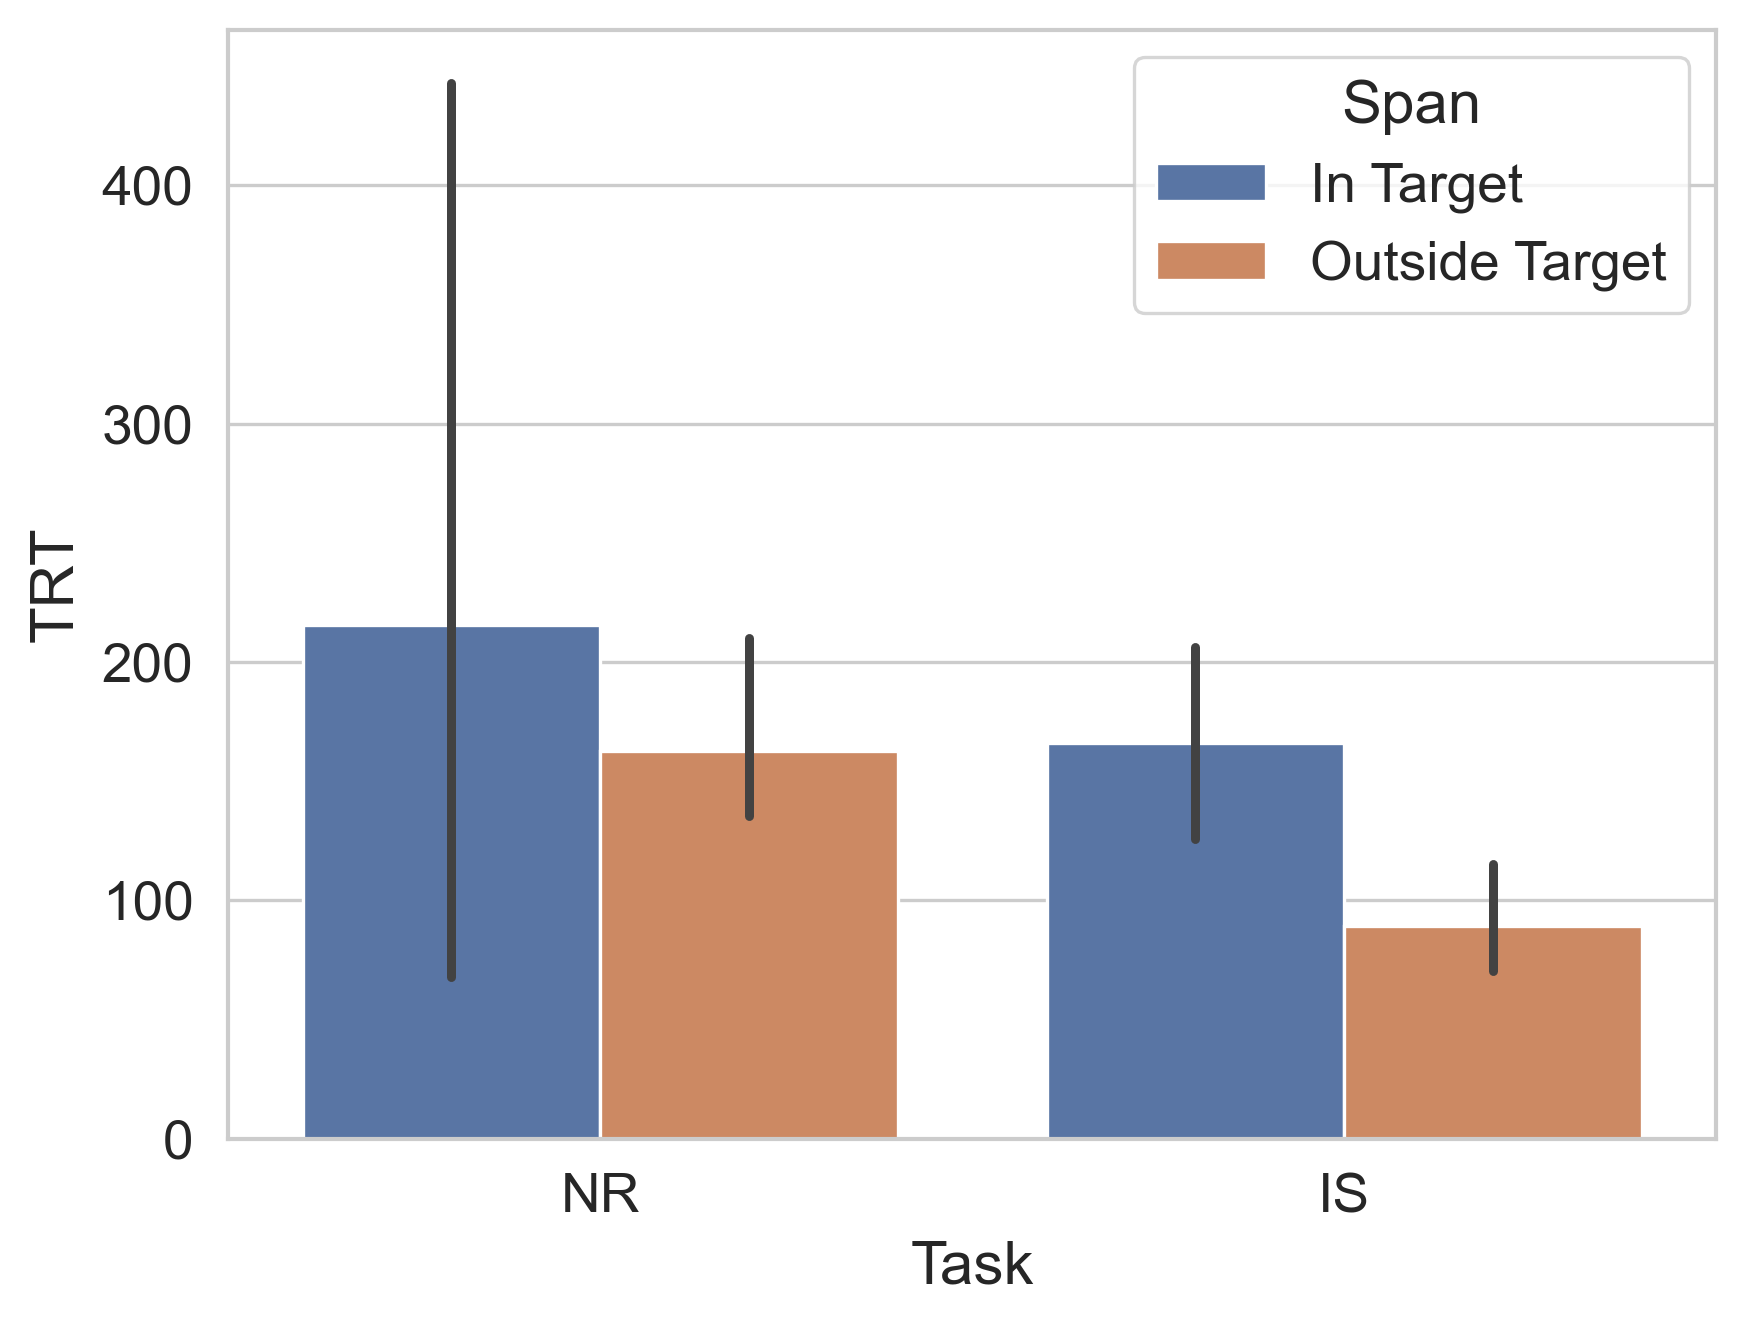

In [ ]:
sns.barplot(data=dataframe_to_plot, x="Task", y="TRT", hue="Span")

## Generate in/out Span for all the participants in the filtered data:

In [ ]:
# Filters to apply:
approved_only = (all_data.approved_flag > 0).to_numpy() 
no_fixation_error = (all_data.fixation_error == False).to_numpy()
no_target_error = (all_data.target_error == False).to_numpy()
sample_higher_10 = (all_data.webgazer_sample_rate > 10).to_numpy()
acc_higher = (all_data.avg_roi_last_val > 0).to_numpy()
filter_mturks = np.array([False if "link" in worker_id else True for worker_id in all_data["worker_id"]])
filter_sets = np.array([True if set_lang in ["EN","ES","DE", "TR"] else False for set_lang in all_data["set_language"]])
# Set a maximum time to 60 minutes
max_time_min = 60
filter_max_time = (all_data.exp_total_time < max_time_min/0.000016666).to_numpy()

screen_x_above_1280 = (all_data.screen_x > 1110).to_numpy() # Some tolerance
screen_y_above_720 = (all_data.screen_y > 615).to_numpy() # Some Tolerance
screen_above_1280_720 = screen_x_above_1280 & screen_y_above_720

In [ ]:
dict_filter = {
    #"filter_mturks" : filter_mturks,
    "Approved":approved_only,
    "Fix_Error, Target_Error": no_fixation_error & no_target_error,
    "Sample Rate": sample_higher_10,
    "acc_thresh": acc_higher,
    "screen_above_1280_720": screen_above_1280_720,
    "filter_sets" : filter_sets,
    f"Maximum time ({max_time_min} min)":filter_max_time
}

In [ ]:
# Combine filters into a mask
mask = np.ones(all_data.shape[0], dtype=bool)
for filter_name, filter_mask in dict_filter.items():
    mask = mask & filter_mask

In [ ]:
data_filtered = all_data[mask].copy()
data_filtered.shape
data_filtered = data_filtered.rename(columns={"set_language": "Set Language"})

In [ ]:
data_filtered.shape

(353, 198)

In [ ]:
combined_fix_dataframe = pd.DataFrame(columns=['Task', 'TRT', 'Span', 'TargetID', 'TextID', "SetName", "WorkerID"])
for row_i, row in data_filtered.iterrows():
    set_name = row["set_name"]
    set_name_qa_pairs = "_".join(row["set_name"].split("_")[:3])
    question_text_pair = get_question_answer_pair(combined_text_features, set_name_qa_pairs)
    participant_fix_dict = pd.read_csv(os.path.join("pre_processed_data","fixation_data_per_part",f"{row.worker_id}_{set_name}_fix_dict.csv"), index_col=0)
    dataframe_to_plot, _, _ = calculate_mean_trt_in_out_target(question_text_pair, participant_fix_dict)
    dataframe_to_plot["SetName"] = set_name
    dataframe_to_plot["WorkerID"] = row.worker_id
    combined_fix_dataframe = pd.concat((combined_fix_dataframe,dataframe_to_plot))

C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: Ru

C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: RuntimeWarning: Mean of empty slice
  in_span_mean = np.nanmean(np.array(in_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:34: RuntimeWarning: Mean of empty slice
  out_span_mean = np.nanmean(np.array(out_span_TRT))
C:\Users\tyagu\AppData\Local\Temp\ipykernel_16884\1685809385.py:33: 

In [ ]:
combined_fix_dataframe.groupby(["Task", "Span"]).describe()

TRT                                             \
                      count        mean          std   min         25%   
Task Span                                                                
IS   In Target       1148.0  284.597154   727.086422  50.0   89.166667   
     Outside Target  1699.0  503.256880  4025.760466  50.5  105.562500   
NR   In Target       1375.0  370.127395   849.201557  50.0  136.525000   
     Outside Target  1742.0  742.647590  4725.502786  50.0  181.165476   

                                                       
                            50%         75%       max  
Task Span                                              
IS   In Target       170.416667  321.125000   22840.0  
     Outside Target  155.529412  244.312281  123145.0  
NR   In Target       238.000000  412.000000   28349.0  
     Outside Target  265.658654  388.380556   87772.0

In [ ]:
combined_fix_dataframe.groupby(["Task", "Span"]).describe()

TRT                                             \
                      count        mean          std   min         25%   
Task Span                                                                
IS   In Target       1148.0  284.597154   727.086422  50.0   89.166667   
     Outside Target  1699.0  503.256880  4025.760466  50.5  105.562500   
NR   In Target       1375.0  370.127395   849.201557  50.0  136.525000   
     Outside Target  1742.0  742.647590  4725.502786  50.0  181.165476   

                                                       
                            50%         75%       max  
Task Span                                              
IS   In Target       170.416667  321.125000   22840.0  
     Outside Target  155.529412  244.312281  123145.0  
NR   In Target       238.000000  412.000000   28349.0  
     Outside Target  265.658654  388.380556   87772.0

In [ ]:
dataframe_to_plot = combined_fix_dataframe.rename(columns={"TRT":"Average Word TRT"})

In [ ]:
dataframe_to_plot.loc[dataframe_to_plot["Average Word TRT"] > dataframe_to_plot["Average Word TRT"].quantile(.99), "Average Word TRT"] = np.nan

In [ ]:
dataframe_to_plot.groupby(["Task", "Span"]).describe()

Average Word TRT                                \
                               count        mean         std   min   
Task Span                                                            
IS   In Target                1145.0  260.881688  274.264392  50.0   
     Outside Target           1677.0  196.699141  143.176519  50.5   
NR   In Target                1363.0  327.745263  296.686116  50.0   
     Outside Target           1719.0  312.715049  211.296439  50.0   

                                                                      
                            25%         50%         75%          max  
Task Span                                                             
IS   In Target        89.000000  170.250000  317.666667  2015.000000  
     Outside Target  105.083333  154.000000  239.125000  1658.530612  
NR   In Target       136.000000  236.333333  406.812500  2133.375000  
     Outside Target  179.956522  263.055556  381.290210  2073.073684

Text(0, 0.5, 'Average Word TRT (ms)')

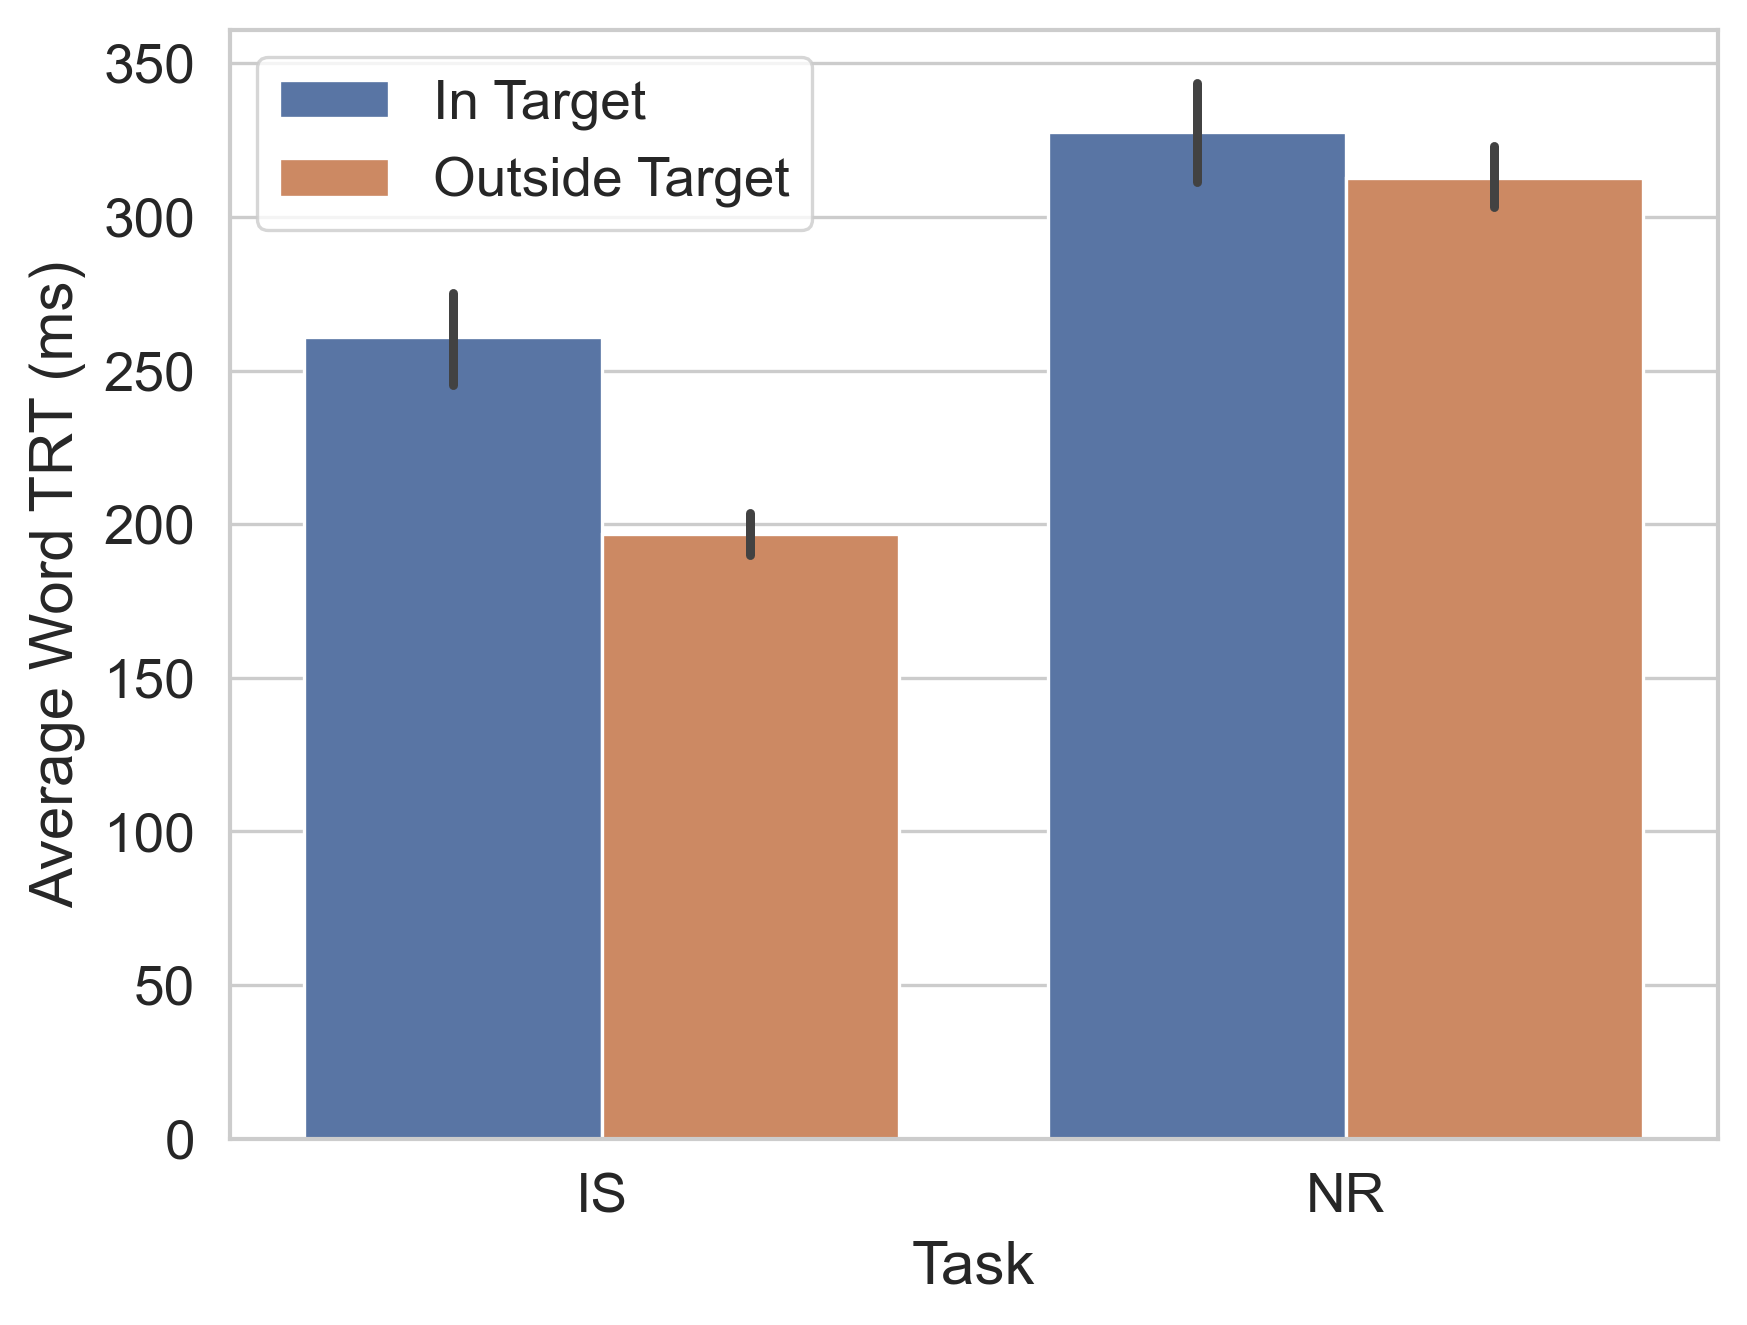

In [ ]:
g = sns.barplot(data=dataframe_to_plot, x="Task", y="Average Word TRT", hue="Span", order=["IS","NR"])
g.legend_.set_title(None)
plt.ylabel("Average Word TRT (ms)")